<center>
    <img src="https://scontent.fsgn5-11.fna.fbcdn.net/v/t39.30808-6/404266109_3572051169747503_1333821210652151216_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=3635dc&_nc_ohc=XrEzbtz2Eq0AX-QkxhY&_nc_ht=scontent.fsgn5-11.fna&oh=00_AfBRA1OYUy_KVuuawTXHEs8t3IBv95giNj7yujwN1PX1sg&oe=6578ADB2" alt="image.png">
</center>

## About the Dataset
   Đây là một tập dữ liệu mô phỏng các giao dịch thẻ tín dụng, bao gồm cả các giao dịch hợp lệ và gian lận trong khoảng thời gian từ ngày 1 tháng 1 năm 2019 đến ngày 31 tháng 6 năm 2020. Tập dữ liệu này bao gồm thông tin về giao dịch của 1000 khách hàng sử dụng thẻ tín dụng với một nhóm 800 nhà cung cấp dịch vụ.
## Data Description

* trans_date_trans_time: Ngày và giờ của giao dịch.
* cc_num: Số thẻ tín dụng của khách hàng.
* merchant: Nhà cung cấp dịch vụ mà khách hàng đang thanh toán (ví dụ: Amazon, Walmart).
* category: Danh mục của giao dịch.
* amt: Số tiền của giao dịch.
* first: Tên đầu tiên của khách hàng.
* last: Họ của khách hàng.
* gender: Giới tính của khách hàng.
* street, city, state: Địa chỉ của khách hàng.
* zip: Mã zip của giao dịch.
* lat: Vĩ độ của khách hàng.
* long: Kinh độ của khách hàng.
* city_pop: Dân số của thành phố mà khách hàng đang sống.
* job: Nghề nghiệp của khách hàng.
* dob: Ngày sinh của khách hàng.
* trans_num: Số giao dịch duy nhất cho mỗi giao dịch.
* unix_time: Thời gian của giao dịch theo định dạng Unix (thường không được sử dụng trong phân tích do tính duy nhất).
* merch_lat: Vĩ độ của người bán.
* merch_long: Kinh độ của người bán.
* is_fraud: Chỉ số nhị phân cho biết liệu giao dịch có gian lận hay không (1 nếu gian lận, 0 nếu không gian lận).

# Import Libraries

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
from IPython.display import Image

# Import các modules và classes từ scikit-learn
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings; warnings.filterwarnings("ignore")


## Import Data

In [2]:
# Đọc dữ liệu từ các file CSV
fraud_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
fraud_test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Gán fraud_train cho df, sau đó loại bỏ cột đầu tiên của fraud_test và df
df = fraud_train
fraud_test.drop(fraud_test.columns[:1], axis=1, inplace=True)
df.drop(df.columns[:1], axis=1, inplace=True)

# Hiển thị các hàng đầu tiên của DataFrame df
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [3]:
# In ra số lượng bản ghi trong tập dữ liệu kiểm tra và tập dữ liệu chính
print('Number of records in the test dataset: ', fraud_test.shape)
print('Number of records in the dataset: ', df.shape)

Number of records in the test dataset:  (555719, 22)
Number of records in the dataset:  (1296675, 22)


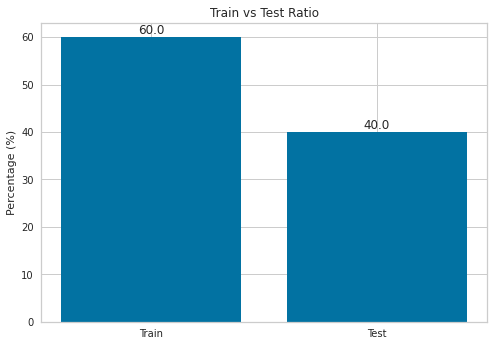

In [4]:
# Tính tỷ lệ phần trăm giữa tập huấn luyện và tập kiểm tra
train_percentage = 100 - 100 * round(len(fraud_test) / len(fraud_train), 1)
test_percentage = 100 * round(len(fraud_test) / len(fraud_train), 1)

# Vẽ biểu đồ cột hiển thị tỷ lệ tập huấn luyện và tập kiểm tra
plt.bar(['Train', 'Test'], [train_percentage, test_percentage])
plt.ylabel('Percentage (%)')
plt.title('Train vs Test Ratio')

# Hiển thị giá trị trên cột của biểu đồ
for i, v in enumerate([train_percentage, test_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
# Đếm giá trị duy nhất
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

Genuine: 1289169 and 99.42 % of the dataset
Frauds: 7506 and 0.58 % of the dataset


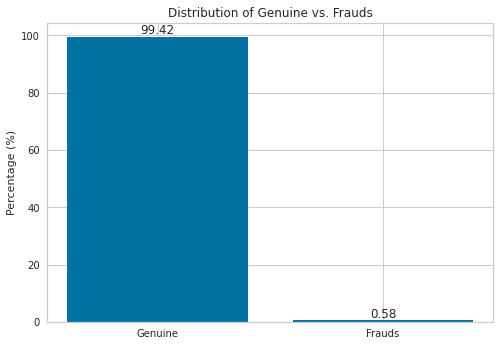

In [7]:
# Tính phần trăm số lượng giao dịch không gian lận và giao dịch gian lận trong tập dữ liệu
genuine_percentage = round((df['is_fraud'].value_counts()[0] / len(df)) * 100, 2)
fraud_percentage = round((df['is_fraud'].value_counts()[1] / len(df)) * 100, 2)

# In ra số lượng giao dịch không gian lận và giao dịch gian lận cùng với phần trăm tương ứng
print('Genuine:', df['is_fraud'].value_counts()[0], 'and', genuine_percentage, '% of the dataset')
print('Frauds:', df['is_fraud'].value_counts()[1], 'and', fraud_percentage, '% of the dataset')

# Vẽ biểu đồ cột để thể hiện phân phối giữa giao dịch không gian lận và giao dịch gian lận
plt.bar(['Genuine', 'Frauds'], [genuine_percentage, fraud_percentage])
plt.ylabel('Percentage (%)')
plt.title('Distribution of Genuine vs. Frauds')

# Hiển thị giá trị trên cột của biểu đồ
for i, v in enumerate([genuine_percentage, fraud_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Data pre-processing

In [8]:
# Tạo một bản sao của DataFrame để loại bỏ các dòng trùng lặp
df_dropdup = df.copy()

# Loại bỏ các dòng trùng lặp từ DataFrame
df_dropdup.drop_duplicates(inplace=True)

# In ra thông báo về việc loại bỏ các giá trị trùng lặp và số lượng giá trị bị loại bỏ
print("Number of duplicated values removed:", df.shape[0] - df_dropdup.shape[0])

# Gán DataFrame ban đầu bằng DataFrame không có dòng trùng lặp
df = df_dropdup


Number of duplicated values removed: 0


In [9]:
# Chuyển đổi cột 'trans_date_trans_time' thành định dạng datetime trong DataFrame 'df'
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [10]:
# Chuyển đổi cột 'dob' thành định dạng datetime trong DataFrame 'df'
df['dob'] = pd.to_datetime(df['dob'])


In [11]:
# Loại bỏ chuỗi 'fraud_' từ cột 'merchant' trong DataFrame 'df'
df['merchant'] = df['merchant'].str.strip('fraud_')


In [12]:
df.head(3)

trans_date_trans_time            cc_num                   merchant  \
0   2019-01-01 00:00:18  2703186189652095       Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322  Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661             Lind-Buckridge   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   

   city_pop                                job        dob  \
0      3495          Psychologist, counselling 1988-03-09   
1       149  Special educational needs teacher 1978-06-21   
2      4154        Nature conservation officer 1962-01-19   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   

   is_fraud  
0         0  
1         0  
2         0  

[3 rows x 22 columns]

# Feature Extraction

In [13]:
# Tạo cột 'year_month' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Hiển thị cột 'year_month' trong DataFrame 'df'
df['year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1296670    2020-06
1296671    2020-06
1296672    2020-06
1296673    2020-06
1296674    2020-06
Name: year_month, Length: 1296675, dtype: period[M]

In [14]:
# Tạo cột 'day_of_week' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# Hiển thị cột 'day_of_week' trong DataFrame 'df'
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_of_week, Length: 1296675, dtype: object

In [15]:
df_mapping = df.copy()

In [16]:
# Tạo cột 'trans_hour' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Hiển thị cột 'trans_hour' trong DataFrame 'df'
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64

In [17]:
# Chuyển cột 'dob' sang định dạng datetime và tính tuổi trong DataFrame 'df'
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = ((df['trans_date_trans_time'] - df['dob'])/ pd.Timedelta(days=365)).astype(int)


In [18]:
df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                              merchant       category     amt        first  \
0                 Rippin, Kub and Mann       misc_net    4.97     Jennifer   
1            Heller, Gutmann and Zieme    grocery_pos  107.23    Stephanie   
2                       Lind-Buckridge  entertainment  220.11       Edward   
3         Kutch, Hermiston and Farrell  gas_transport   45.00       Jeremy   
4                        Keeling-Crist       misc_pos   41.96        Tyler   
...                                ...            ...     ...          ...   
1296670                    Reichel Inc  entertainment   15.56         Erik   
1296671             Abernathy and Sons    food_dining   51.70      Jeffrey   
1296672                  Stiedemann Lt    food_dining  105.93  Christopher   
1296673  Reinger, Weissnat and Strosin    food_dining   74.90       Joseph   
1296674  Langosh, Wintheiser and Hyatt    food_dining    4.30      Jeffrey   

              last gender                         street  \
0            Banks      F                 561 Perry Cove   
1             Gill      F   43039 Riley Greens Suite 393   
2          Sanchez      M       594 White Dale Suite 530   
3            White      M    9443 Cynthia Court Apt. 038   
4           Garcia      M               408 Bradley Rest   
...            ...    ...                            ...   
1296670  Patterson      M       162 Jessica Row Apt. 072   
1296671      White      M  8617 Holmes Terrace Suite 651   
1296672  Castaneda      M     1632 Cohen Drive Suite 639   
1296673     Murray      M           42933 Ryan Underpass   
1296674      Smith      M           135 Joseph Mountains   

                             city  ...        dob  \
0                  Moravian Falls  ... 1988-03-09   
1                          Orient  ... 1978-06-21   
2                      Malad City  ... 1962-01-19   
3                         Boulder  ... 1967-01-12   
4                        Doe Hill  ... 1986-03-28   
...                           ...  ...        ...   
1296670                     Hatch  ... 1961-11-24   
1296671                 Tuscarora  ... 1979-12-11   
1296672  High Rolls Mountain Park  ... 1967-08-30   
1296673                 Manderson  ... 1980-08-18   
1296674                      Sula  ... 1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266 -111.690765   
1296671  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881  -78.246528   
1296672  483f52fe67fabef353d552c1e662974c  1371816752  33.619513 -105.130529   
1296673  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940 -103.241160   
1296674  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983 -114.186110   

        is_fraud year_month day_of_week  trans_hour  age  
0              0    2019-01     Tuesday     

In [19]:
from geopy.distance import geodesic
# Tính toán khoảng cách và lưu vào cột 'distance'
df['distance'] = df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)

In [20]:
#  Danh sách các cột sẽ được loại bỏ khỏi DataFrame

drop_cols = ['trans_date_trans_time','cc_num','unix_time','lat',
              'long','merch_lat','merch_long','dob','city','street','merchant',
             'zip','first','last','trans_num','job']

In [21]:
# Loại bỏ các cột trong danh sách 'drop_cols' từ DataFrame 'df'
df.drop(drop_cols, axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)  # Reset chỉ số của DataFrame


In [22]:
df.head(3)

category     amt gender state  city_pop  is_fraud year_month  \
0       misc_net    4.97      F    NC      3495         0    2019-01   
1    grocery_pos  107.23      F    WA       149         0    2019-01   
2  entertainment  220.11      M    ID      4154         0    2019-01   

  day_of_week  trans_hour  age    distance  
0     Tuesday           0   30   78.773821  
1     Tuesday           0   40   30.216618  
2     Tuesday           0   56  108.102912

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype    
---  ------       --------------    -----    
 0   category     1296675 non-null  object   
 1   amt          1296675 non-null  float64  
 2   gender       1296675 non-null  object   
 3   state        1296675 non-null  object   
 4   city_pop     1296675 non-null  int64    
 5   is_fraud     1296675 non-null  int64    
 6   year_month   1296675 non-null  period[M]
 7   day_of_week  1296675 non-null  object   
 8   trans_hour   1296675 non-null  int64    
 9   age          1296675 non-null  int64    
 10  distance     1296675 non-null  float64  
dtypes: float64(2), int64(4), object(4), period[M](1)
memory usage: 108.8+ MB


# Exploratory Data Analysis

In [24]:
# Thiết lập định dạng hiển thị của số thập phân trong DataFrame
pd.options.display.float_format = '{:.3f}'.format

# Tạo bảng thống kê tóm tắt cho DataFrame 'df'
df.describe()

amt    city_pop    is_fraud  trans_hour         age    distance
count 1296675.000 1296675.000 1296675.000 1296675.000 1296675.000 1296675.000
mean       70.351   88824.441       0.006      12.805      45.528      76.112
std       160.316  301956.361       0.076       6.818      17.409      29.093
min         1.000      23.000       0.000       0.000      13.000       0.022
25%         9.650     743.000       0.000       7.000      32.000      55.358
50%        47.520    2456.000       0.000      14.000      44.000      78.263
75%        83.140   20328.000       0.000      19.000      57.000      98.468
max     28948.900 2906700.000       1.000      23.000      95.000     151.868

In [25]:
pd.reset_option('display.float_format')

In [26]:
def plot_numerical_features(df, features):
    fig, axes = plt.subplots(1,len(features), figsize=(30,4))
    for i, ax in enumerate(axes.flat):
        sns.histplot(x=features[i], data=df, ax=ax, kde=True)
        axes[i].set_ylabel("")  # Loại bỏ nhãn trục y để giảm độ dày của biểu đồ

    plt.tight_layout()
    plt.show()

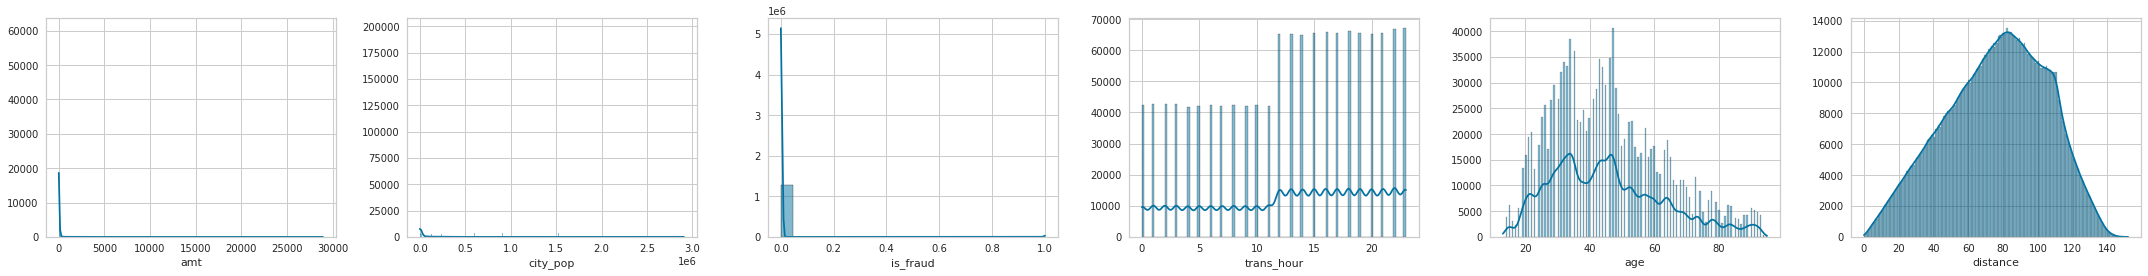

In [27]:
# Tạo danh sách 'numerical_columns' chứa tất cả các cột dạng số trong DataFrame 'df'
numerical_columns = [col for col in df.select_dtypes(include='number').columns]

# Sử dụng hàm 'plot_numerical_features' để vẽ histogram cho từng cột số trong danh sách 'numerical_columns'
plot_numerical_features(df, numerical_columns)

In [28]:
def plot_categorical_features(df, features):
    fig, axes = plt.subplots(len(features),1, figsize=(7,33))
    for i, ax in enumerate(axes.flat):
        sns.countplot(y=features[i],data=df, ax=ax, palette='Set2')
    plt.tight_layout()
    plt.show()

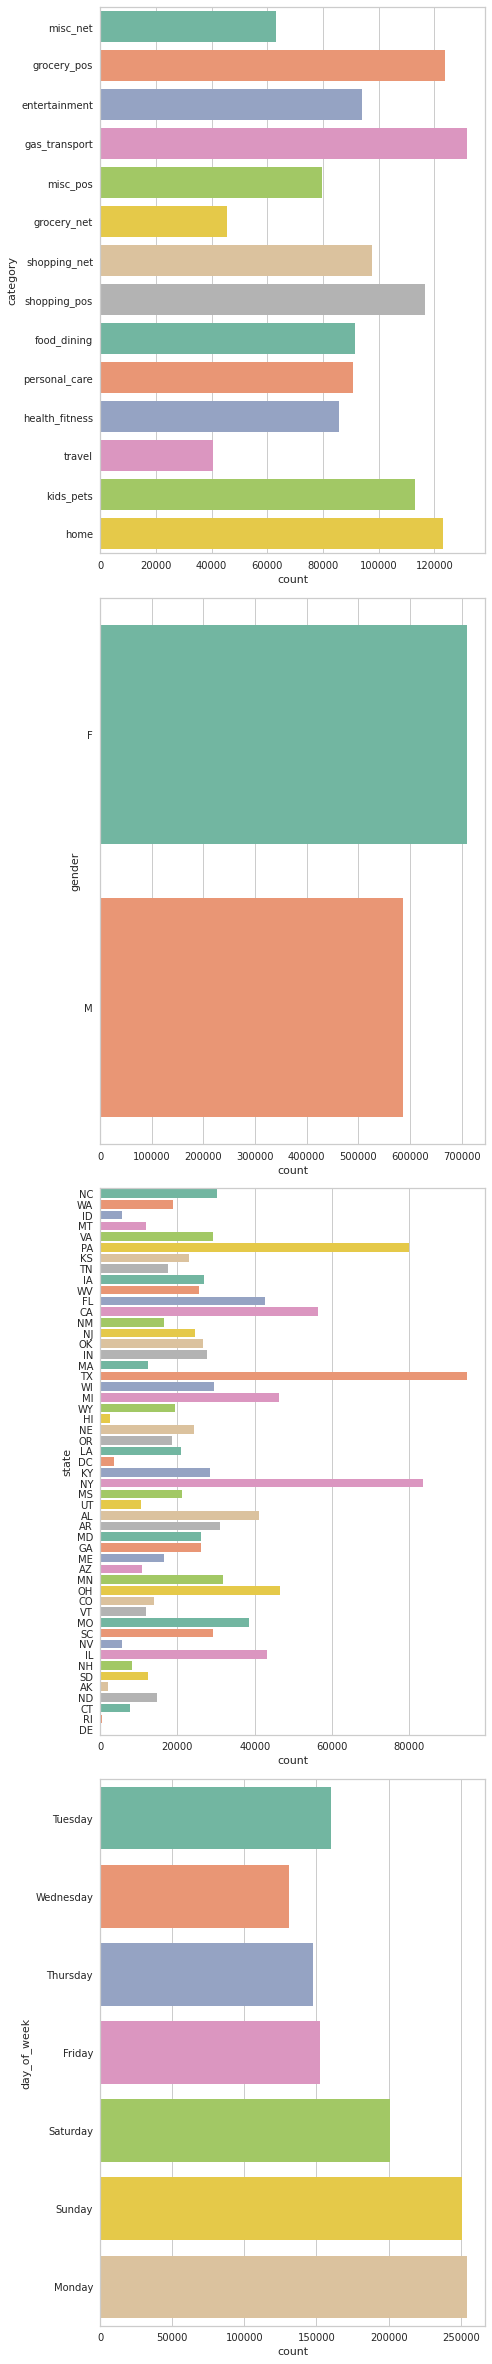

In [29]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in df.select_dtypes(include='object').columns]

# Sử dụng hàm 'plot_categorical_features' để vẽ biểu đồ đếm cho các cột phân loại trong danh sách 'categorical_features'
plot_categorical_features(df, categorical_features)

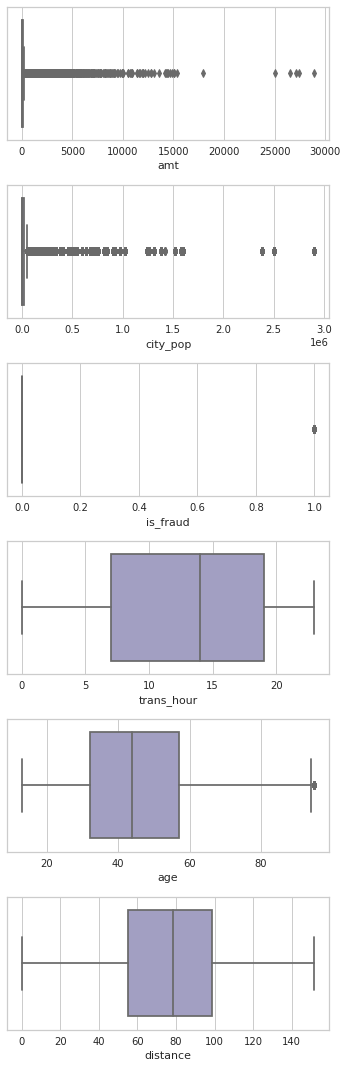

In [30]:
def plot_boxplot(df, features):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(len(features), 1, figsize=(5, 15), sharey=True)
    for i, ax in enumerate(axs.flat):
        sns.boxplot(x=features[i], data=df, palette='Purples', ax=ax)
        ax.set_xlabel(features[i])

    plt.tight_layout()
    plt.show()

plot_boxplot(df, numerical_columns)

Text(0.5, 1.0, 'Difference: Fraudulent vs Non-Fraudulent Transactions in Each Spending Category')

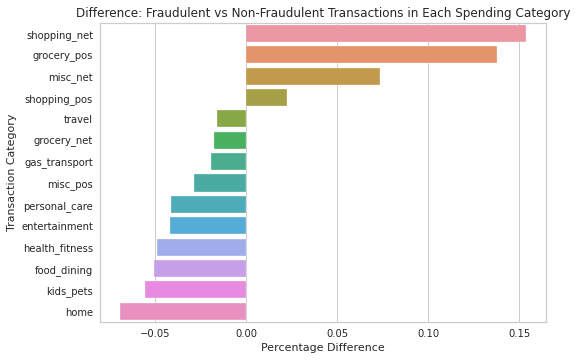

In [31]:
# Tính phần trăm khác biệt
not_fraud_percent = df[df['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
not_fraud_percent.columns = ['category', 'not fraud percentage']

fraud_percent = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud_percent.columns = ['category', 'fraud percentage']

diff_percent = not_fraud_percent.merge(fraud_percent, on='category')
diff_percent['diff'] = diff_percent['fraud percentage'] - diff_percent['not fraud percentage']

# Vẽ biểu đồ barplot cho phần trăm khác biệt
ax = sns.barplot(y='category', x='diff', data=diff_percent.sort_values('diff', ascending=False))

# Đặt nhãn trục x và trục y, tiêu đề
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Difference: Fraudulent vs Non-Fraudulent Transactions in Each Spending Category')

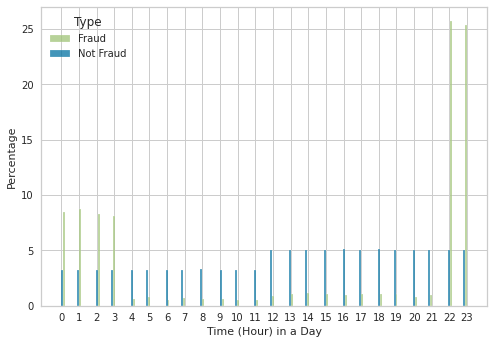

In [32]:
# Vẽ histogram với phần trăm giao dịch gian lận và không gian lận theo giờ trong ngày
ax = sns.histplot(data=df, x="trans_hour", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')

# Đặt nhãn trục x và trục y
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')

# Đặt tick cho trục x (từ 0 đến 23 giờ)
plt.xticks(np.arange(0, 24, 1))

# Tạo chú thích cho biểu đồ
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

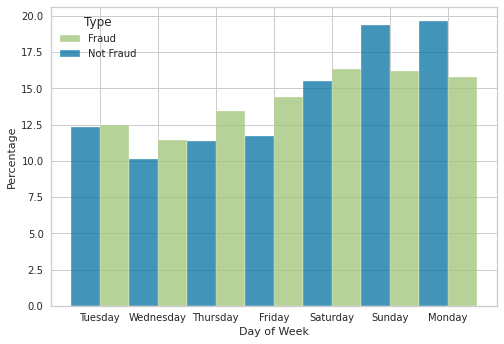

In [33]:
# Vẽ histogram với phần trăm giao dịch gian lận và không gian lận theo ngày trong tuần
ax = sns.histplot(data=df, x="day_of_week", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')

# Đặt nhãn trục x và trục y
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')

# Tạo chú thích cho biểu đồ
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

<AxesSubplot:>

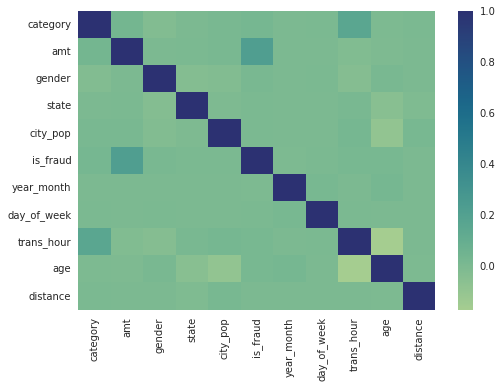

In [34]:
def apply_feature_engineering(df):
    """
    Áp dụng kỹ thuật feature engineering để chuyển đổi dữ liệu phân loại thành dạng số.

    Tham số:
    df (pandas DataFrame): DataFrame đầu vào chứa các cột phân loại

    Trả về:
    pandas DataFrame: DataFrame với các cột phân loại được chuyển đổi thành mã số
    """
    df["category"] = df["category"].astype("category").cat.codes
    df["gender"] = df["gender"].astype("category").cat.codes
    df["state"] = df["state"].astype("category").cat.codes
    df["year_month"] = df["year_month"].astype("category").cat.codes
    df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
    
    return df

# Áp dụng kỹ thuật feature engineering vào DataFrame gốc và DataFrame kiểm tra
df2 = apply_feature_engineering(df.copy())

# Hiển thị độ tương quan sau khi chuẩn hóa dữ liệu bằng biểu đồ heatmap
sns.heatmap(df2.corr(), cmap='crest') # Hiển thị heatmap sau khi chuẩn hóa dữ liệu

In [35]:
df2.head()

category     amt  gender  state  city_pop  is_fraud  year_month  \
0         8    4.97       0     27      3495         0           0   
1         4  107.23       0     47       149         0           0   
2         0  220.11       1     13      4154         0           0   
3         2   45.00       1     26      1939         0           0   
4         9   41.96       1     45        99         0           0   

   day_of_week  trans_hour  age    distance  
0            5           0   30   78.773821  
1            5           0   40   30.216618  
2            5           0   56  108.102912  
3            5           0   52   95.685115  
4            5           0   32   77.702395

## KMeans

In [36]:
# Chuẩn hóa
scaler = StandardScaler()

# Tạo bản sao của DataFrame chứa giao dịch gian lận và loại bỏ cột 'is_fraud' để chuẩn hóa
fraud_df = df2[df2['is_fraud'] == 1].copy()
fraud_df.drop('is_fraud', axis=1, inplace=True)
fraud_df.reset_index(drop=True, inplace=True)

# Thực hiện chuẩn hóa dữ liệu cho các cột số
numerical_cols = ['amt', 'city_pop', 'age', 'distance']
scaled_features = scaler.fit_transform(fraud_df[numerical_cols])

# Tạo DataFrame từ dữ liệu đã chuẩn hóa
fraud_scaled_features = pd.DataFrame(scaled_features, columns=numerical_cols)

# Nối DataFrame đã scale và DataFrame không được scale
fraud_scaled = pd.concat([fraud_df.drop(columns=numerical_cols), fraud_scaled_features], axis=1)


In [37]:
fraud_scaled

category  gender  state  year_month  day_of_week  trans_hour       amt  \
0            4       1     27           0            6           1 -0.640815   
1            2       0     43           0            6           1 -1.330998   
2            4       0     43           0            6           3 -0.652978   
3            2       1     27           0            6           3 -1.342495   
4            4       0     43           0            6           3 -0.654463   
...        ...     ...    ...         ...          ...         ...       ...   
7501        11       0      9          17            3           1  1.141232   
7502        11       0      9          17            3           1  1.740155   
7503         2       1     18          17            3           2 -1.334276   
7504         2       0     43          17            3           3 -1.304957   
7505         2       1     18          17            3           3 -1.334378   

      city_pop       age  distance  
0    -0.295173 -0.971284 -0.254250  
1     4.588809  0.513081  0.075772  
2     4.588809  0.513081 -1.225962  
3    -0.295173 -0.971284 -1.463943  
4     4.588809  0.513081 -1.118870  
...        ...       ...       ...  
7501  0.025604 -0.759232  0.578230  
7502  0.025604 -0.759232  0.275792  
7503 -0.079440 -1.183336  0.652724  
7504 -0.297813  0.088977  1.326978  
7505 -0.079440 -1.183336  2.099661  

[7506 rows x 10 columns]

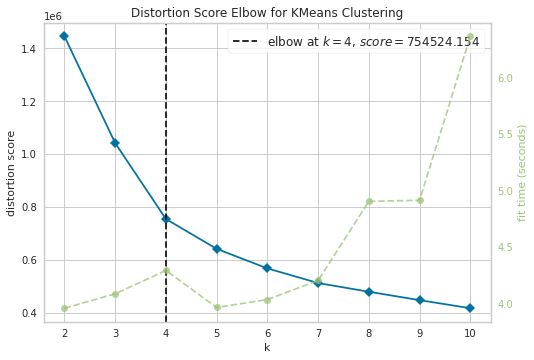

Elbow Method - Optimal number of clusters: 4


In [38]:
# Sử dụng random_seed khi khởi tạo KMeans
elbow_method = KElbowVisualizer(KMeans(n_init = 30), k=(2, 11))
elbow_method.fit(fraud_scaled)
elbow_method.show()

optimal_clusters_elbow = elbow_method.elbow_value_
print("Elbow Method - Optimal number of clusters:", optimal_clusters_elbow)

Ngoài phương pháp Elbow, có thể sử dụng các phương pháp khác để xác định số phân cụm tối ưu trong bài toán phân cụm. Dưới đây là mô tả ngắn về các phương pháp đó:

Calinski-Harabasz Score: Đây là một chỉ số được sử dụng để đo độ tách biệt giữa các cụm. Chỉ số này được tính toán dựa trên tỷ lệ giữa phương sai giữa các cụm và phương sai trong cụm. Số lượng cụm tối ưu tương ứng với giá trị Calinski-Harabasz Score cao nhất.

Silhouette Score: Đây là một chỉ số đo độ tách biệt và độ tương đồng của các điểm dữ liệu trong cụm. Giá trị Silhouette Score cao đồng nghĩa với sự tách biệt tốt giữa các cụm và sự tương đồng tốt trong từng cụm. Số lượng cụm tối ưu là số lượng cụm tương ứng với giá trị Silhouette Score cao nhất.

Davies-Bouldin Index: Chỉ số này đo độ tốt của phân cụm bằng cách tính toán trung bình của độ tương tự giữa mỗi cụm và các cụm khác. Số lượng cụm tối ưu tương ứng với giá trị Davies-Bouldin Index thấp nhất.

In [39]:
optimal_clusters_ch = None
optimal_clusters_silhouette = None
optimal_clusters_db = None
max_score_ch = float('-inf')
max_score_silhouette = float('-inf')
min_score_db = float('inf')

for k in range(2, 11):
    kmeans = KMeans(n_init=30,n_clusters=k)
    kmeans.fit(fraud_scaled)
    labels = kmeans.labels_

    # Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(fraud_scaled, labels)
    if ch_score > max_score_ch:
        max_score_ch = ch_score
        optimal_clusters_ch = k

    # Silhouette Score
    silhouette = silhouette_score(fraud_scaled, labels)
    if silhouette > max_score_silhouette:
        max_score_silhouette = silhouette
        optimal_clusters_silhouette = k

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(fraud_scaled, labels)
    if db_score < min_score_db:
        min_score_db = db_score
        optimal_clusters_db = k

# Print the results
print("Optimal number of clusters (Calinski-Harabasz Score):", optimal_clusters_ch)
print("Optimal number of clusters (Silhouette Score):", optimal_clusters_silhouette)
print("Optimal number of clusters (Davies-Bouldin Index):", optimal_clusters_db)

Optimal number of clusters (Calinski-Harabasz Score): 4
Optimal number of clusters (Silhouette Score): 4
Optimal number of clusters (Davies-Bouldin Index): 3


In [40]:
# Khởi tạo và fit mô hình KMeans với số cụm tối ưu đã chọn
kmeans_model = KMeans(n_clusters=optimal_clusters_elbow,n_init=30, random_state=42)
kmeans_model.fit(fraud_scaled)

KMeans(n_clusters=4, n_init=30, random_state=42)

## Hierarchy

In [41]:
from sklearn.cluster import AgglomerativeClustering

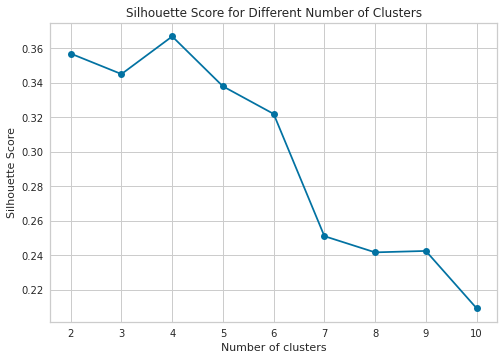

In [42]:
silhouette_scores = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agg_labels = model.fit_predict(fraud_scaled)
    silhouette_avg = silhouette_score(fraud_scaled, agg_labels)
    silhouette_scores.append(silhouette_avg)

# Vẽ biểu đồ silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()

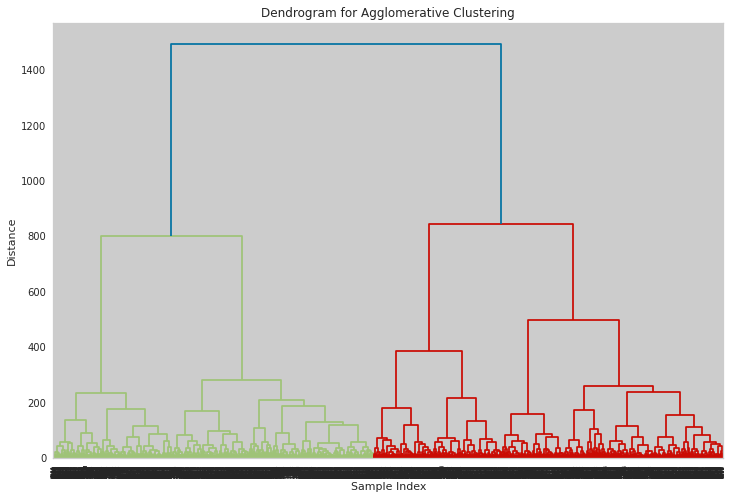

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sử dụng Agglomerative Clustering để phân cụm dữ liệu
agg_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_model.fit_predict(fraud_scaled)

# Tạo ma trận linkage
Z = linkage(fraud_scaled, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [44]:
# Sử dụng Counter để đếm số lượng từng nhóm cụm trong mỗi thuật toán
kmeans_counter = Counter(kmeans_model.labels_)
agg_counter = Counter(agg_labels)

# Xác định số lượng các nhóm cụm duy nhất từ mỗi thuật toán
unique_kmeans = set(kmeans_model.labels_)
unique_agg = set(agg_labels)

# Tìm các nhãn cụm chung và sai khác giữa hai thuật toán
common_clusters = unique_kmeans.intersection(unique_agg)
num_correct = sum(min(kmeans_counter[label], agg_counter[label]) for label in common_clusters)
num_different = len(kmeans_model.labels_) + len(agg_labels) - 2 * num_correct

# Tính tỉ lệ sai khác
error_rate = num_different / (len(kmeans_model.labels_) + len(agg_labels))
print("Error rate:", error_rate)

Error rate: 0.15987210231814547


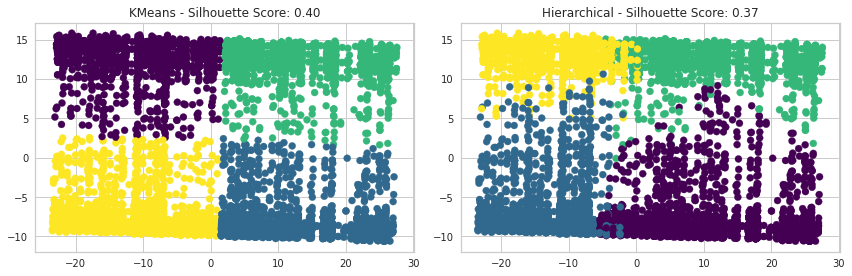

In [45]:
# KMeans
kmeans_silhouette = silhouette_score(fraud_scaled, kmeans_model.labels_)

# Hierarchical Clustering
hierarchical_silhouette = silhouette_score(fraud_scaled, agg_labels)

# Vẽ biểu đồ scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.title(f"KMeans - Silhouette Score: {kmeans_silhouette:.2f}")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title(f"Hierarchical - Silhouette Score: {hierarchical_silhouette:.2f}")

plt.tight_layout()
plt.show()


Dùng thuật toán Kmeans tốt hơn

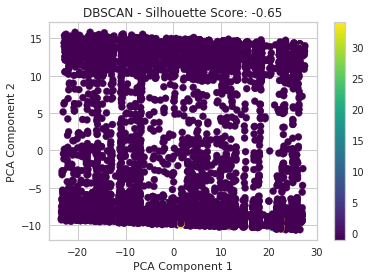

In [46]:
from sklearn.cluster import DBSCAN

# Tìm số cụm tối ưu với DBSCAN
best_silhouette_score = -1
best_dbscan_model = None
best_dbscan_labels = None

for eps in [0.1, 0.5, 1.0, 1.5]:
    for min_samples in [5, 10, 15]:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(fraud_scaled)
        
        n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        if n_clusters_dbscan > 1:  # Chỉ tính Silhouette nếu có ít nhất 2 cụm
            silhouette_avg_dbscan = silhouette_score(fraud_scaled, dbscan_labels)
            if silhouette_avg_dbscan > best_silhouette_score:
                best_silhouette_score = silhouette_avg_dbscan
                best_dbscan_model = dbscan_model
                best_dbscan_labels = dbscan_labels

# Tính toán PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

# Vẽ biểu đồ scatter plot cho DBSCAN
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_dbscan_labels, cmap='viridis')
plt.title(f"DBSCAN - Silhouette Score: {best_silhouette_score:.2f}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


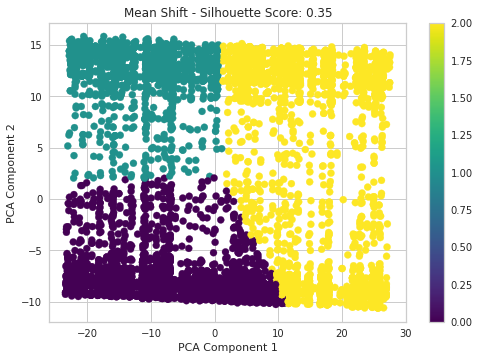

In [47]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Ước lượng bandwidth (băng thông) tối ưu
bandwidth = estimate_bandwidth(fraud_scaled, quantile=0.2, n_samples=500)

# Phân cụm dữ liệu với Mean Shift
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_labels = meanshift.fit_predict(fraud_scaled)

# Tính toán điểm Silhouette cho Mean Shift
meanshift_silhouette = silhouette_score(fraud_scaled, meanshift_labels)

# Vẽ biểu đồ scatter plot cho Mean Shift
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=meanshift_labels, cmap='viridis')
plt.title(f"Mean Shift - Silhouette Score: {meanshift_silhouette:.2f}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


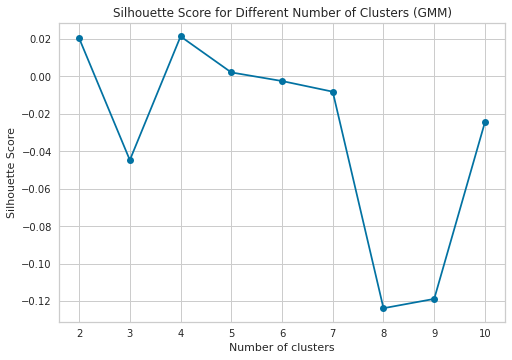

Best GMM cluster: 4


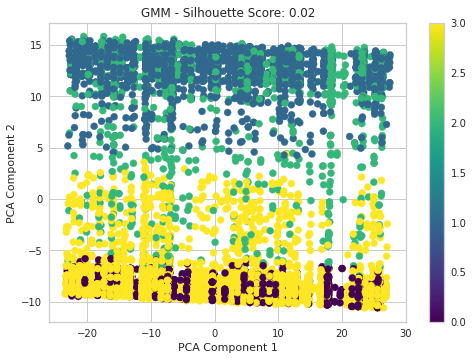

In [48]:
from sklearn.mixture import GaussianMixture

# Tìm số cụm tối ưu với GMM
silhouette_scores_gmm = []
for n_clusters in range(2, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(fraud_scaled)
    
    silhouette_avg_gmm = silhouette_score(fraud_scaled, gmm_labels)
    silhouette_scores_gmm.append(silhouette_avg_gmm)

# Vẽ biểu đồ silhouette scores
plt.plot(range(2, 11), silhouette_scores_gmm, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters (GMM)')
plt.show()

# Chọn số cụm tốt nhất từ biểu đồ
best_n_clusters_gmm = silhouette_scores_gmm.index(max(silhouette_scores_gmm)) + 2  # +2 vì range từ 2 đến 10

print(f"Best GMM cluster: { best_n_clusters_gmm}")
# Phân cụm dữ liệu với GMM sử dụng số cụm tốt nhất
best_gmm = GaussianMixture(n_components=best_n_clusters_gmm, random_state=42)
best_gmm_labels = best_gmm.fit_predict(fraud_scaled)

# Tính toán điểm Silhouette cho GMM
gmm_silhouette = silhouette_score(fraud_scaled, best_gmm_labels)

# Vẽ biểu đồ scatter plot cho GMM
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_gmm_labels, cmap='viridis')
plt.title(f"GMM - Silhouette Score: {gmm_silhouette:.2f}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [49]:
# Sử dụng PCA để giảm chiều dữ liệu và tính toán phương sai được giải thích bởi các thành phần
from sklearn.decomposition import PCA 
pca = PCA(n_components=len(fraud_df.columns)) 
pca.fit(fraud_scaled)
pca.explained_variance_ratio_ * 100

array([58.58790504, 28.28732077,  7.96627933,  3.02018045,  1.07053564,
        0.29233782,  0.28753802,  0.27459383,  0.14409981,  0.06920929])

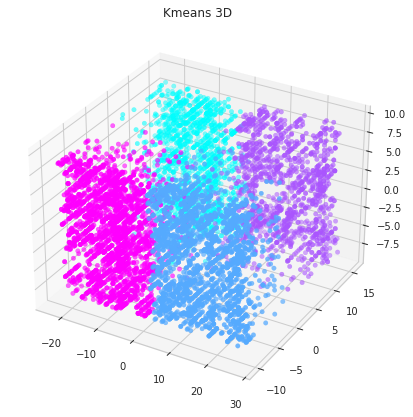

In [50]:
# Sử dụng PCA với 3 thành phần để trực quan hóa dữ liệu
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(fraud_scaled), columns=["pca1", "pca2", "pca3"])
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
scatter = ax.scatter(pca_df.pca1, pca_df.pca2, pca_df.pca3, c=kmeans_model.labels_, cmap="cool")
plt.title("Kmeans 3D")
plt.show()

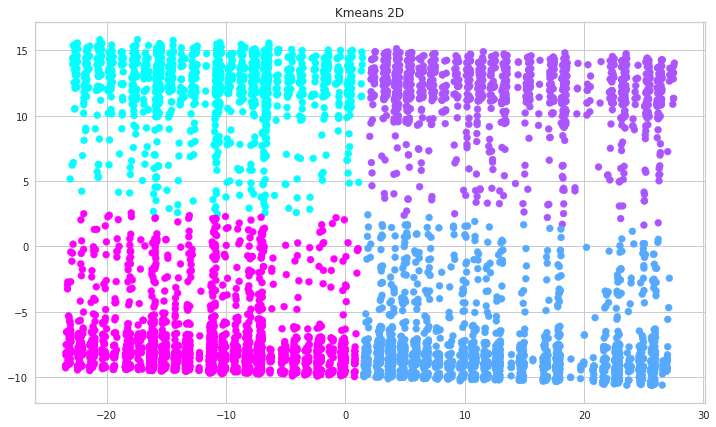

In [51]:
# Sử dụng PCA với 2 thành phần để trực quan hóa dữ liệu
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(fraud_scaled), columns=["pca1", "pca2"])
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter = ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans_model.labels_, cmap="cool")
plt.title("Kmeans 2D")
plt.show()

In [52]:
# Tạo DataFrame mới chứa thông tin cụm
clusters = pd.concat([fraud_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

In [53]:
cluster = kmeans_model.labels_
cluster_0 = np.where(cluster==0) #index các data samples thuộc cluster 1
cluster_1 = np.where(cluster==1) #index các data samples thuộc cluster 2
cluster_2 = np.where(cluster==2) #index các data samples thuộc cluster 3
cluster_3 = np.where(cluster==3) #index các data samples thuộc cluster 4

In [54]:
## Giả sử 'labels' là nhãn cụm được gán bởi thuật toán phân cụm
labels = kmeans_model.labels_

# Tạo một DataFrame trống để lưu trữ các mẫu ngẫu nhiên từ mỗi cụm
random_samples = pd.DataFrame()

# Lặp qua từng cụm và chọn một số data samples từ mỗi cụm
num_samples_per_cluster = 5  # Số lượng mẫu trong mỗi cụm muốn chọn
num_clusters = len(np.unique(labels))  # Số lượng cụm

for cluster in range(num_clusters):
    cluster_samples = clusters[labels == cluster].sample(n=num_samples_per_cluster, random_state=2024)  # Lấy ngẫu nhiên các mẫu thuộc cụm hiện tại
    random_samples = pd.concat([random_samples, cluster_samples])

# Hiển thị DataFrame chứa các mẫu ngẫu nhiên từ mỗi cụm
random_samples

category      amt  gender  state  city_pop  year_month  day_of_week  \
3070         8   825.45       1     47       895           7            2   
3544         4   309.49       0     45    242803           8            0   
2489         8   773.63       0     43    144160           5            6   
307          2    15.27       0     45    136895           0            2   
2915         2    10.06       1     34   1382480           6            2   
2704         0   374.08       0      9    717255           6            2   
6199        11  1013.74       0     16    163415          14            4   
6749        11   960.87       1     22      7339          16            5   
6463        11   952.38       1      4    105549          15            5   
6327        11  1025.97       1      2      1383          14            5   
5686        11   942.21       0     23    753116          13            6   
115          9   830.58       0     21      1643           0            0   
4977         3     6.42       0     11      1490          11            3   
3368         2    11.44       1      4    757530           8            3   
4432         4   298.61       1     23      1680          10            5   
4118        11   958.76       1     43   2906700           9            3   
3249         4   307.29       1     41      1126           7            3   
3355         8   854.92       0     47       584           7            2   
1261         4   311.53       1     50        49           2            0   
3958         9     9.14       1     35      2644           9            2   

      trans_hour  age    distance  cluster  
3070           8   20   85.086163        0  
3544           2   56   57.376095        0  
2489           1   35  126.921437        0  
307            7   79   73.123549        0  
2915           2   28  125.544371        0  
2704          22   52   59.384137        1  
6199          22   15   81.462395        1  
6749          20   58   73.744381        1  
6463          23   46   88.443259        1  
6327          22   53  112.316945        1  
5686           1   48   51.574913        2  
115            7   42   75.085693        2  
4977           0   28   59.947769        2  
3368           0   40   81.992720        2  
4432           0   42   63.007234        2  
4118          22   23   87.573550        3  
3249          22   39   40.741307        3  
3355          20   50   45.431828        3  
1261          16   37   24.386973        3  
3958          23   38   82.606651        3

In [55]:
pd.options.display.float_format = '{:.3f}'.format
df_cluster_summary = clusters.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')
df_cluster_summary

cluster     Metrics          0         1          2         3
Column Name                                                  
category       mean      4.720     8.846      4.783     8.880
amt            mean    347.888   651.490    343.513   647.607
gender         mean      0.440     0.554      0.475     0.514
state          mean     38.430    13.524     13.096    38.315
city_pop       mean 122236.682 82644.093 104552.974 89846.794
year_month     mean      8.282     8.168      7.940     8.436
day_of_week    mean      2.858     2.856      2.827     2.755
trans_hour     mean      2.353    21.485      2.214    21.538
age            mean     45.303    50.401     45.113    50.216
distance       mean     75.121    75.943     76.010    77.372

In [56]:
pd.options.display.float_format = '{:.3f}'.format
df_cluster_summary = clusters.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == '50%'].set_index('Column Name')
df_cluster_summary

cluster     Metrics        0        1        2        3
Column Name                                            
category        50%    4.000   11.000    4.000   11.000
amt             50%  305.800  807.530  303.920  809.640
gender          50%    0.000    1.000    0.000    1.000
state           50%   38.000   14.000   14.000   38.000
city_pop        50% 3212.500 2566.000 4198.000 2208.000
year_month      50%    8.000    8.000    8.000    9.000
day_of_week     50%    3.000    3.000    3.000    3.000
trans_hour      50%    2.000   22.000    2.000   22.000
age             50%   44.000   51.000   43.000   49.000
distance        50%   77.383   76.697   77.549   79.860

In [57]:
print(df_mapping.columns)
print(clusters.columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week'],
      dtype='object')
Index(['category', 'amt', 'gender', 'state', 'city_pop', 'year_month',
       'day_of_week', 'trans_hour', 'age', 'distance', 'cluster'],
      dtype='object')


In [58]:
data1 = df_mapping[df_mapping['is_fraud'] == 1]  
data1.reset_index(drop=True, inplace=True)
drop_cols = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'zip','lat',
       'long', 'dob', 'trans_num', 'unix_time', 'merch_lat','merch_long', 'is_fraud']
data1.drop(drop_cols, axis=1, inplace=True)
data1.reset_index(drop=True, inplace=True)  

# Tạo một list chứa các cột bạn muốn thêm từ clusters vào data1
columns_to_add = [ 'trans_hour', 'age', 'distance', 'cluster']

# Thêm các cột từ clusters vào data1
merged_data = pd.concat([data1, clusters[columns_to_add]], axis=1)
merged_data['year_month'] = merged_data['year_month'].astype(str)

In [59]:
merged_data

merchant       category      amt gender  \
0                   Rutherford-Mertz    grocery_pos  281.060      M   
1         Jenkins, Hauck and Friesen  gas_transport   11.520      F   
2                   Goodwin-Nitzsche    grocery_pos  276.310      F   
3                   Erdman-Kertzmann  gas_transport    7.030      M   
4                        Koepp-Parke    grocery_pos  275.730      F   
...                              ...            ...      ...    ...   
7501                    Kassulke PLC   shopping_net  977.010      F   
7502                      Schumm PLC   shopping_net 1210.910      F   
7503  Tillman, Dickinson and Labadie  gas_transport   10.240      M   
7504                  Corwin-Collins  gas_transport   21.690      F   
7505                   Koss and Sons  gas_transport   10.200      M   

                city state  city_pop                       job year_month  \
0      Collettsville    NC       885            Soil scientist    2019-01   
1        San Antonio    TX   1595797  Horticultural consultant    2019-01   
2        San Antonio    TX   1595797  Horticultural consultant    2019-01   
3      Collettsville    NC       885            Soil scientist    2019-01   
4        San Antonio    TX   1595797  Horticultural consultant    2019-01   
...              ...   ...       ...                       ...        ...   
7501      Vero Beach    FL    105638         Librarian, public    2020-06   
7502      Vero Beach    FL    105638         Librarian, public    2020-06   
7503  Denham Springs    LA     71335                 Herbalist    2020-06   
7504         Notrees    TX        23            Cytogeneticist    2020-06   
7505  Denham Springs    LA     71335                 Herbalist    2020-06   

     day_of_week  trans_hour  age  distance  cluster  
0      Wednesday           1   30    68.963        0  
1      Wednesday           1   58    78.443        0  
2      Wednesday           3   58    41.048        0  
3      Wednesday           3   30    34.212        0  
4      Wednesday           3   58    44.125        0  
...          ...         ...  ...       ...      ...  
7501      Sunday           1   34    92.877        2  
7502      Sunday           1   34    84.189        2  
7503      Sunday           2   26    95.017        2  
7504      Sunday           3   50   114.386        0  
7505      Sunday           3   26   136.583        2  

[7506 rows x 14 columns]

Cluster 1


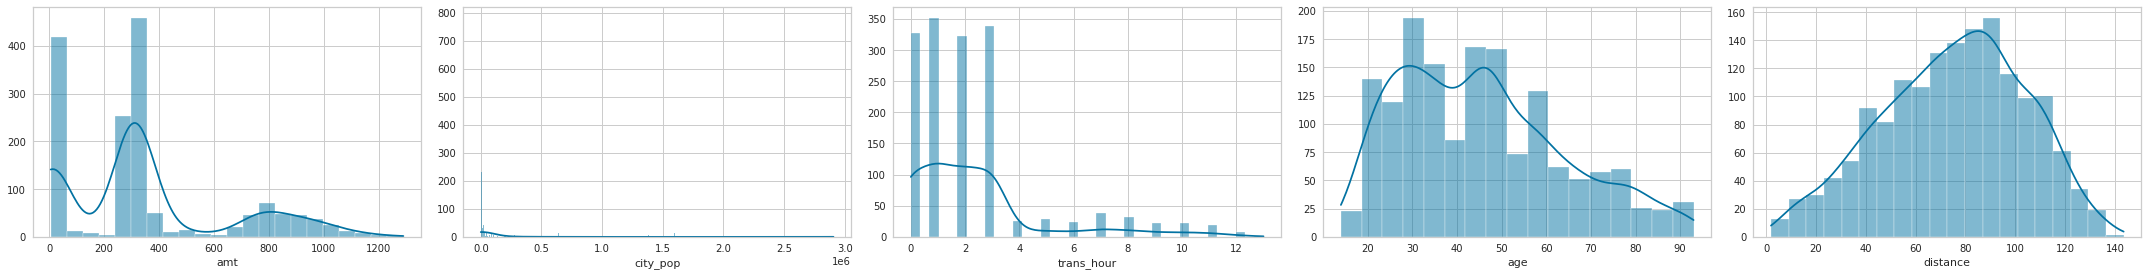

Cluster 2


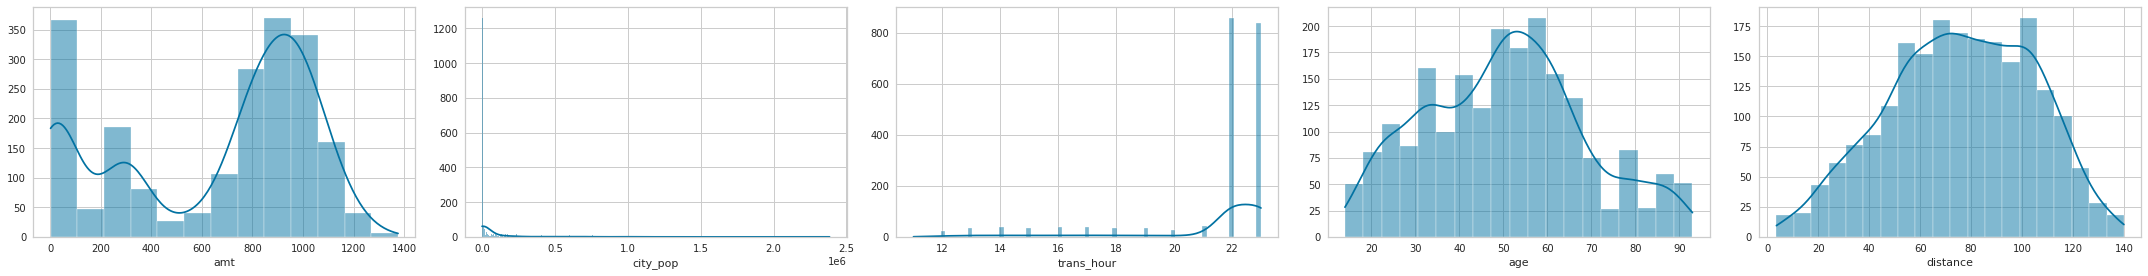

Cluster 3


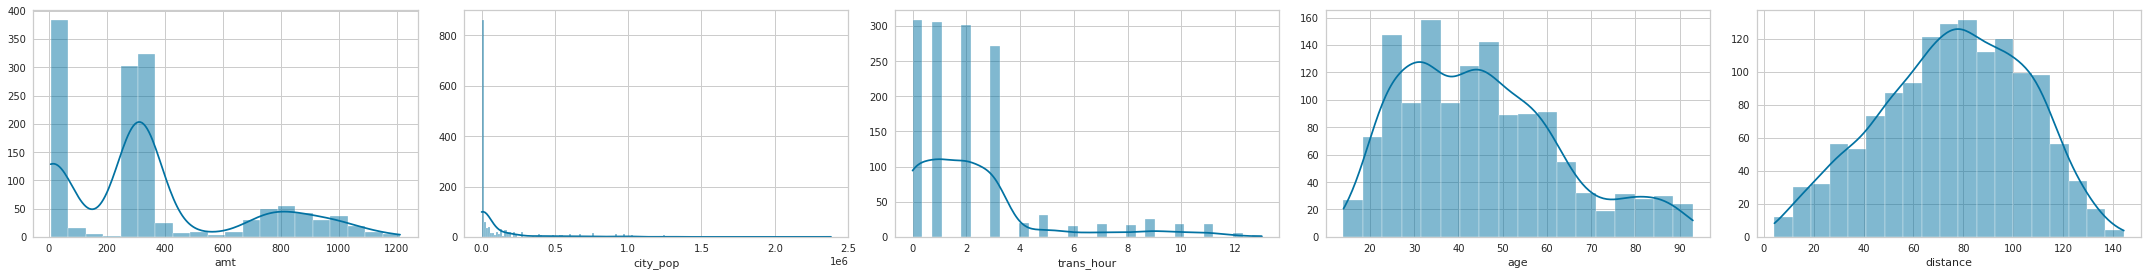

Cluster 4


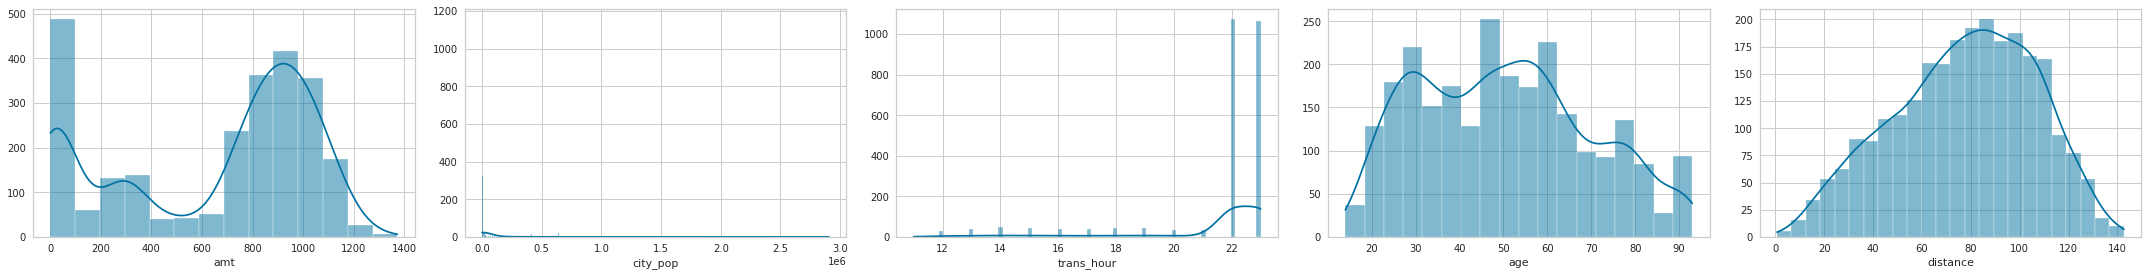

In [60]:
# Tìm tất cả các cột số trong DataFrame 'clusters' mà không phải là 'cluster'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns if col != 'cluster']

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

# Duyệt qua từng giá trị cụm
for cluster_value in cluster_values:
    print(f"Cluster {cluster_value + 1}")  # In ra thông tin về cụm hiện tại
    cluster_data = merged_data[merged_data['cluster'] == cluster_value]  # Lọc dữ liệu cho cụm hiện tại
    plot_numerical_features(cluster_data, numerical_columns)

In [61]:
def plot_boxplot2(df, features, cl):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(len(features), 1, figsize=(15, 12), sharey=True)
    for i, ax in enumerate(axs.flat):
        sns.boxplot(x=features[i], data=df, palette=cl, ax=ax)
        ax.set_xlabel(features[i])
        
        # Tính các giá trị thống kê
        medians = df[features[i]].median()
        q1 = df[features[i]].quantile(0.25)
        q3 = df[features[i]].quantile(0.75)
        iqr = q3 - q1
        lower_threshold = q1 - 1.5 * iqr
        upper_threshold = q3 + 1.5 * iqr
        min_val = df[features[i]].min()
        max_val = df[features[i]].max()
        percentile_95 = df[features[i]].quantile(0.95)
        percentile_5 = df[features[i]].quantile(0.05)
        avg = df[features[i]].mean()
        
        stats_text = f'Avg: {avg:.2f}\nMedian: {medians:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}\nQ1 (25th percentile): {q1:.2f}\nQ3 (75th percentile): {q3:.2f}\n5th percentile: {percentile_5:.2f}\n95th percentile: {percentile_95:.2f}\nLower Threshold: {lower_threshold:.2f}\nUpper Threshold: {upper_threshold:.2f}'

        ax.text(1.2, 0.95, stats_text,
                transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
    plt.tight_layout()
    plt.show()

In [62]:
def plot_categorical_features2(df, features, top_n=20):
    fig, axes = plt.subplots(len(features), 1, figsize=(25, 5*len(features))) # Đặt kích thước của hình ảnh dọc
    for i, ax in enumerate(axes.flat):
        category_count = df[features[i]].value_counts().nlargest(top_n)  # Lấy ra top_n giá trị cao nhất
        category_order = category_count.index.tolist()  # Lấy danh sách các giá trị đã được sắp xếp
        sns.countplot(x=features[i], data=df, ax=ax, palette='Set2', order=category_order) # Vẽ đồ thị

        # Thêm chú thích số liệu lên từng cột
        for p in ax.patches:
            ax.annotate(f'\n{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')

    plt.tight_layout()
    plt.show()

In [63]:
def plot_numerical_features2(df, features):
    num_plots = len(features)
    num_rows = num_plots // 4 + (num_plots % 4 > 0)  # Số hàng cần vẽ

    fig, axes = plt.subplots(num_rows, 4, figsize=(30, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.histplot(x=df[col], ax=axes[i], kde=True)
        axes[i].set_ylabel("")  # Loại bỏ nhãn trục y để giảm độ dày của biểu đồ

    # Ẩn các trục không cần thiết
    for j in range(num_plots, num_rows * 4):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [64]:
import plotly.express as px
import numpy as np
from scipy.stats import gaussian_kde

def plot_numerical_features_plotly(df, features):
    for feature in features:
        data = df[feature]

        # Tính toán KDE
        kde = gaussian_kde(data)
        kde_values = kde.evaluate(np.linspace(data.min(), data.max(), 100))

        # Tạo histogram từ Plotly Express
        fig = px.histogram(df, x=feature, marginal="rug", opacity=0.7, histnorm='probability density')

        # Thêm đường cong KDE từ Plotly Express
        fig.add_scatter(x=np.linspace(data.min(), data.max(), 100), y=kde_values, mode='lines', name='KDE', line=dict(color='red'))
        fig.update_layout(title=f"Histogram with KDE of {feature}", xaxis_title=feature)
        fig.show()


Cluster 1: 


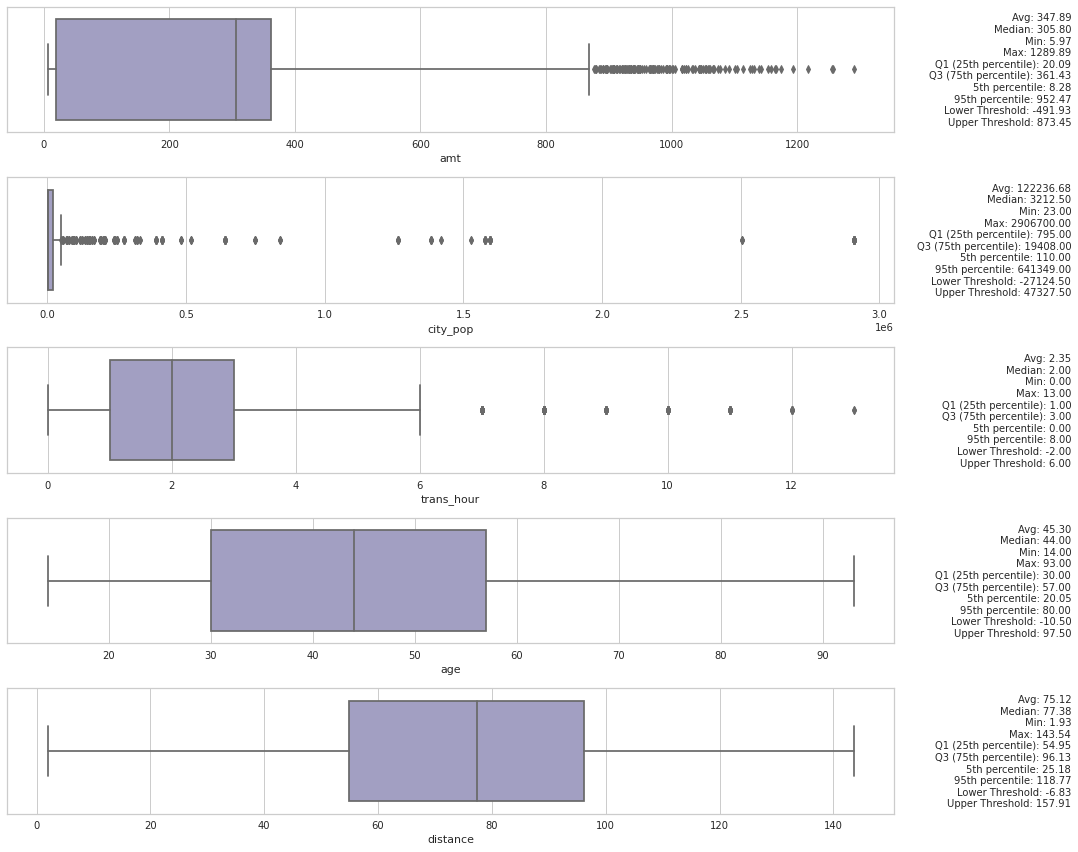

Cluster 2: 


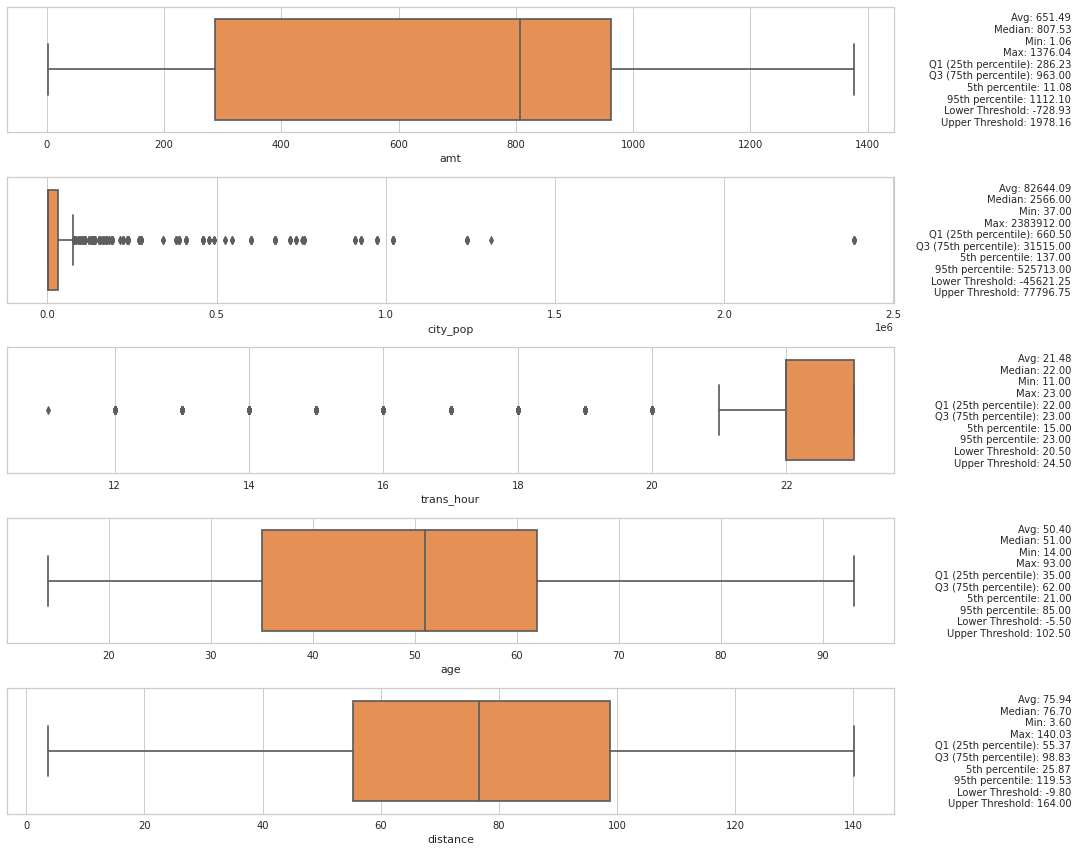

Cluster 3: 


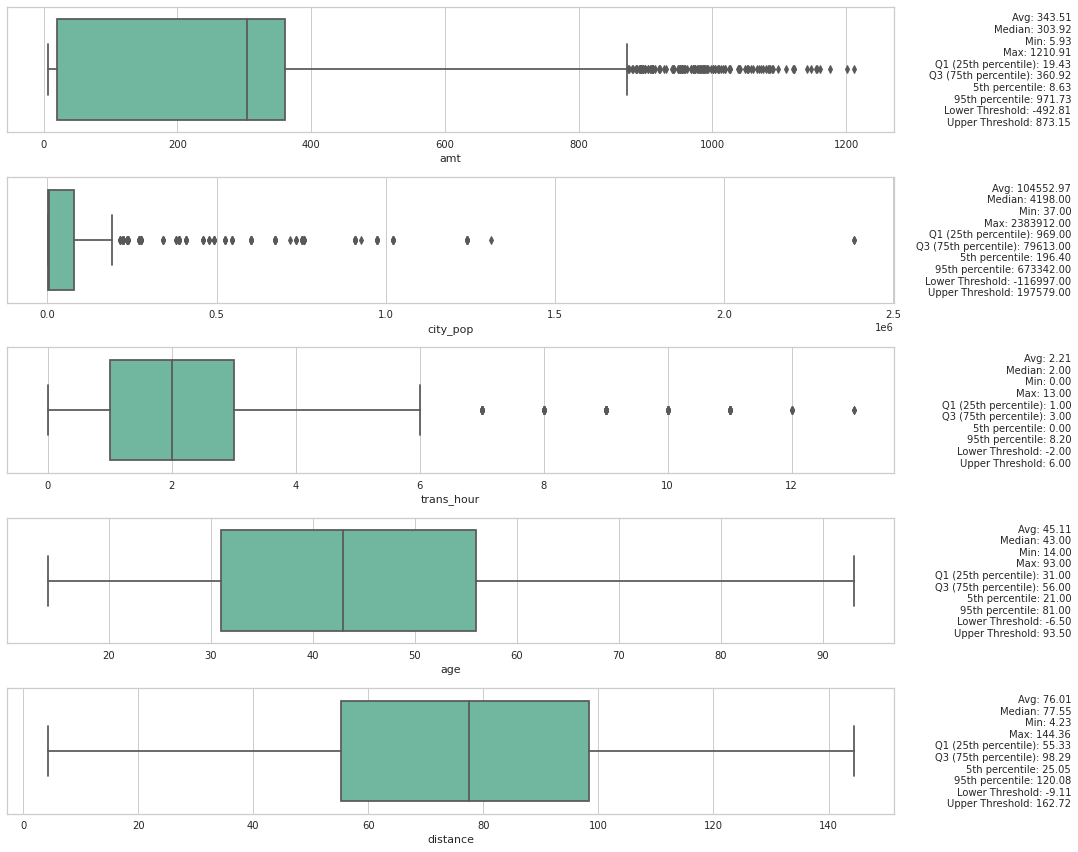

Cluster 4: 


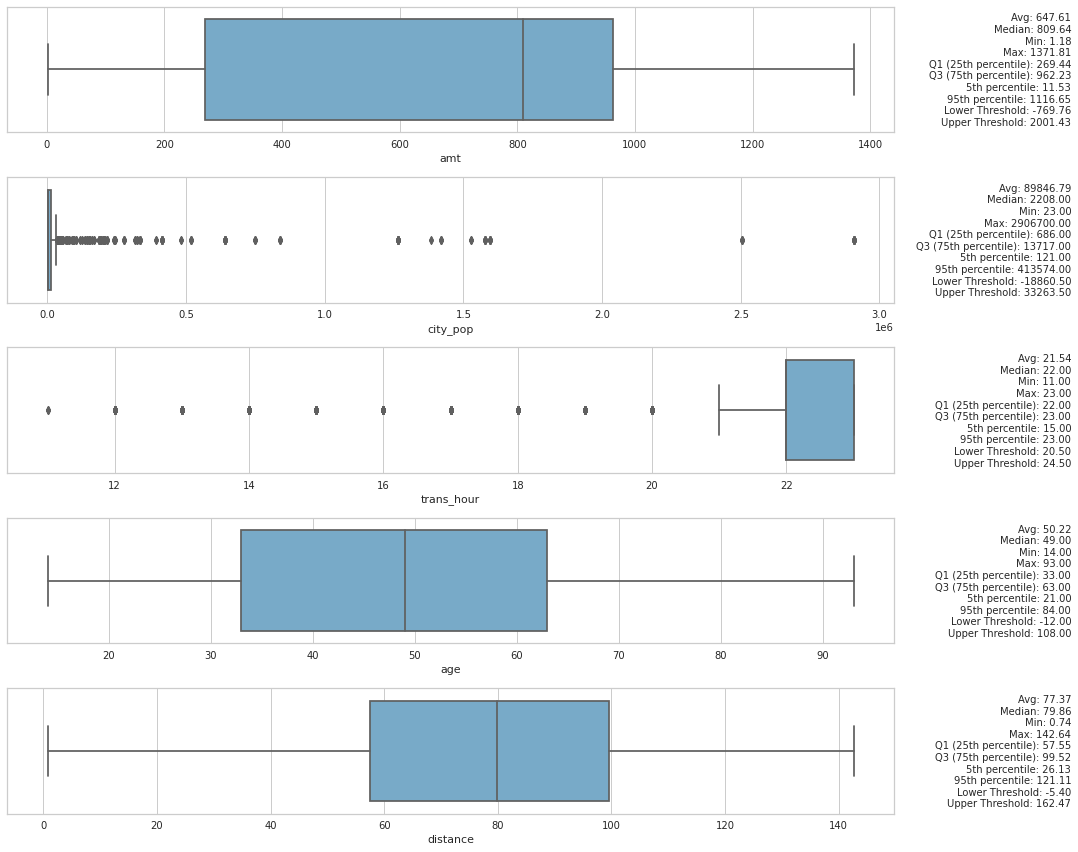

In [65]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns  if col not in ['cluster']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] ==  0]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 1: ')
plot_boxplot2(cluster_data, numerical_columns, 'Purples')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

cluster_data = merged_data[merged_data['cluster'] ==  1]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 2: ')
plot_boxplot2(cluster_data, numerical_columns, 'Oranges')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

cluster_data = merged_data[merged_data['cluster'] ==  2]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 3: ')
plot_boxplot2(cluster_data, numerical_columns, 'BuGn')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

cluster_data = merged_data[merged_data['cluster'] ==  3]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 4: ')
plot_boxplot2(cluster_data, numerical_columns, 'Blues')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [66]:
# Tạo một bản sao của DataFrame để làm việc
df_copy = merged_data.copy()

# Tính IQR riêng cho cụm 0 và 2 dựa trên cột "amt"
q1_cluster_0 = df_copy[df_copy['cluster'] == 0]['amt'].quantile(0.25)
q3_cluster_0 = df_copy[df_copy['cluster'] == 0]['amt'].quantile(0.75)
iqr_cluster_0 = q3_cluster_0 - q1_cluster_0

q1_cluster_2 = df_copy[df_copy['cluster'] == 2]['amt'].quantile(0.25)
q3_cluster_2 = df_copy[df_copy['cluster'] == 2]['amt'].quantile(0.75)
iqr_cluster_2 = q3_cluster_2 - q1_cluster_2

# Tạo cột "cluster2" và gán giá trị mặc định là 0
df_copy['cluster2'] = '0'
df_copy.loc[(df_copy['cluster'] == 1) , 'cluster2'] = '1'
df_copy.loc[(df_copy['cluster'] == 3) , 'cluster2'] = '3'

# Gán giá trị "0.1" cho các dữ liệu không phải outlier của cụm 0
df_copy.loc[(df_copy['cluster'] == 0) & ~((df_copy['amt'] < q1_cluster_0 - 1.5 * iqr_cluster_0) | (df_copy['amt'] > q3_cluster_0 + 1.5 * iqr_cluster_0)), 'cluster2'] = '0.1'

# Gán giá trị "0.2" cho các dữ liệu outlier của cụm 0
df_copy.loc[(df_copy['cluster'] == 0) & ((df_copy['amt'] < q1_cluster_0 - 1.5 * iqr_cluster_0) | (df_copy['amt'] > q3_cluster_0 + 1.5 * iqr_cluster_0)), 'cluster2'] = '0.2'

# Gán giá trị "2.1" cho các dữ liệu không phải outlier của cụm 2
df_copy.loc[(df_copy['cluster'] == 2) & ~((df_copy['amt'] < q1_cluster_2 - 1.5 * iqr_cluster_2) | (df_copy['amt'] > q3_cluster_2 + 1.5 * iqr_cluster_2)), 'cluster2'] = '2.1'

# Gán giá trị "2.2" cho các dữ liệu outlier của cụm 2
df_copy.loc[(df_copy['cluster'] == 2) & ((df_copy['amt'] < q1_cluster_2 - 1.5 * iqr_cluster_2) | (df_copy['amt'] > q3_cluster_2 + 1.5 * iqr_cluster_2)), 'cluster2'] = '2.2'

# In ra 5 dòng cuối cùng của dữ liệu để kiểm tra
df_copy.tail()

merged_data2 = df_copy.copy()

In [67]:
from IPython.display import display, HTML

# Tính số lượng giao dịch theo từng nhóm và theo phạm vi độ tuổi cụ thể
age_ranges = {
    'Under 15': (merged_data2['age'].min(), 14),
    '15-24': (15, 24),
    '25-34': (25, 34),
    '35-44': (35, 44),
    '45-54': (45, 54),
    '55-64': (55, 64),
    '64+': (65, merged_data2['age'].max())
}

# Khởi tạo một DataFrame rỗng
result_df_age = pd.DataFrame(columns=['Age Range', 'Cluster', 'Transactions', 'Percentage'])

for group, age_range in age_ranges.items():
    transactions_age_range = merged_data2[
        (merged_data2['age'] >= age_range[0]) & (merged_data2['age'] <= age_range[1])
    ].groupby('cluster2').size()

    total_transactions_age_range = merged_data2.groupby('cluster2')['cluster2'].count()
    percentage_age_range = (transactions_age_range / total_transactions_age_range) * 100
    percentage_age_range = percentage_age_range.dropna()
    # Tạo DataFrame tạm thời để thêm vào result_df_age
    temp_df = pd.DataFrame({
        'Age Range': [group] * len(transactions_age_range),
        'Cluster': transactions_age_range.index,
        'Transactions': transactions_age_range.values,
        'Percentage': percentage_age_range.values
    })

    result_df_age = pd.concat([result_df_age, temp_df], ignore_index=True)
# Tạo hàm để tô màu Max và Min Percentage
def highlight_max_min_percentage(s):
    max_val = s.max()
    min_val = s.min()

    styles = []
    for val in s:
        if val == max_val:
            styles.append('background-color: #FF3366')  # Tô màu ô có giá trị cao nhất
        elif val == min_val:
            styles.append('background-color: #99FFFF')  # Tô màu ô có giá trị thấp nhất
        else:
            styles.append('')  # Giữ nguyên các ô còn lại

    return styles

# Tạo DataFrame mới để tô màu cho từng nhóm trong mỗi nhóm Age Range
color_dict_age = {
    'Under 15': 'lightblue',
    '15-24': 'lightgreen',
    '25-34': 'lightcoral',
    '35-44': 'lightyellow',
    '45-54': 'lightpink',
    '55-64': 'lightskyblue',
    '64+': 'lightgrey'
}

def highlight_age_range(val):
    return f'background-color: {color_dict_age[val]}'

styled_result_df_age = result_df_age.style.applymap(highlight_age_range, subset=['Age Range'])
grouped_percentage_age = result_df_age.groupby('Age Range')['Percentage']

for name, group in grouped_percentage_age:
    styled_result_df_age.apply(highlight_max_min_percentage, 
                           subset=pd.IndexSlice[group.index, ['Percentage']])


In [68]:
# Thay đổi tên cột và các amt 
amt_ranges = {
    'Under 100': (merged_data2['amt'].min(), 99),
    '100-200': (100, 199),
    '200-500': (200, 499),
    '500-1000': (500, 999),
    '1K+': (1000, merged_data2['amt'].max())
}
# Khởi tạo DataFrame rỗng
result_df_amt = pd.DataFrame(columns=['Amt Range', 'Cluster', 'Total', 'Percentage'])

for group, amt_range in amt_ranges.items():
    transactions_amt_range = merged_data2[
        (merged_data2['amt'] >= amt_range[0]) & (merged_data2['amt'] <= amt_range[1])
    ].groupby('cluster2')['city_pop'].sum()

    total_transactions_amt_range = merged_data2.groupby('cluster2')['city_pop'].sum()
    percentage_amt_range = (transactions_amt_range / total_transactions_amt_range) * 100
    percentage_amt_range = percentage_amt_range.dropna()
    # Tạo DataFrame tạm thời để thêm vào result_df_hour
    temp_df = pd.DataFrame({
        'Amt Range': [group] * len(transactions_amt_range),
        'Cluster': transactions_amt_range.index,
        'Total': transactions_amt_range.values,
        'Percentage': percentage_amt_range.values
    })

    result_df_amt = pd.concat([result_df_amt, temp_df], ignore_index=True)


# Các hàm tô màu và tạo DataFrame mới tô màu cho từng nhóm
# Tạo DataFrame mới để tô màu cho từng nhóm trong mỗi nhóm Amt Range
color_dict_amt = {
    'Under 100': 'lightblue',
    '100-200': 'lightgreen',
    '200-500': 'lightcoral',
    '500-1000': 'lightyellow',
    '1K+': 'lightpink',

}

def highlight_amt_range(val):
    return f'background-color: {color_dict_amt[val]}'

styled_result_df_amt = result_df_amt.style.applymap(highlight_amt_range, subset=['Amt Range'])
grouped_percentage_amt = result_df_amt.groupby('Amt Range')['Percentage']

for name, group in grouped_percentage_amt:
    styled_result_df_amt.apply(highlight_max_min_percentage, 
                           subset=pd.IndexSlice[group.index, ['Percentage']])


In [69]:
# Thay đổi tên cột và các khoảng giờ
hour_ranges = {
    '0-3': (0, 3),
    '4-7': (4, 7),
    '8-11': (8, 11),
    '12-15': (12, 15),
    '16-19': (16, 19),
    '20-21': (20, 21),
    '22-23': (22, 23),
}

# Khởi tạo DataFrame rỗng
result_df_hour = pd.DataFrame(columns=['Hour Range', 'Cluster', 'Transactions', 'Percentage'])

for group, hour_range in hour_ranges.items():
    transactions_hour_range = merged_data2[
        (merged_data2['trans_hour'] >= hour_range[0]) & (merged_data2['trans_hour'] <= hour_range[1])
    ].groupby('cluster2').size()

    total_transactions_hour_range = merged_data2.groupby('cluster2')['cluster2'].count()
    percentage_hour_range = (transactions_hour_range / total_transactions_hour_range) * 100
    percentage_hour_range = percentage_hour_range.dropna()
    # Tạo DataFrame tạm thời để thêm vào result_df_hour
    temp_df = pd.DataFrame({
        'Hour Range': [group] * len(transactions_hour_range),
        'Cluster': transactions_hour_range.index,
        'Transactions': transactions_hour_range.values,
        'Percentage': percentage_hour_range.values
    })

    result_df_hour = pd.concat([result_df_hour, temp_df], ignore_index=True)


# Các hàm tô màu và tạo DataFrame mới tô màu cho từng nhóm
# Tạo DataFrame mới để tô màu cho từng nhóm trong mỗi nhóm Hour Range
color_dict_hour = {
    '0-3': 'lightblue',
    '4-7': 'lightgreen',
    '8-11': 'lightcoral',
    '12-15': 'lightyellow',
    '16-19': 'lightpink',
    '20-21': 'lightskyblue',
    '22-23': 'lightsalmon',
}

def highlight_hour_range(val):
    return f'background-color: {color_dict_hour[val]}'

styled_result_df_hour = result_df_hour.style.applymap(highlight_hour_range, subset=['Hour Range'])
grouped_percentage_hour = result_df_hour.groupby('Hour Range')['Percentage']

for name, group in grouped_percentage_hour:
    styled_result_df_hour.apply(highlight_max_min_percentage, 
                           subset=pd.IndexSlice[group.index, ['Percentage']])


In [70]:
# Thay đổi các giá trị phạm vi dựa trên dân số thành phố ('city_pop')
city_pop_ranges = {
    'Under 100k': (merged_data2['city_pop'].min(), 99999),
    '100k-500k': (100000, 499999),
    '500k-1M': (500000, 999999),
    '1M-2M': (1000000, 1999999),
    '2M+': (2000000, merged_data2['city_pop'].max())
}

# Khởi tạo DataFrame rỗng
result_df_citypop = pd.DataFrame(columns=['City Population Range', 'Cluster', 'Transactions', 'Percentage'])

for group, pop_range in city_pop_ranges.items():
    transactions_pop_range = merged_data2[
        (merged_data2['city_pop'] >= pop_range[0]) & (merged_data2['city_pop'] <= pop_range[1])
    ].groupby('cluster2').size()

    total_transactions_pop_range = merged_data2.groupby('cluster2')['cluster2'].count()
    percentage_pop_range = (transactions_pop_range / total_transactions_pop_range) * 100
    percentage_pop_range = percentage_pop_range.dropna()
    # Tạo DataFrame tạm thời để thêm vào result_df_citypop
    temp_df = pd.DataFrame({
        'City Population Range': [group] * len(transactions_pop_range),
        'Cluster': transactions_pop_range.index,
        'Transactions': transactions_pop_range.values,
        'Percentage': percentage_pop_range.values
    })

    result_df_citypop = pd.concat([result_df_citypop, temp_df], ignore_index=True)

# Các hàm tô màu và tạo DataFrame mới tô màu cho từng nhóm
# Tạo DataFrame mới để tô màu cho từng nhóm trong mỗi nhóm City Population Range
color_dict_citypop = {
    'Under 100k': 'lightblue',
    '100k-500k': 'lightgreen',
    '500k-1M': 'lightcoral',
    '1M-2M': 'lightyellow',
    '2M+': 'lightpink'
}

def highlight_citypop_range(val):
    return f'background-color: {color_dict_citypop[val]}'

styled_result_df_citypop = result_df_citypop.style.applymap(highlight_citypop_range, subset=['City Population Range'])
grouped_percentage_citypop = result_df_citypop.groupby('City Population Range')['Percentage']

for name, group in grouped_percentage_citypop:
    styled_result_df_citypop.apply(highlight_max_min_percentage, 
                           subset=pd.IndexSlice[group.index, ['Percentage']])


In [71]:
# Thay đổi các giá trị phạm vi dựa trên khoảng distance
distance_ranges = {
    '0-50': (merged_data2['distance'].min(), 50),
    '50-100': (50.001, 100),
    '100+': (100.001,merged_data2['distance'].max())
}

# Khởi tạo DataFrame rỗng
result_df_distance = pd.DataFrame(columns=['Distance Range', 'Cluster', 'Transactions', 'Percentage'])

for group, dist_range in distance_ranges.items():
    transactions_dist_range = merged_data2[
        (merged_data2['distance'] >= dist_range[0]) & (merged_data2['distance'] <= dist_range[1])
    ].groupby('cluster2')['distance'].size()

    total_transactions_dist_range = merged_data2.groupby('cluster2')['distance'].count()
    percentage_dist_range = (transactions_dist_range / total_transactions_dist_range) * 100
    percentage_dist_range = percentage_dist_range.dropna()
    # Tạo DataFrame tạm thời để thêm vào result_df_distance
    temp_df_distance = pd.DataFrame({
        'Distance Range': [group] * len(transactions_dist_range),
        'Cluster': transactions_dist_range.index,
        'Transactions': transactions_dist_range.values,
        'Percentage': percentage_dist_range.values
    })

    result_df_distance = pd.concat([result_df_distance, temp_df_distance], ignore_index=True)

# Các hàm tô màu và tạo DataFrame mới tô màu cho từng nhóm

# Tạo DataFrame mới để tô màu cho từng nhóm trong mỗi nhóm Distance Range
color_dict_distance = {
    '0-50': 'lightblue',
    '50-100': 'lightgreen',
    '100+': 'lightcoral'
}

def highlight_distance_range(val):
    return f'background-color: {color_dict_distance[val]}'

styled_result_df_distance = result_df_distance.style.applymap(highlight_distance_range, subset=['Distance Range'])
grouped_percentage_distance = result_df_distance.groupby('Distance Range')['Percentage']

for name, group in grouped_percentage_distance:
    styled_result_df_distance.apply(highlight_max_min_percentage, 
                                    subset=pd.IndexSlice[group.index, ['Percentage']])


In [72]:
# Lấy HTML cho từng bảng DataFrame
html_tables = []

html_tables.append(styled_result_df_amt.render())
html_tables.append(styled_result_df_citypop.render())
html_tables.append(styled_result_df_hour.render())
html_tables.append(styled_result_df_age.render())
html_tables.append(styled_result_df_distance.render())

# Tạo HTML và CSS để hiển thị các bảng trên cùng một hàng
combined_html = "<div style='display: flex; flex-direction: row;'>"
for html_table in html_tables:
    combined_html += f"<div style='margin: 10px; border: 1px solid #ddd; padding: 10px;'>{html_table}</div>"
combined_html += "</div>"

# Hiển thị các bảng trên cùng một hàng
display(HTML(combined_html))



In [73]:
# Hàm để lấy tên cụm có Percentage trong mỗi nhóm Range
def get_max_percentage_cluster(df):
    # Tìm hàng có Percentage cao nhất trong từng nhóm Range
    max_indices = df.groupby(df.columns[0])['Percentage'].idxmax()
    # Lấy tên cụm của hàng đó
    max_clusters = df.loc[max_indices.sort_values()]['Cluster'].values
    return max_clusters


def get_percentage(df):
    # Tìm hàng có Percentage cao nhất trong từng nhóm Range
    max_indices = df.groupby(df.columns[0])['Percentage'].idxmax()
    # Lấy tên cụm của hàng đó
    max_percentage = df.loc[max_indices.sort_values()]['Percentage'].values
    return max_percentage

# Tạo DataFrame chứa các thông tin Age Range, Hour Range, City Population Range, Distance Range và tên Cluster có Percentage max trong mỗi nhóm
summary_df_age = pd.DataFrame({
    'Age Range': styled_result_df_age.data['Age Range'].unique(),
    'Max Percentage Cluster (Age)': get_max_percentage_cluster(styled_result_df_age.data),
    'Max Percentage (Age)': get_percentage(styled_result_df_age.data)
})

summary_df_amt = pd.DataFrame({
    'Amt Range': styled_result_df_amt.data['Amt Range'].unique(),
    'Max Percentage Cluster (Amt)': get_max_percentage_cluster(styled_result_df_amt.data),
    'Max Percentage (Amt)': get_percentage(styled_result_df_amt.data)
})

summary_df_hour = pd.DataFrame({
    'Hour Range': styled_result_df_hour.data['Hour Range'].unique(),
    'Max Percentage Cluster (Hour)': get_max_percentage_cluster(styled_result_df_hour.data),
    'Max Percentage (Hour)': get_percentage(styled_result_df_hour.data)
})

summary_df_citypop = pd.DataFrame({
    'City Population Range': styled_result_df_citypop.data['City Population Range'].unique(),
    'Max Percentage Cluster (CityPop)': get_max_percentage_cluster(styled_result_df_citypop.data),
    'Max Percentage (CityPop)': get_percentage(styled_result_df_citypop.data)
})
summary_df_distance = pd.DataFrame({
    'Distance Range': styled_result_df_distance.data['Distance Range'].unique(),
    'Max Percentage Cluster (Distance)': get_max_percentage_cluster(styled_result_df_distance.data),
    'Max Percentage (Distance)': get_percentage(styled_result_df_distance.data)
})

# Tạo HTML và CSS để hiển thị các bảng cạnh nhau
combined_html2 = "<div style='display: flex;'>"

# Thêm từng DataFrame vào HTML để hiển thị cạnh nhau
for df in [
    summary_df_amt.style.applymap(highlight_amt_range, subset=['Amt Range']),
    summary_df_citypop.style.applymap(highlight_citypop_range, subset=['City Population Range']),
    summary_df_hour.style.applymap(highlight_hour_range, subset=['Hour Range']),
    summary_df_age.style.applymap(highlight_age_range, subset=['Age Range']),
    summary_df_distance.style.applymap(highlight_distance_range, subset=['Distance Range'])
]:
    table_html = df.to_html()
    combined_html2 += f"<div style='margin-right: 20px;'>{table_html}</div>"

combined_html2 += "</div>"

# Hiển thị các bảng cạnh nhau
display(HTML(combined_html2))

## Cluster 1

### Cluster 1.1 ( ~ Outlier )

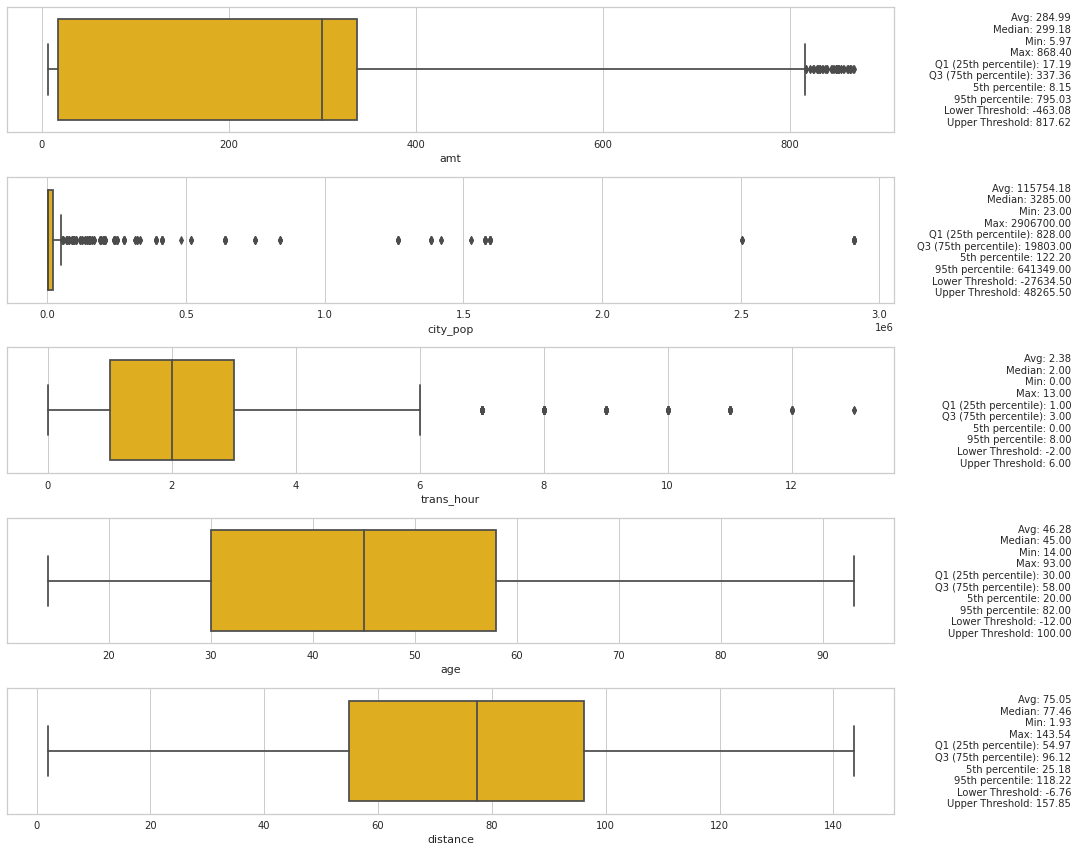

In [74]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '0.1']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'Wistia')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [75]:
cluster_data

merchant       category     amt gender           city  \
0               Rutherford-Mertz    grocery_pos 281.060      M  Collettsville   
1     Jenkins, Hauck and Friesen  gas_transport  11.520      F    San Antonio   
2               Goodwin-Nitzsche    grocery_pos 276.310      F    San Antonio   
3               Erdman-Kertzmann  gas_transport   7.030      M  Collettsville   
4                    Koepp-Parke    grocery_pos 275.730      F    San Antonio   
...                          ...            ...     ...    ...            ...   
7476               Koepp-Witting    grocery_pos 352.670      F        Notrees   
7480                   Kutch LLC  gas_transport   8.280      F        Altonah   
7481              Kiehn-Emmerich    grocery_pos 353.570      F        Altonah   
7499  Adams, Kovacek and Kuhlman    grocery_net  15.870      F        Notrees   
7504              Corwin-Collins  gas_transport  21.690      F        Notrees   

     state  city_pop                       job year_month day_of_week  \
0       NC       885            Soil scientist    2019-01   Wednesday   
1       TX   1595797  Horticultural consultant    2019-01   Wednesday   
2       TX   1595797  Horticultural consultant    2019-01   Wednesday   
3       NC       885            Soil scientist    2019-01   Wednesday   
4       TX   1595797  Horticultural consultant    2019-01   Wednesday   
...    ...       ...                       ...        ...         ...   
7476    TX        23            Cytogeneticist    2020-06    Saturday   
7480    UT       302    Sales professional, IT    2020-06    Saturday   
7481    UT       302    Sales professional, IT    2020-06    Saturday   
7499    TX        23            Cytogeneticist    2020-06      Sunday   
7504    TX        23            Cytogeneticist    2020-06      Sunday   

      trans_hour  age  distance  cluster cluster2  
0              1   30    68.963        0      0.1  
1              1   58    78.443        0      0.1  
2              3   58    41.048        0      0.1  
3              3   30    34.212        0      0.1  
4              3   58    44.125        0      0.1  
...          ...  ...       ...      ...      ...  
7476           0   50    76.311        0      0.1  
7480           2   30   115.030        0      0.1  
7481           2   30    80.870        0      0.1  
7499           0   50    92.238        0      0.1  
7504           3   50   114.386        0      0.1  

[1423 rows x 15 columns]

In [76]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

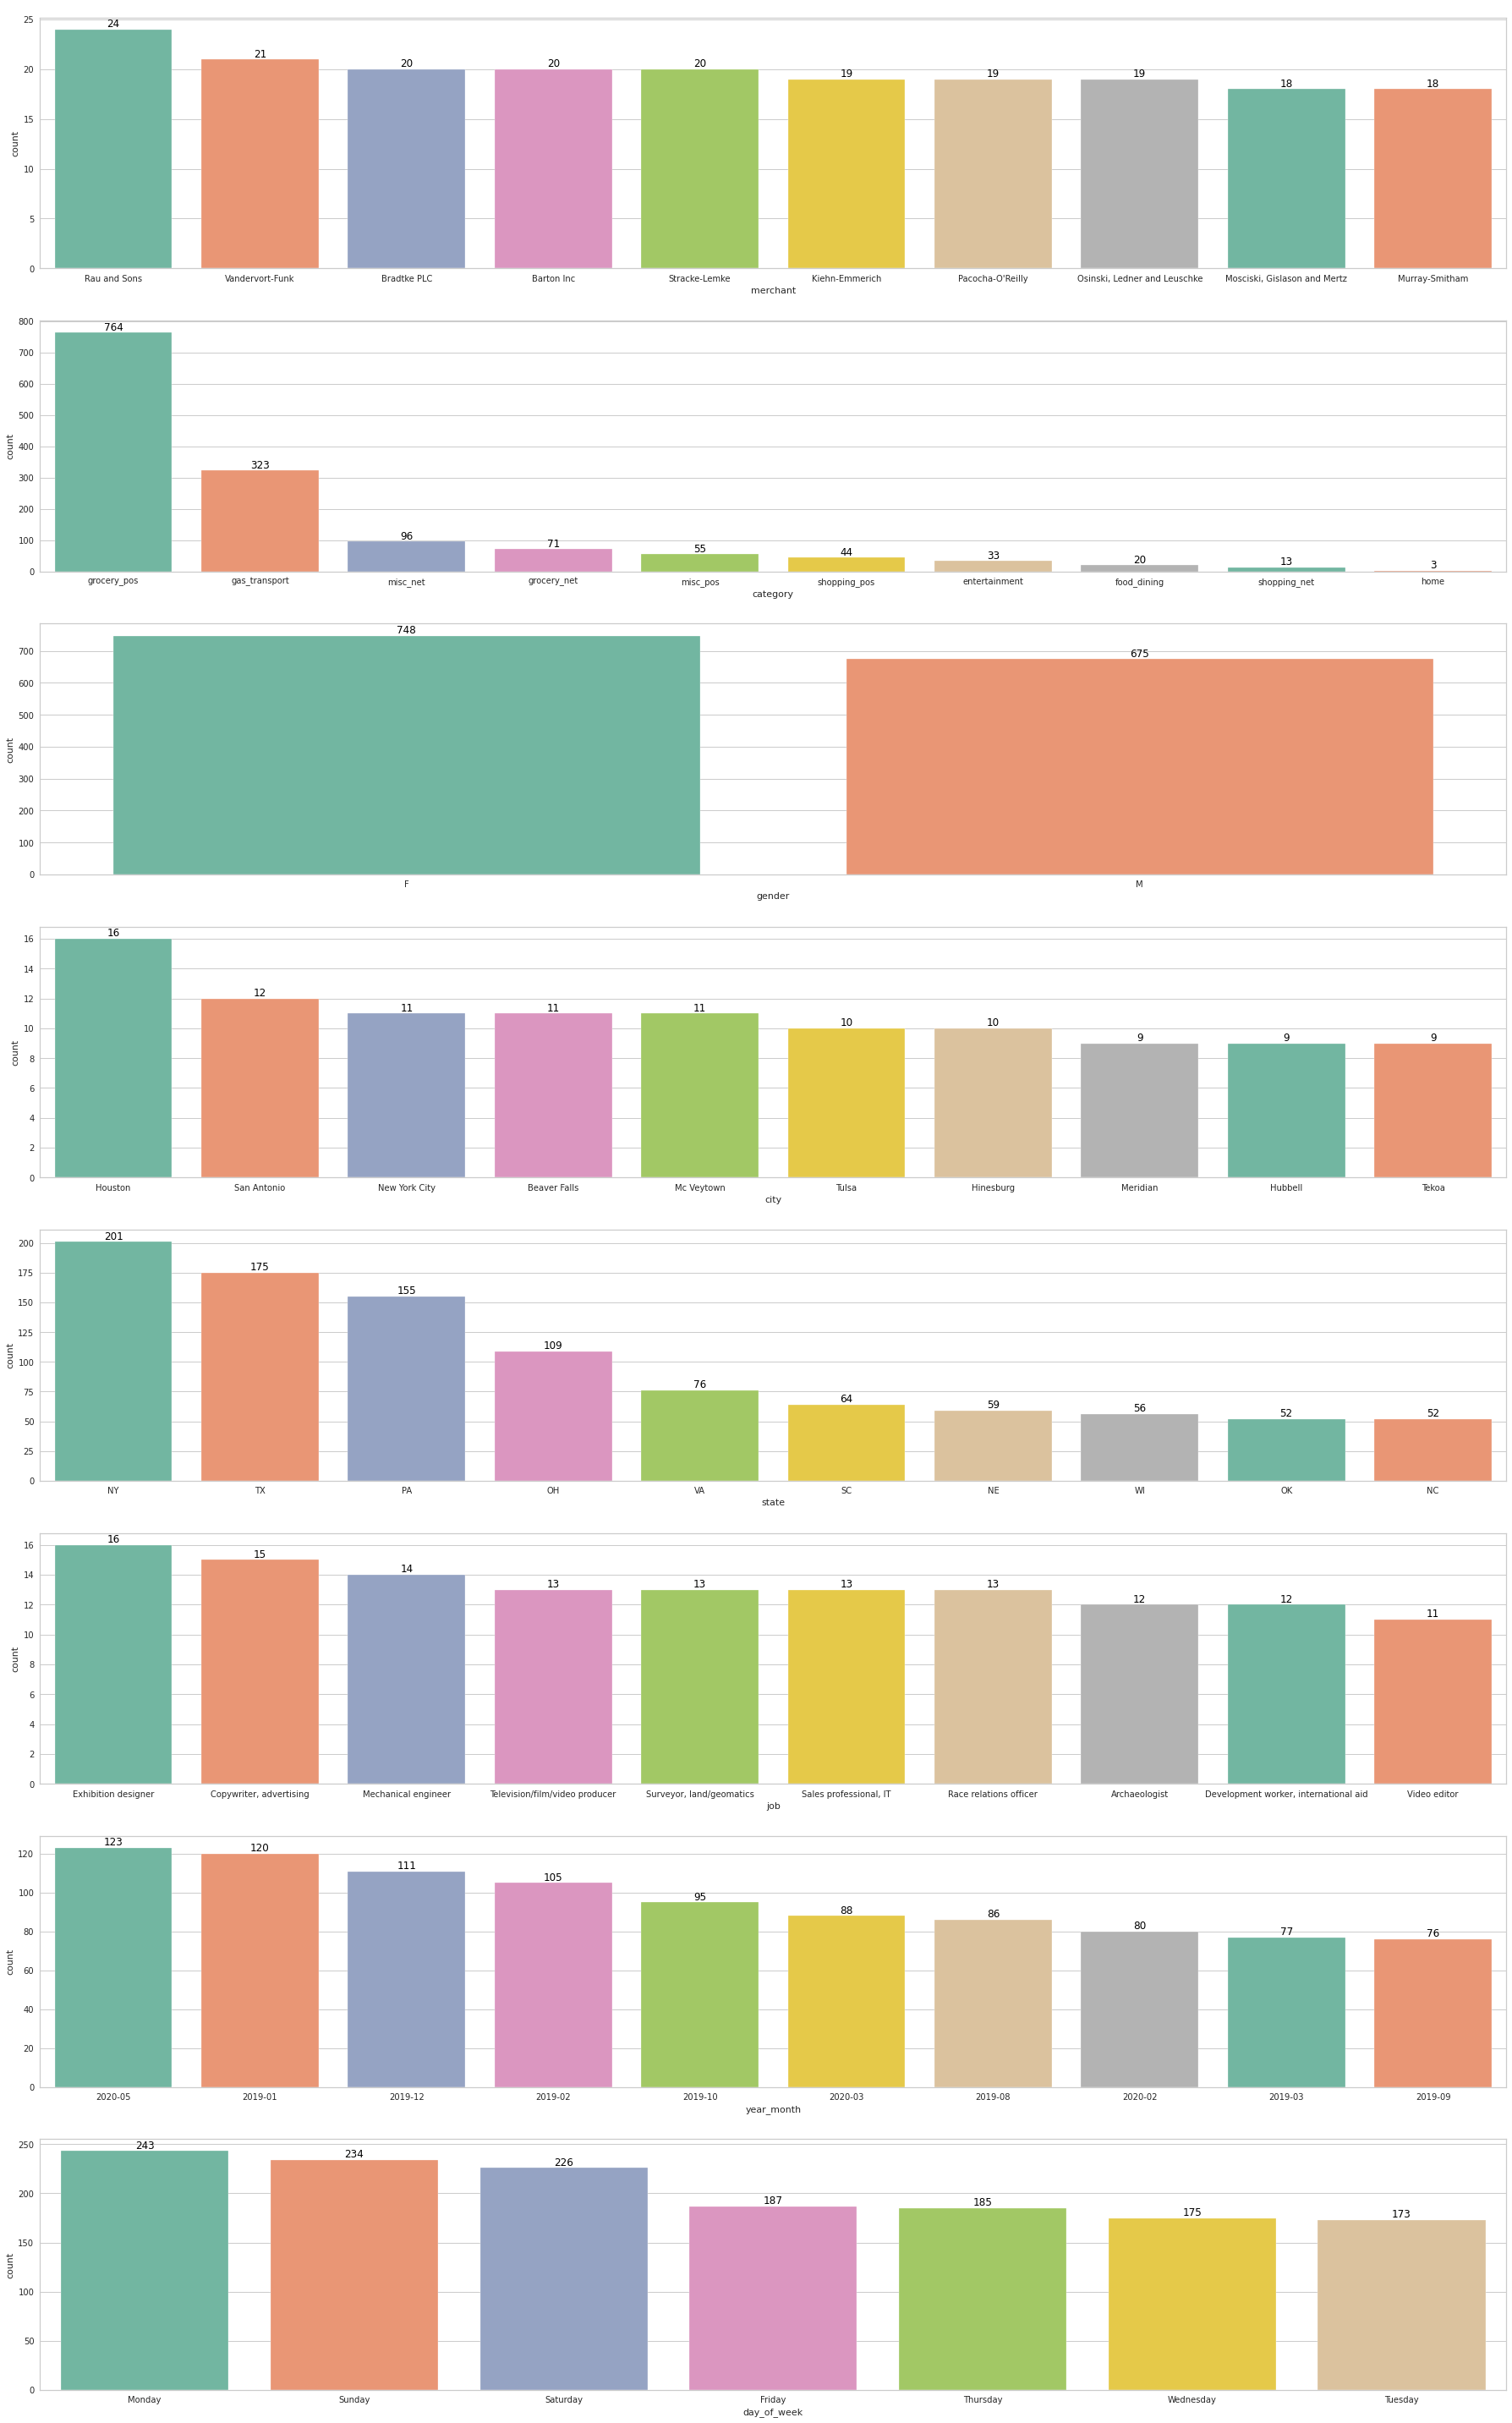

In [77]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns if feature not in ['cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '0.1']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

## Nhóm giao dịch gian lận (Cluster 1.1) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại "grocery_pos".
- **Giới tính:** Nữ chiếm tỉ lệ cao hơn Nam trong giao dịch gian lận, với 748 giao dịch so với 675 giao dịch của Nam.
- **Thành phố gian lận cao nhất:** Houston được xác định là thành phố với số lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:** NY, TX, và PA là 3 bang có số lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:** Exhibition designer, Copywriter advertising, Mechanical engineer.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào: 2020 - 5, 2019 - 01, 2019 - 12.
- **Ngày gian lận:** Phân phối tập trung vào Thứ 2, Chủ Nhật và Thứ 7.

### Nhận xét
- **Số tiền giao dịch gian lận tập trung ở mức thấp.**
  - Avg: 284.99
  - Median: 299.18
  - Min: 5.97
  - Max: 868.40
  - Q1 (25th percentile): 17.19
  - Q3 (75th percentile): 337.36
  - 5th percentile: 8.15
  - 95th percentile: 795.03

- **Dân số thành phố (city_pop) thường ở mức dân là thấp và cao.**
  - Avg: 115754.18
  - Median: 3285.00
  - Min: 23.00
  - Max: 2906700.00
  - Q1 (25th percentile): 828.00
  - Q3 (75th percentile): 19803.00
  - 5th percentile: 122.20
  - 95th percentile: 641349.00
  - Upper Threshold: 48265.50

- **Giờ giao dịch chủ yếu từ nửa đêm đến sáng sớm (0 giờ đến 3 giờ sáng).**
  - Avg: 2.38
  - Median: 2.00
  - Min: 0.00
  - Max: 13.00
  - Q1 (25th percentile): 1.00
  - Q3 (75th percentile): 3.00
  - 5th percentile: 0.00
  - 95th percentile: 8.00
  - Upper Threshold: 6.00

- **Phần lớn người thực hiện giao dịch gian lận có độ tuổi từ 30 đến 58, với 2 đỉnh cao mật độ ở khoảng 25-29 và 45-49 tuổi. Giao dịch chủ yếu từ những người trung niên.**
  - Avg: 46.28
  - Median: 45.00
  - Min: 14.00
  - Max: 93.00
  - Q1 (25th percentile): 30.00
  - Q3 (75th percentile): 58.00
  - 5th percentile: 20.00
  - 95th percentile: 82.00
  - Upper Threshold: 100.00

- **Khoảng cách giữa khách hàng và người bán hàng tương đối, mật độ cao chủ yếu 80-90 Km.**
  - Avg: 75.05
  - Median: 77.46
  - Min: 1.93
  - Max: 143.54
  - Q1 (25th percentile): 54.97
  - Q3 (75th percentile): 96.12
  - 5th percentile: 25.18
  - 95th percentile: 118.22
  - Upper Threshold: 157.85


In [78]:
def amount_percentage_amt_range(data_frame, amt_a, amt_b):
    # Lọc dữ liệu theo phạm vi số tiền từ amt_a đến amt_b cho các nhóm và tính tổng số tiền
    filtered_data = data_frame[(data_frame['amt'] >= amt_a) & (data_frame['amt'] <= amt_b)]
    amt_range = filtered_data.groupby('cluster2')['amt'].sum()

    # Tổng số tiền trong phạm vi số tiền từ amt_a đến amt_b
    total_amt_range = data_frame.groupby('cluster2')['amt'].sum()

    # Tính phần trăm cho từng nhóm với tổng số tiền trong phạm vi số tiền
    percentage_amt_range = (amt_range / total_amt_range) * 100

    return amt_range, percentage_amt_range

# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi số tiền từ amt_a đến amt_b
amt_a = 17.19  # Số tiền amt_a
amt_b = 337.36  # Số tiền amt_b
amt_range, percentages_amt_range = amount_percentage_amt_range(merged_data2, amt_a, amt_b)

# In ra tổng số tiền và phần trăm số tiền cho từng nhóm trong phạm vi số tiền từ amt_a đến amt_b
print(f"Tổng số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(amt_range)

print(f"\nPhần trăm số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(percentages_amt_range)

Tổng số tiền từ 17.19 đến 337.36 cho từng nhóm:
cluster2
0.1   193520.410
1      77544.550
2.1   167291.060
3      84584.520
Name: amt, dtype: float64

Phần trăm số tiền từ 17.19 đến 337.36 cho từng nhóm:
cluster2
0.1   47.719
0.2      NaN
1      5.801
2.1   48.822
2.2      NaN
3      5.152
Name: amt, dtype: float64


In [79]:
def population_percentage_range(data_frame, city_pop_a, city_pop_b):
    # Lọc dữ liệu theo phạm vi dân số từ city_pop_a đến city_pop_b cho các nhóm và tính tổng dân số
    filtered_data = data_frame[(data_frame['city_pop'] >= city_pop_a) & (data_frame['city_pop'] <= city_pop_b)]
    pop_range = filtered_data.groupby('cluster2').size()

    # Tổng dân số trong phạm vi dân số từ city_pop_a đến city_pop_b
    total_pop_range = data_frame.groupby('cluster2')['cluster2'].count()

    # Tính phần trăm dân số cho từng nhóm với tổng dân số trong phạm vi dân số
    percentage_pop_range = (pop_range / total_pop_range) * 100

    return pop_range, percentage_pop_range

# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi dân số từ city_pop_a đến city_pop_b
city_pop_a = 828  # Dân số city_pop_a
city_pop_b = 19803  # Dân số city_pop_b
pop_range, percentages_pop_range = population_percentage_range(merged_data2, city_pop_a, city_pop_b)

# In ra tổng dân số và phần trăm dân số cho từng nhóm trong phạm vi dân số từ city_pop_a đến city_pop_b
print(f"Tổng dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(pop_range)

print(f"\nPhần trăm dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(percentages_pop_range)


Tổng dân số từ 828 đến 19803 cho từng nhóm:
cluster2
0.1     717
0.2      58
1       887
2.1     523
2.2      63
3      1285
dtype: int64

Phần trăm dân số từ 828 đến 19803 cho từng nhóm:
cluster2
0.1   50.387
0.2   41.727
1     43.226
2.1   42.451
2.2   50.400
3     50.690
dtype: float64


In [80]:
def transactions_percentage_age_range(data_frame, age_a, age_b):
    # Lọc dữ liệu theo phạm vi tuổi từ a đến b cho các nhóm
    filtered_data = data_frame[(data_frame['age'] >= age_a) & (data_frame['age'] <= age_b)]
    transactions_age_range = filtered_data.groupby('cluster2').size()

    # Tổng số giao dịch trong phạm vi tuổi từ a đến b
    total_transactions_age_range = data_frame.groupby('cluster2')['cluster2'].count()

    # Tính phần trăm cho từng nhóm
    percentage_age_range = (transactions_age_range / total_transactions_age_range) * 100

    return transactions_age_range, percentage_age_range

# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi tuổi từ a đến b
age_a = 30  # Tuổi a
age_b = 58  # Tuổi b
transactions, percentages = transactions_percentage_age_range(merged_data2, age_a, age_b)

# In ra số lượng giao dịch và phần trăm cho từng nhóm trong phạm vi tuổi từ a đến b
print(f"Số lượng giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(transactions)

print(f"\nPhần trăm giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(percentages)


Số lượng giao dịch từ 30 đến 58 tuổi cho từng nhóm:
cluster2
0.1     750
0.2      92
1      1073
2.1     679
2.2      97
3      1257
dtype: int64

Phần trăm giao dịch từ 30 đến 58 tuổi cho từng nhóm:
cluster2
0.1   52.706
0.2   66.187
1     52.290
2.1   55.114
2.2   77.600
3     49.586
dtype: float64


### Cluster 1.2 ( Outlier )

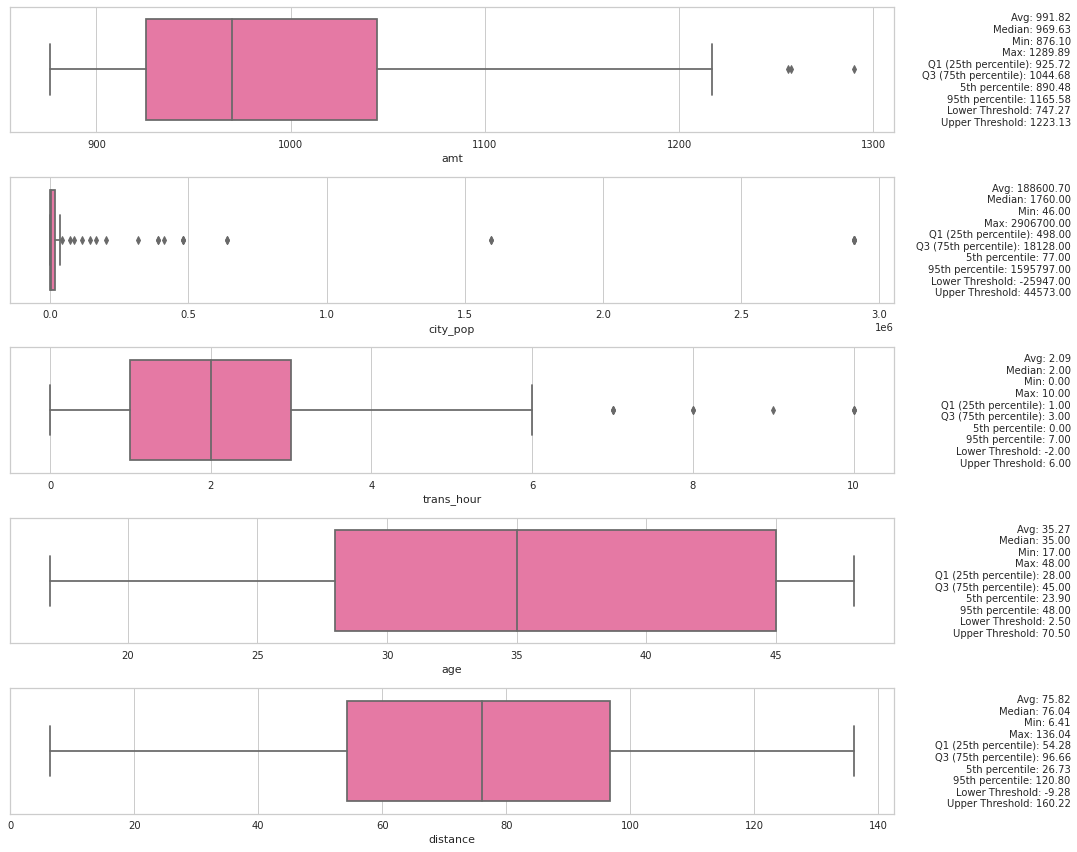

In [81]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '0.2']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'RdPu')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [82]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

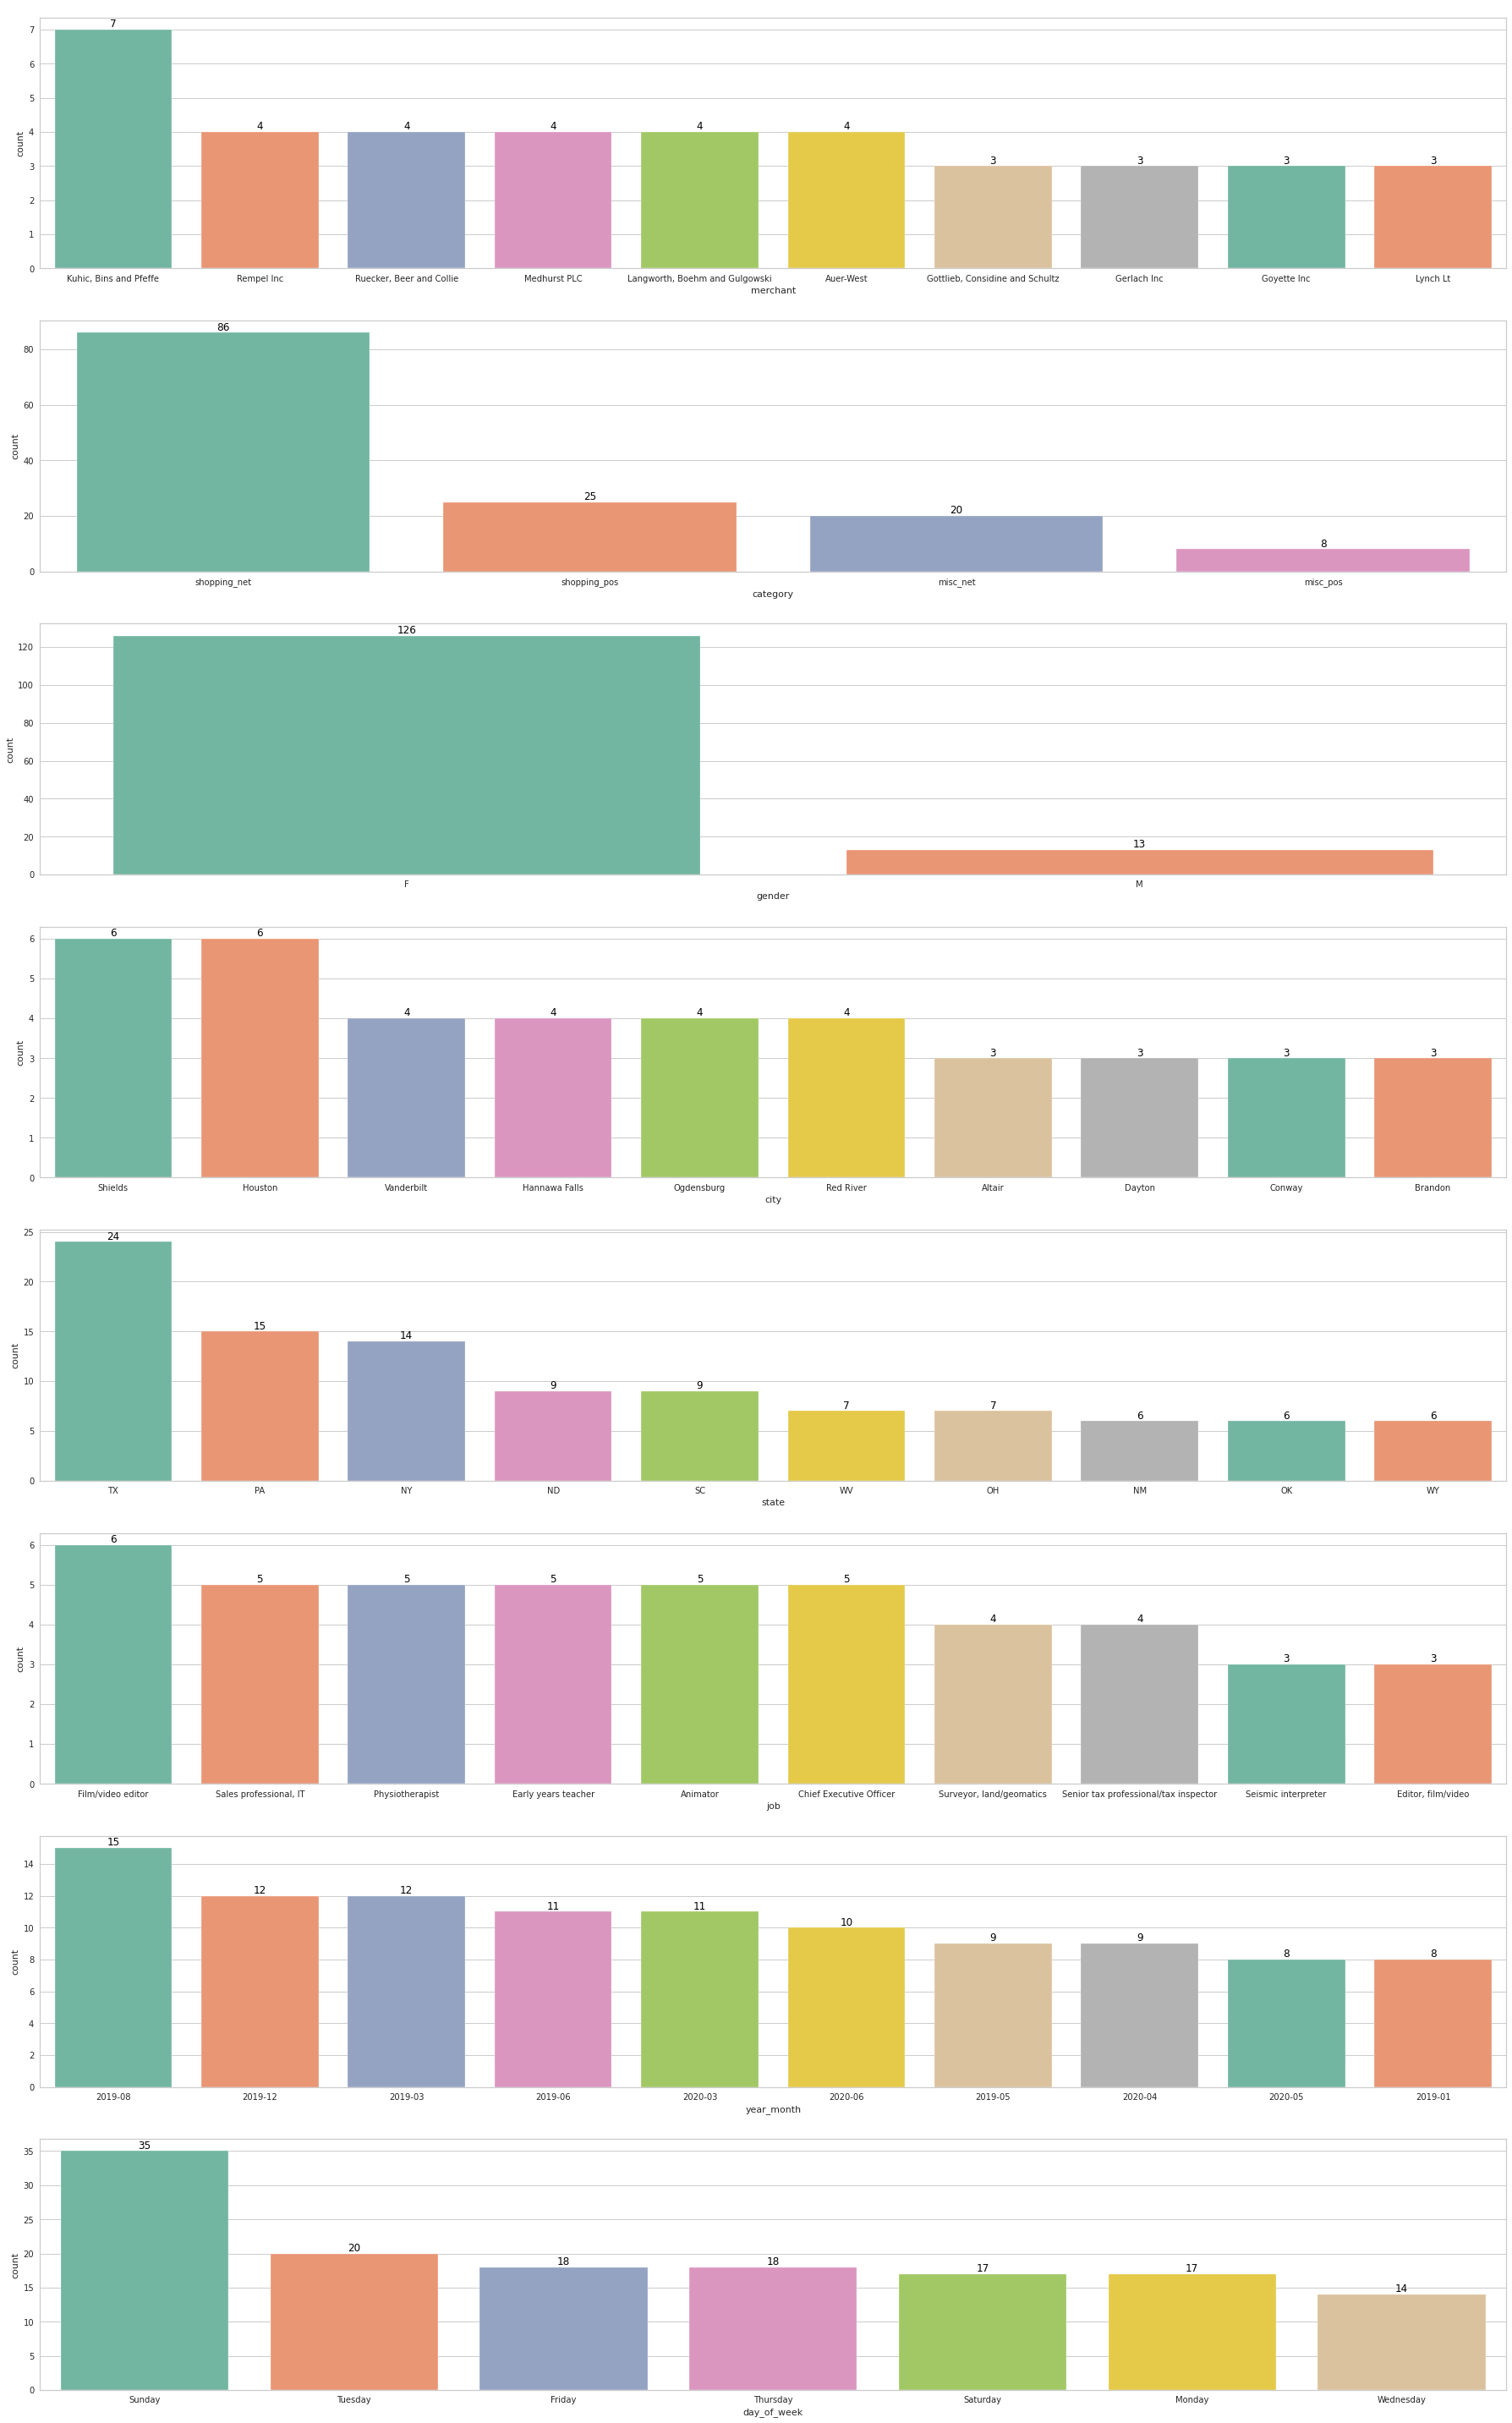

In [83]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns if feature not in ['cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '0.2']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

## Nhóm giao dịch gian lận (Cluster 1.2) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại "shopping_net".
- **Giới tính:** Nữ chiếm đa số Nam trong giao dịch gian lận, với 128 giao dịch so với 13 giao dịch của Nam.
- **Thành phố gian lận cao nhất:** Shields và Houston được xác định là thành phố với số lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:** TX, PA và NY là 3 bang có số lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:** Film/video editor, Sales professional IT, Physiotherapist.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào: 2019 - 8, 2019 - 12, 2019 - 3.
- **Ngày gian lận:** Tập trung vào Chủ Nhật.

### Nhận xét
- **Số tiền giao dịch gian lận tập trung ở mức cao.**
  - Avg: 991.82
  - Median: 969.63
  - Min: 876.10
  - Max: 1289.89
  - Q1 (25th percentile): 925.72
  - Q3 (75th percentile): 1044.68
  - 5th percentile: 890.48
  - 95th percentile: 1165.58
  - Lower Threshold: 747.27
  - Upper Threshold: 1223.13

- **Dân số thành phố (city_pop) thường ở mức trung bình đến cao.**
  - Avg: 188600.70
  - Median: 1760.00
  - Min: 46.00
  - Max: 2906700.00
  - Q1 (25th percentile): 498.00
  - Q3 (75th percentile): 18128.00
  - 5th percentile: 77.00
  - 95th percentile: 1595797.00
  - Upper Threshold: 44573.00

- **Giờ giao dịch chủ yếu từ nửa đêm đến sáng sớm (0 giờ đến 3 giờ sáng).**
  - Avg: 2.09
  - Median: 2.00
  - Min: 0.00
  - Max: 10.00
  - Q1 (25th percentile): 1.00
  - Q3 (75th percentile): 3.00
  - 5th percentile: 0.00
  - 95th percentile: 7.00
  - Upper Threshold: 6.00

- **Phần lớn người thực hiện giao dịch gian lận có độ tuổi từ 28 đến 45, với 2 đỉnh cao mật độ ở khoảng 25-29 và 45-49 tuổi.**
  - Avg: 35.27
  - Median: 35.00
  - Min: 17.00
  - Max: 48.00
  - Q1 (25th percentile): 28.00
  - Q3 (75th percentile): 45.00
  - 5th percentile: 23.90
  - 95th percentile: 48.00
  - Upper Threshold: 70.50

- **Khoảng cách giữa khách hàng và người bán hàng tương đối, mật độ cao chủ yếu 70-80 Km.**
  - Avg: 75.82
  - Median: 76.04
  - Min: 6.41
  - Max: 136.04
  - Q1 (25th percentile): 54.28
  - Q3 (75th percentile): 96.66
  - 5th percentile: 26.73
  - 95th percentile: 120.80
  - Upper Threshold: 160.22


In [84]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi số tiền từ amt_a đến amt_b
amt_a = 925.72  # Số tiền amt_a
amt_b = 1044.68  # Số tiền amt_b
amt_range, percentages_amt_range = amount_percentage_amt_range(merged_data2, amt_a, amt_b)

# In ra tổng số tiền và phần trăm số tiền cho từng nhóm trong phạm vi số tiền từ amt_a đến amt_b
print(f"Tổng số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(amt_range)

print(f"\nPhần trăm số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(percentages_amt_range)

Tổng số tiền từ 925.72 đến 1044.68 cho từng nhóm:
cluster2
0.2    67212.380
1     401233.330
2.2    60916.260
3     472406.410
Name: amt, dtype: float64

Phần trăm số tiền từ 925.72 đến 1044.68 cho từng nhóm:
cluster2
0.1      NaN
0.2   48.753
1     30.013
2.1      NaN
2.2   49.328
3     28.776
Name: amt, dtype: float64


In [85]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi dân số từ city_pop_a đến city_pop_b
city_pop_a = 498  # Dân số city_pop_a
city_pop_b = 18128  # Dân số city_pop_b
pop_range, percentages_pop_range = population_percentage_range(merged_data2, city_pop_a, city_pop_b)

# In ra tổng dân số và phần trăm dân số cho từng nhóm trong phạm vi dân số từ city_pop_a đến city_pop_b
print(f"Tổng dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(pop_range)

print(f"\nPhần trăm dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(percentages_pop_range)

Tổng dân số từ 498 đến 18128 cho từng nhóm:
cluster2
0.1     814
0.2      72
1      1074
2.1     617
2.2      69
3      1475
dtype: int64

Phần trăm dân số từ 498 đến 18128 cho từng nhóm:
cluster2
0.1   57.203
0.2   51.799
1     52.339
2.1   50.081
2.2   55.200
3     58.185
dtype: float64


In [86]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi tuổi từ a đến b
age_a = 28  # Tuổi a
age_b = 45  # Tuổi b
transactions, percentages = transactions_percentage_age_range(merged_data2, age_a, age_b)

# In ra số lượng giao dịch và phần trăm cho từng nhóm trong phạm vi tuổi từ a đến b
print(f"Số lượng giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(transactions)

print(f"\nPhần trăm giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(percentages)

Số lượng giao dịch từ 28 đến 45 tuổi cho từng nhóm:
cluster2
0.1    483
0.2     81
1      531
2.1    410
2.2     82
3      746
dtype: int64

Phần trăm giao dịch từ 28 đến 45 tuổi cho từng nhóm:
cluster2
0.1   33.942
0.2   58.273
1     25.877
2.1   33.279
2.2   65.600
3     29.428
dtype: float64


## Cluster 2

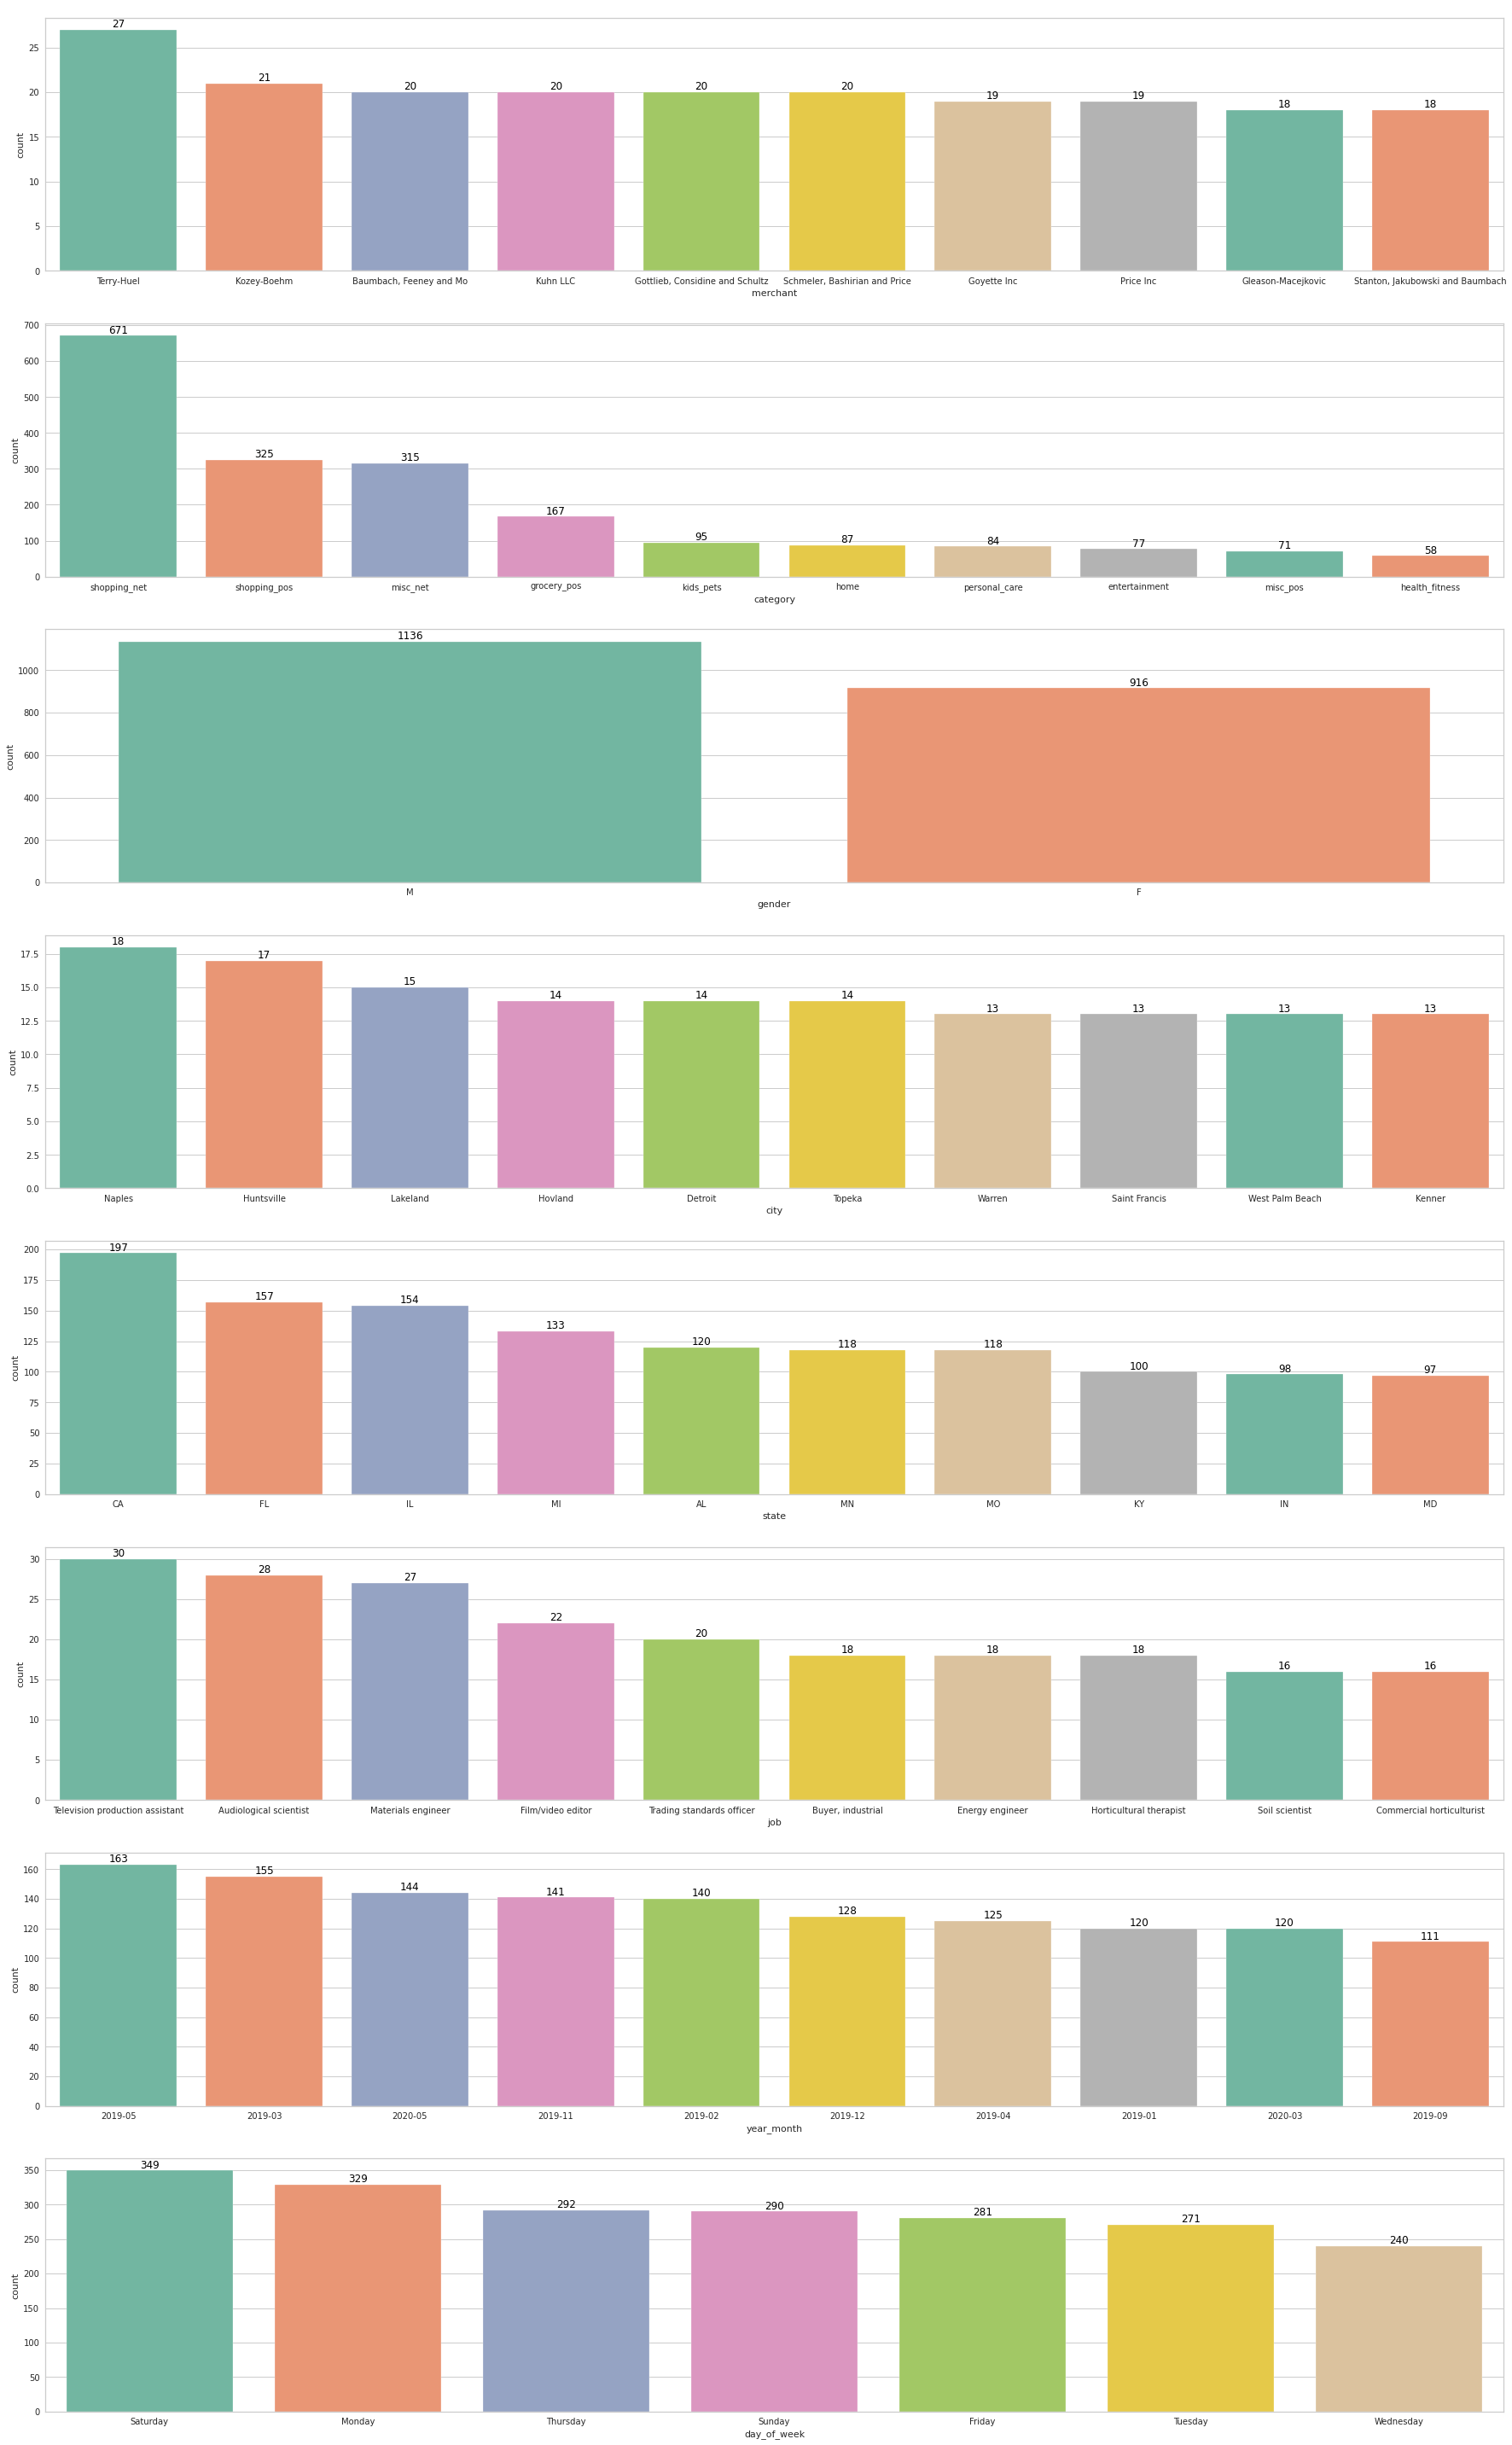

In [87]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] == 1]  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

In [88]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns  if col not in ['cluster']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] ==  1]  # Lọc dữ liệu cho cụm hiện tại
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

## Nhóm giao dịch gian lận (Cluster 2) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại "shopping_net".
- **Giới tính:** Nam chiếm tỉ lệ cao hơn Nữ trong giao dịch gian lận, với 1136 giao dịch so với 916 giao dịch của Nữ.
- **Thành phố gian lận cao nhất:** Naples được xác định là thành phố với số lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:** CA, FL và IL là 3 bang có số lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:** Television production assistant, Audiological scientist, Materials engineer.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào các năm như 2019 - 5, 2019 - 03, 2020 - 05.
- **Ngày gian lận:** Phân phối tập trung vào Thứ 7, Thứ 2 và Thứ 5

### Nhận xét
- **Số tiền giao dịch gian lận thường tập trung ở số tiền lớn, có sự phân bố tập trung ở giao dịch nhỏ 0-50 rời rạc dần và tập trung mật độ ở 900-950.**
  - Avg: 651.49
  - Median: 807.53
  - Min: 1.06
  - Max: 1376.04
  - Q1 (25th percentile): 286.23
  - Q3 (75th percentile): 963.00
  - 5th percentile: 11.08
  - 95th percentile: 1112.10
  - Upper Threshold: 1978.16

- **Dân số thành phố (city_pop) thường ở mức trung bình đến thấp.**
  - Avg: 82644.09
  - Median: 2566.00
  - Min: 37.00
  - Max: 2383912.00
  - Q1 (25th percentile): 660.50
  - Q3 (75th percentile): 31515.00
  - 5th percentile: 137.00
  - 95th percentile: 525713.00
  - Upper Threshold: 77796.75

- **Giờ giao dịch chủ yếu vào 22-23 giờ.**
  - Avg: 21.48
  - Median: 22.00
  - Min: 11.00
  - Max: 23.00
  - Q1 (25th percentile): 22.00
  - Q3 (75th percentile): 23.00
  - 5th percentile: 15.00
  - 95th percentile: 23.00
  - Lower Threshold: 20.50

- **Phần lớn người thực hiện giao dịch gian lận có độ tuổi từ 35 đến 62, với đỉnh cao tập trung ở khoảng 52 - 57 tuổi.**
  - Avg: 50.40
  - Median: 51.00
  - Min: 14.00
  - Max: 93.00
  - Q1 (25th percentile): 35.00
  - Q3 (75th percentile): 62.00
  - 5th percentile: 21.00
  - 95th percentile: 85.00
  - Upper Threshold: 102.50

- **Khoảng cách giữa khách hàng và người bán hàng tương đối.**
  - Avg: 75.94
  - Median: 76.70
  - Min: 3.60
  - Max: 140.03
  - Q1 (25th percentile): 55.37
  - Q3 (75th percentile): 98.83
  - 5th percentile: 25.87
  - 95th percentile: 119.53
  - Upper Threshold: 164.00


In [89]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi số tiền từ amt_a đến amt_b
amt_a = 286.23  # Số tiền amt_a
amt_b = 963.00  # Số tiền amt_b
amt_range, percentages_amt_range = amount_percentage_amt_range(merged_data2, amt_a, amt_b)

# In ra tổng số tiền và phần trăm số tiền cho từng nhóm trong phạm vi số tiền từ amt_a đến amt_b
print(f"Tổng số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(amt_range)

print(f"\nPhần trăm số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(percentages_amt_range)

Tổng số tiền từ 286.23 đến 963.0 cho từng nhóm:
cluster2
0.1   360702.790
0.2    57917.090
1     756374.320
2.1   307542.960
2.2    48561.570
3     929685.440
Name: amt, dtype: float64

Phần trăm số tiền từ 286.23 đến 963.0 cho từng nhóm:
cluster2
0.1   88.944
0.2   42.010
1     56.579
2.1   89.753
2.2   39.323
3     56.630
Name: amt, dtype: float64


In [90]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi dân số từ city_pop_a đến city_pop_b
city_pop_a = 660.50  # Dân số city_pop_a
city_pop_b = 31515  # Dân số city_pop_b
pop_range, percentages_pop_range = population_percentage_range(merged_data2, city_pop_a, city_pop_b)

# In ra tổng dân số và phần trăm dân số cho từng nhóm trong phạm vi dân số từ city_pop_a đến city_pop_b
print(f"Tổng dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(pop_range)

print(f"\nPhần trăm dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(percentages_pop_range)

Tổng dân số từ 660.5 đến 31515 cho từng nhóm:
cluster2
0.1     839
0.2      65
1      1029
2.1     604
2.2      68
3      1487
dtype: int64

Phần trăm dân số từ 660.5 đến 31515 cho từng nhóm:
cluster2
0.1   58.960
0.2   46.763
1     50.146
2.1   49.026
2.2   54.400
3     58.659
dtype: float64


In [91]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi tuổi từ a đến b
age_a = 35  # Tuổi a
age_b = 62  # Tuổi b
transactions, percentages = transactions_percentage_age_range(merged_data2, age_a, age_b)

# In ra số lượng giao dịch và phần trăm cho từng nhóm trong phạm vi tuổi từ a đến b
print(f"Số lượng giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(transactions)

print(f"\nPhần trăm giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(percentages)

Số lượng giao dịch từ 35 đến 62 tuổi cho từng nhóm:
cluster2
0.1     684
0.2      70
1      1078
2.1     598
2.2      61
3      1190
dtype: int64

Phần trăm giao dịch từ 35 đến 62 tuổi cho từng nhóm:
cluster2
0.1   48.067
0.2   50.360
1     52.534
2.1   48.539
2.2   48.800
3     46.943
dtype: float64


## Cluster 3

### Cluster 3.1 ( ~ Outlier )

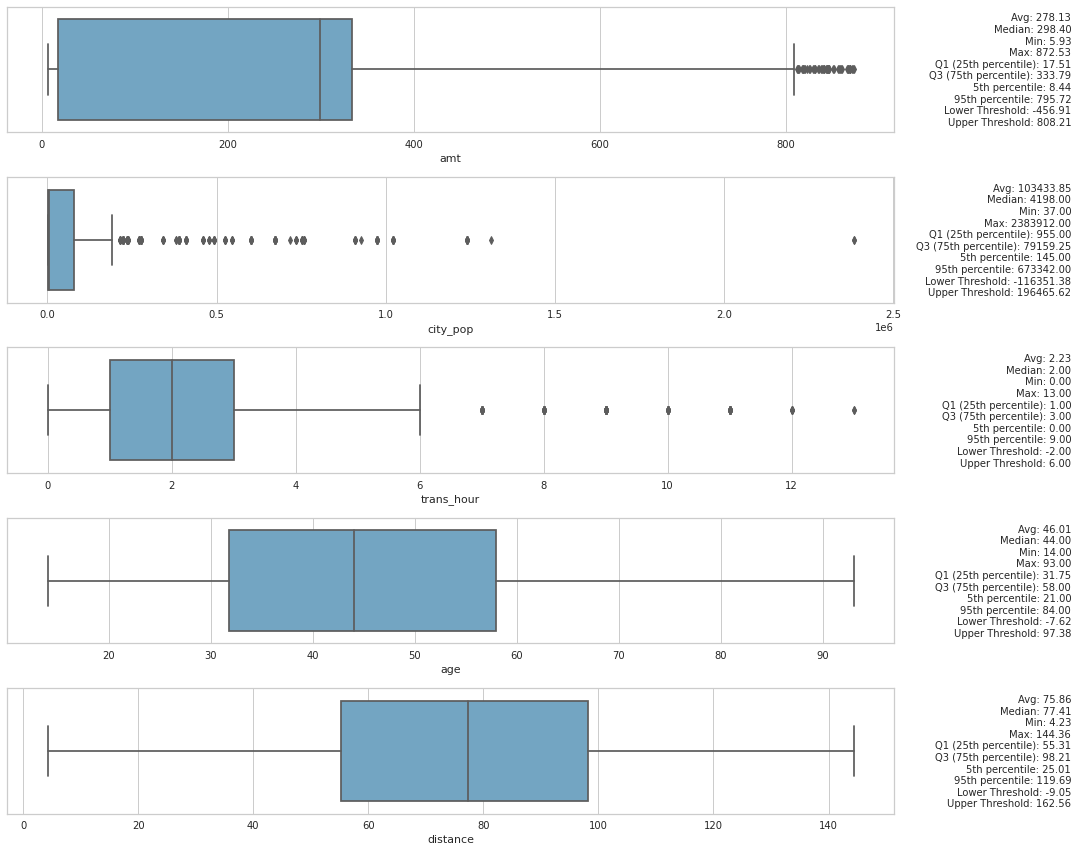

In [92]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '2.1']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'PuBuGn')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [93]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

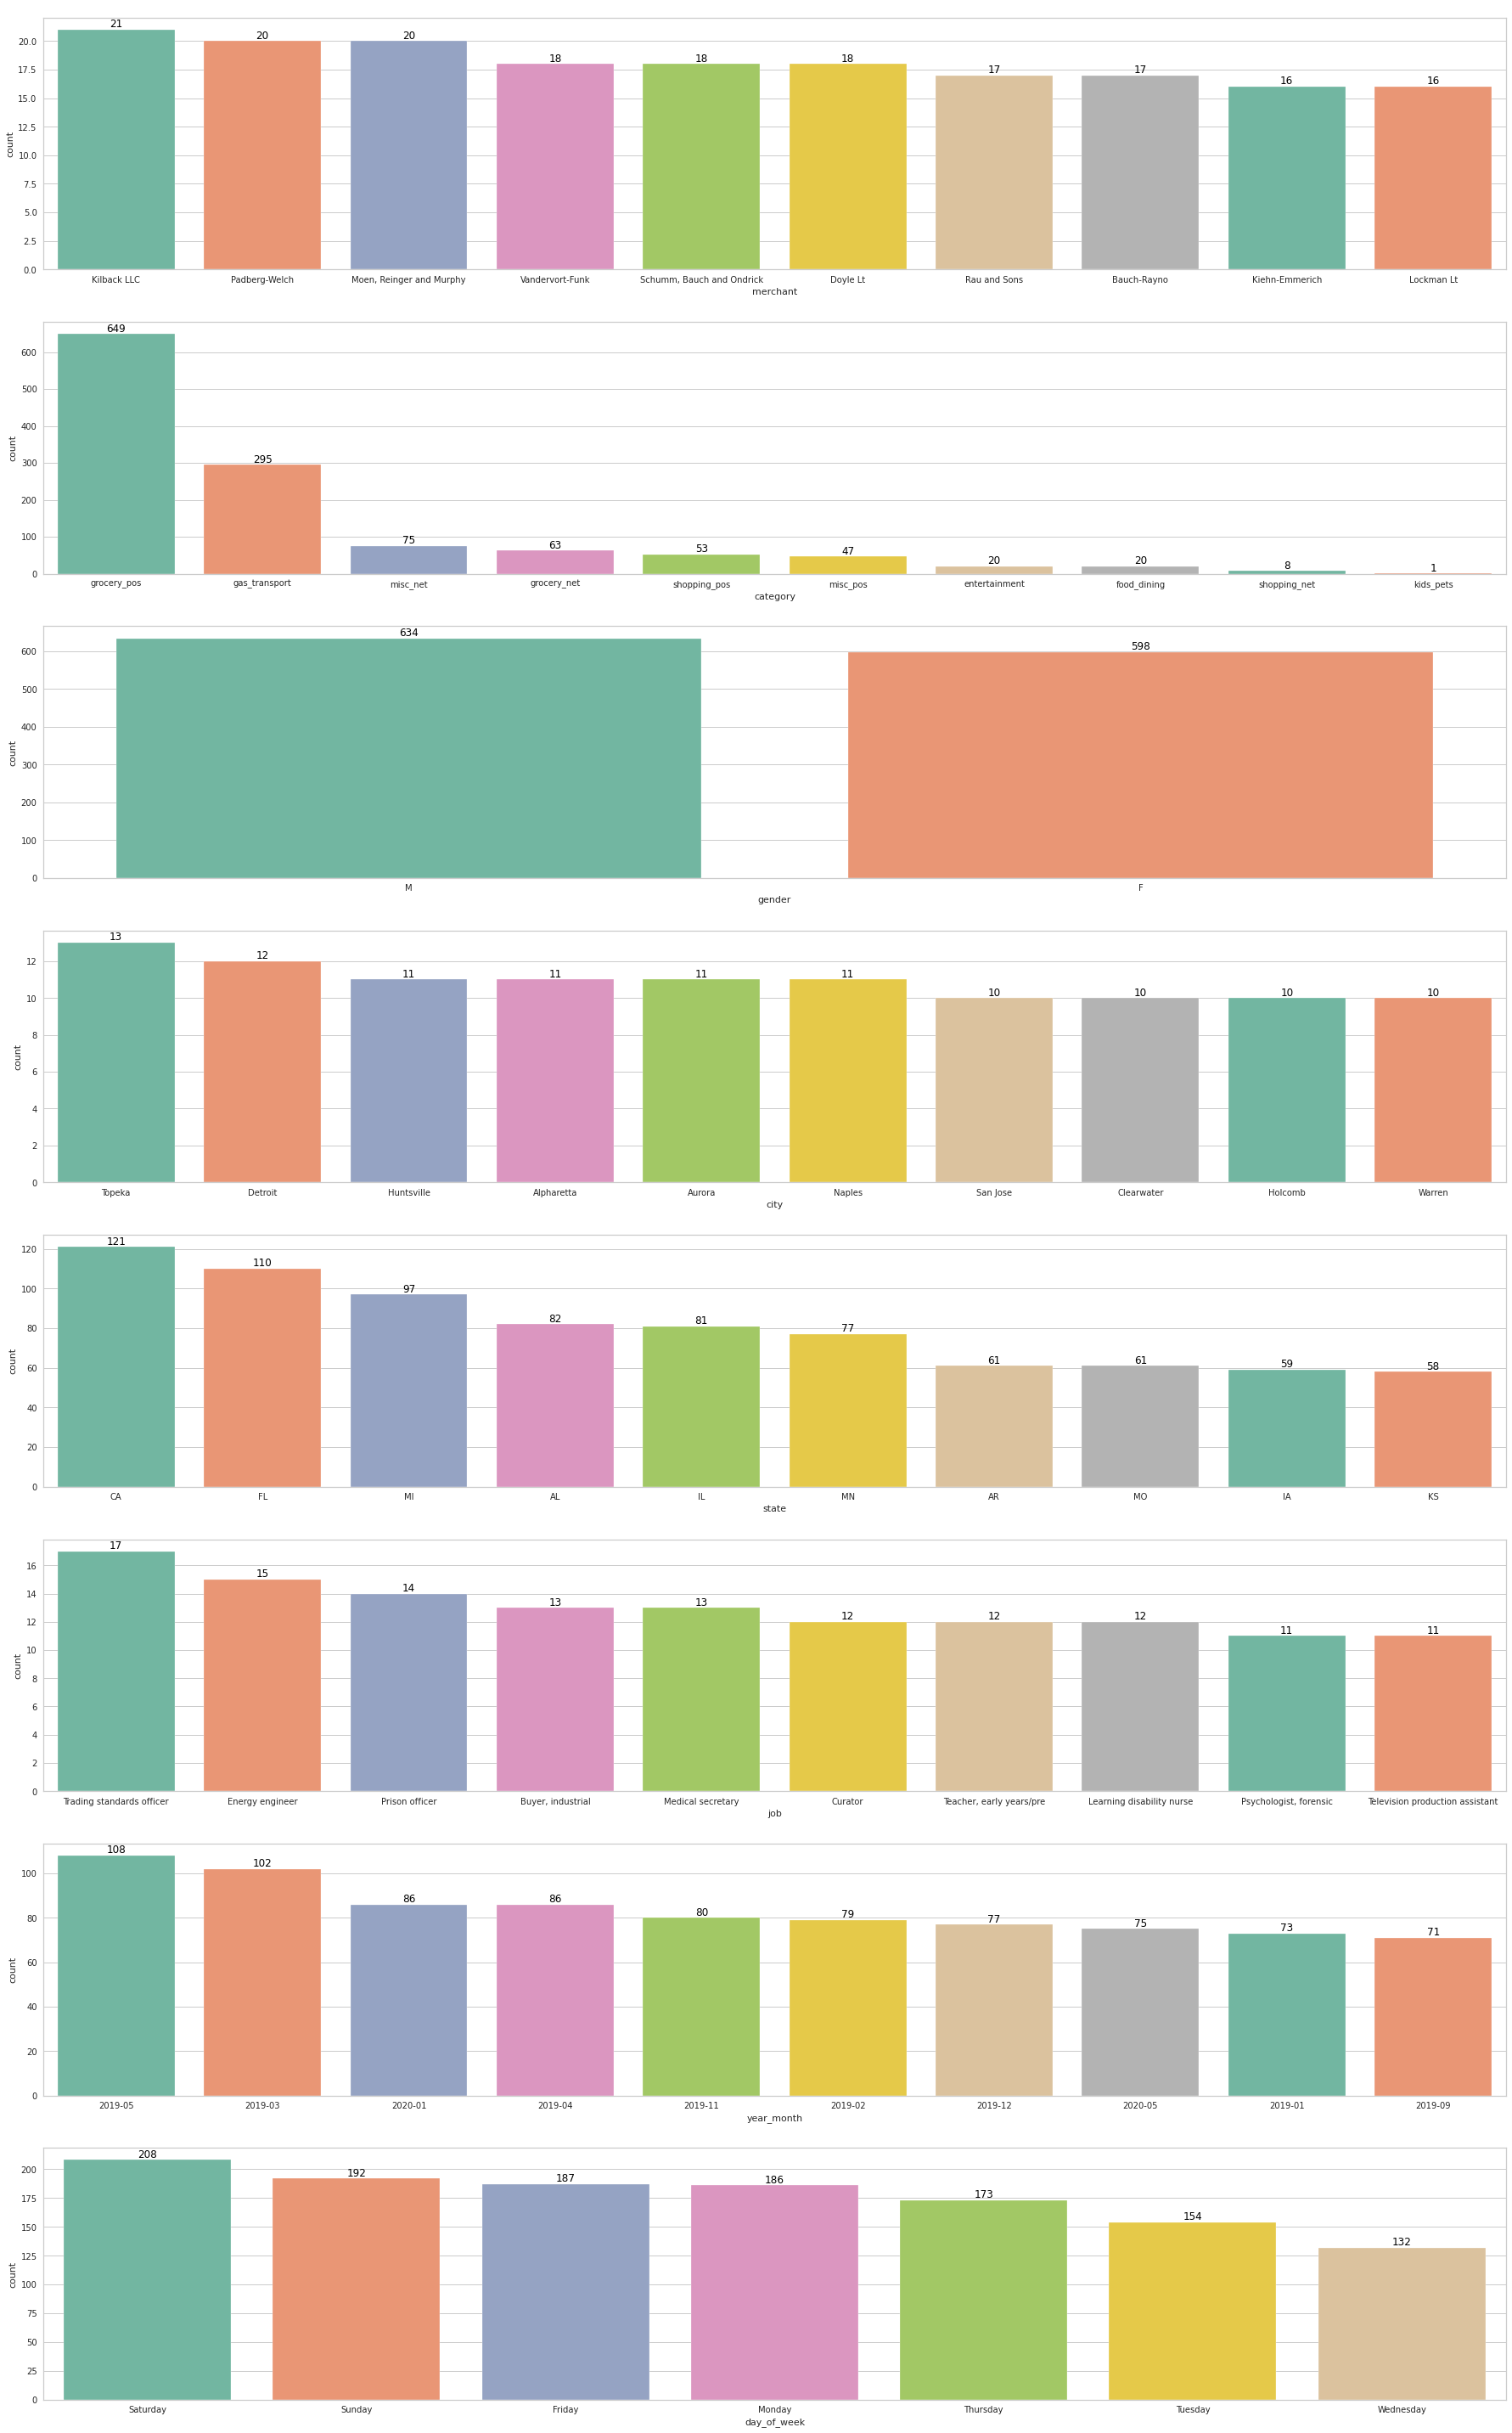

In [94]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns if feature not in ['cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '2.1']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

## Nhóm giao dịch gian lận (Cluster 3.1) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại "grocery_pos".
- **Giới tính:** Nam chiếm tỉ lệ cao hơn Nữ trong giao dịch gian lận, với 634 giao dịch so với 588 giao dịch của Nữ.
- **Thành phố gian lận cao nhất:** Topeka và Detroit được xác định là thành phố với lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:** CA, FL và MI là top 3 bang có lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:** Trading standards officer, Energy engineer, Prison officer.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào các năm như 2019 - 5, 2019 - 03, 2020 - 1.
- **Ngày gian lận:** Tập trung vào Thứ 7, Chủ Nhật và Thứ 6.

### Nhận xét
- **Số tiền giao dịch gian lận thường tập trung ở mức thấp với phân bố tập trung ở giao dịch nhỏ và giao dịch lớn rời rạc dần ở mức trung và cao.**
  - Avg: 278.13
  - Median: 298.40
  - Min: 5.93
  - Max: 872.53
  - Q1 (25th percentile): 17.51
  - Q3 (75th percentile): 333.79
  - 5th percentile: 8.44
  - 95th percentile: 795.72
  - Upper Threshold: 808.21

- **Dân số thành phố (city_pop) thường ở mức trung bình.**
  - Avg: 103433.85
  - Median: 4198.00
  - Min: 37.00
  - Max: 2383912.00
  - Q1 (25th percentile): 955.00
  - Q3 (75th percentile): 79159.25
  - 5th percentile: 145.00
  - 95th percentile: 673342.00
  - Upper Threshold: 196465.62

- **Giờ giao dịch chủ yếu nửa đêm từ 0 giờ trở đi đến 3 giờ.**
  - Avg: 2.23
  - Median: 2.00
  - Min: 0.00
  - Max: 13.00
  - Q1 (25th percentile): 1.00
  - Q3 (75th percentile): 3.00
  - 5th percentile: 0.00
  - 95th percentile: 9.00
  - Upper Threshold: 6.00

- **Độ tuổi từ 31 đến 58, với đỉnh cao ở khoảng 30 - 34 tuổi. Giao dịch chủ yếu từ những người trung niên.**
  - Avg: 46.01
  - Median: 44.00
  - Min: 14.00
  - Max: 93.00
  - Q1 (25th percentile): 31.75
  - Q3 (75th percentile): 58.00
  - 5th percentile: 21.00
  - 95th percentile: 84.00
  - Upper Threshold: 97.38

- **Khoảng cách giữa khách hàng và người bán hàng tương đối, mật độ cao chủ yếu 75-80 Km.**
  - Avg: 75.86
  - Median: 77.41
  - Min: 4.23
  - Max: 144.36
  - Q1 (25th percentile): 55.31
  - Q3 (75th percentile): 98.21
  - 5th percentile: 25.01
  - 95th percentile: 119.69
  - Upper Threshold: 162.56


In [95]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi số tiền từ amt_a đến amt_b
amt_a = 17.51 # Số tiền amt_a
amt_b = 333.79  # Số tiền amt_b
amt_range, percentages_amt_range = amount_percentage_amt_range(merged_data2, amt_a, amt_b)

# In ra tổng số tiền và phần trăm số tiền cho từng nhóm trong phạm vi số tiền từ amt_a đến amt_b
print(f"Tổng số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(amt_range)

print(f"\nPhần trăm số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(percentages_amt_range)

Tổng số tiền từ 17.51 đến 333.79 cho từng nhóm:
cluster2
0.1   185046.390
1      75087.850
2.1   161203.180
3      81476.760
Name: amt, dtype: float64

Phần trăm số tiền từ 17.51 đến 333.79 cho từng nhóm:
cluster2
0.1   45.630
0.2      NaN
1      5.617
2.1   47.045
2.2      NaN
3      4.963
Name: amt, dtype: float64


In [96]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi dân số từ city_pop_a đến city_pop_b
city_pop_a = 955  # Dân số city_pop_a
city_pop_b = 79159.25  # Dân số city_pop_b
pop_range, percentages_pop_range = population_percentage_range(merged_data2, city_pop_a, city_pop_b)

# In ra tổng dân số và phần trăm dân số cho từng nhóm trong phạm vi dân số từ city_pop_a đến city_pop_b
print(f"Tổng dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(pop_range)

print(f"\nPhần trăm dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(percentages_pop_range)

Tổng dân số từ 955 đến 79159.25 cho từng nhóm:
cluster2
0.1     803
0.2      60
1      1023
2.1     616
2.2      71
3      1428
dtype: int64

Phần trăm dân số từ 955 đến 79159.25 cho từng nhóm:
cluster2
0.1   56.430
0.2   43.165
1     49.854
2.1   50.000
2.2   56.800
3     56.331
dtype: float64


In [97]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi tuổi từ a đến b
age_a = 32  # Tuổi a
age_b = 58  # Tuổi b
transactions, percentages = transactions_percentage_age_range(merged_data2, age_a, age_b)

# In ra số lượng giao dịch và phần trăm cho từng nhóm trong phạm vi tuổi từ a đến b
print(f"Số lượng giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(transactions)

print(f"\nPhần trăm giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(percentages)

Số lượng giao dịch từ 32 đến 58 tuổi cho từng nhóm:
cluster2
0.1     698
0.2      81
1      1041
2.1     637
2.2      88
3      1154
dtype: int64

Phần trăm giao dịch từ 32 đến 58 tuổi cho từng nhóm:
cluster2
0.1   49.051
0.2   58.273
1     50.731
2.1   51.705
2.2   70.400
3     45.523
dtype: float64


### Cluster 3.2 ( Outlier )

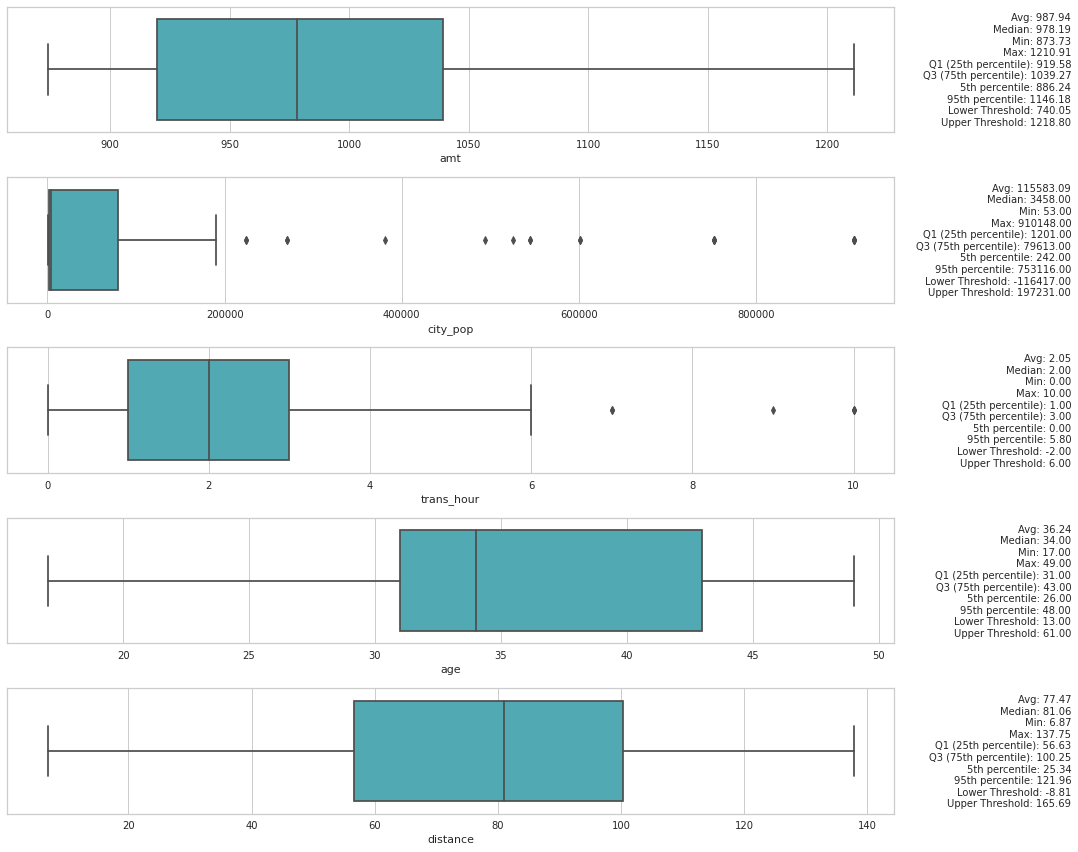

In [98]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '2.2']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'YlGnBu')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [99]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

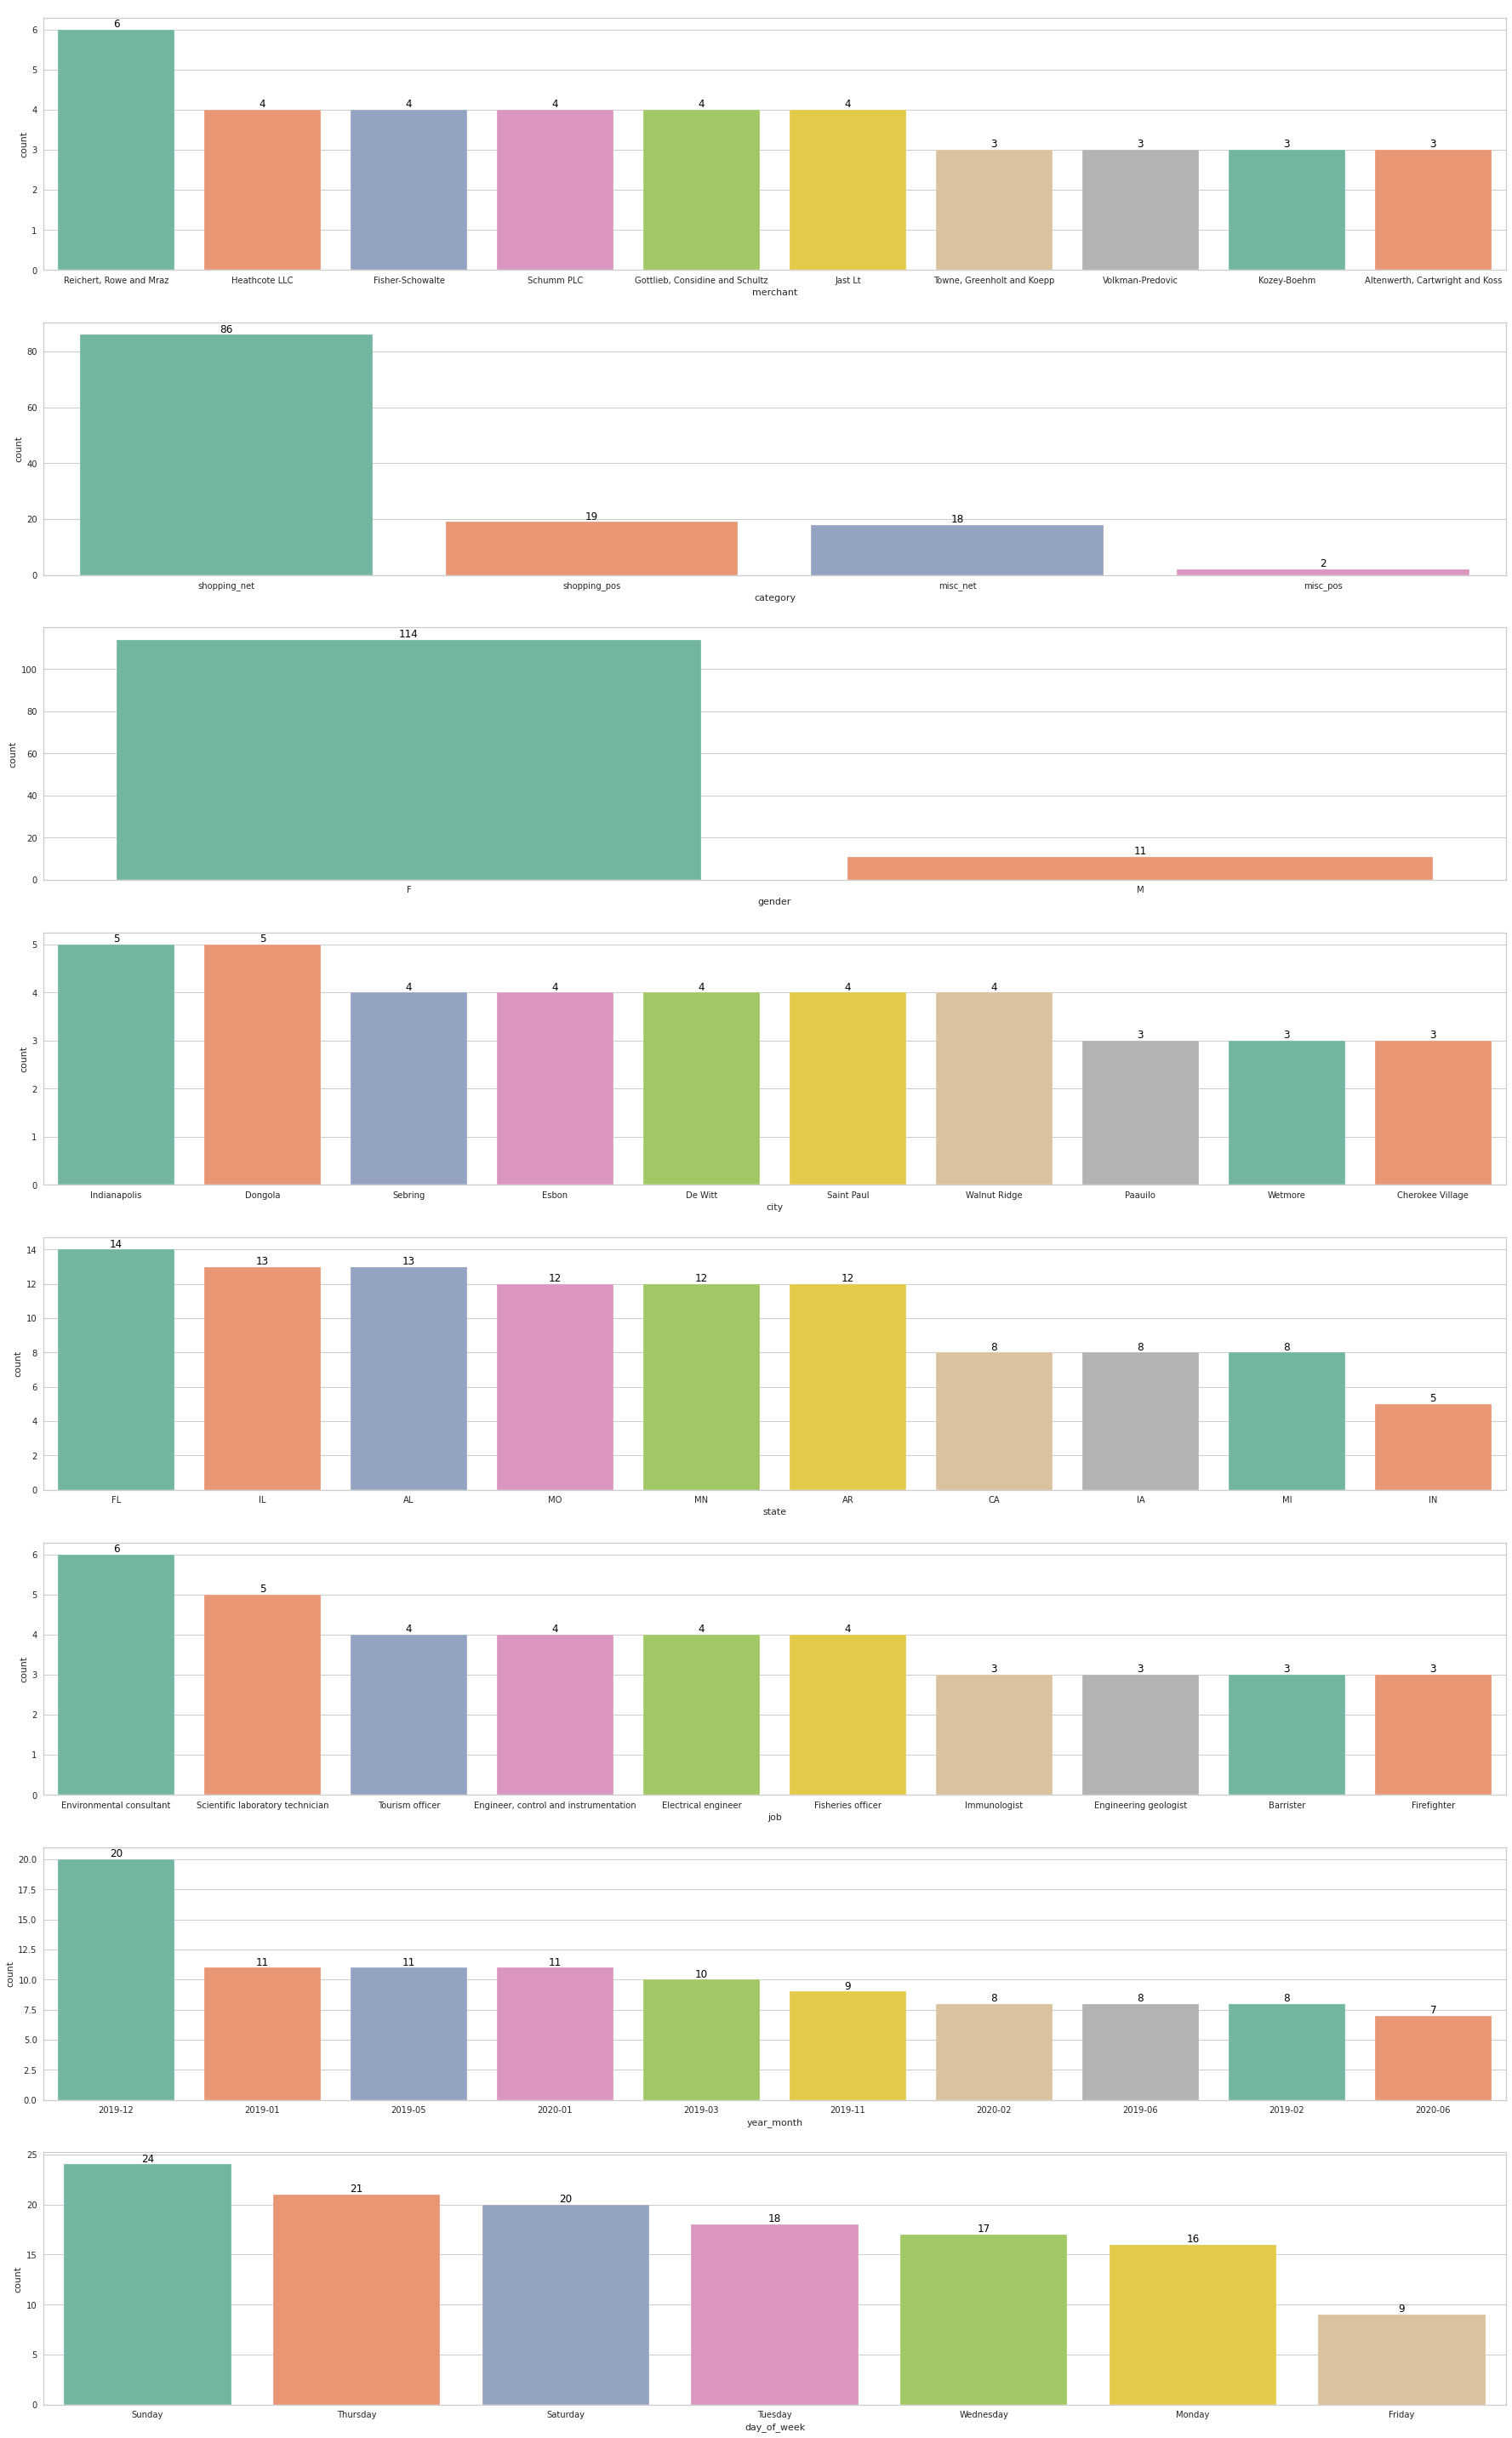

In [100]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns if feature not in ['cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '2.2']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

## Nhóm giao dịch gian lận (Cluster 3.2) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại "shopping_net".
- **Giới tính:** Nữ chiếm đa số trong giao dịch gian lận, với 114 giao dịch so với 11 giao dịch của Nam.
- **Thành phố gian lận cao nhất:** Indianapolis và Dongola được xác định là thành phố với lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:** FL, IL và AL là top 3 bang có lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:** Environmental consultant, Scientific laboratory technician, Tourism officer.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào: 2019 - 12, 2019 - 1, 2019 - 5.
- **Ngày gian lận:** Tập trung vào Chủ Nhật, Thứ 5 và Thứ 7.

### Nhận xét
- **Số tiền giao dịch gian lận tập trung ở mức cao.**
  - Avg: 987.94
  - Median: 978.19
  - Min: 873.73
  - Max: 1210.91
  - Q1 (25th percentile): 919.58
  - Q3 (75th percentile): 1039.27
  - 5th percentile: 886.24
  - 95th percentile: 1146.18
  - Lower Threshold: 740.05
  - Upper Threshold: 1218.80

- **Dân số thành phố (city_pop) thường ở mức trung bình đến cao.**
  - Avg: 115583.09
  - Median: 3458.00
  - Min: 53.00
  - Max: 910148.00
  - Q1 (25th percentile): 1201.00
  - Q3 (75th percentile): 79613.00
  - 5th percentile: 242.00
  - 95th percentile: 753116.00
  - Upper Threshold: 197231.00

- **Giờ giao dịch chủ yếu từ nửa đêm đến sáng sớm (0 giờ đến 3 giờ sáng).**
  - Avg: 2.05
  - Median: 2.00
  - Min: 0.00
  - Max: 10.00
  - Q1 (25th percentile): 1.00
  - Q3 (75th percentile): 3.00
  - 5th percentile: 0.00
  - 95th percentile: 5.80
  - Upper Threshold: 6.00

- **Phần lớn người thực hiện giao dịch gian lận có độ tuổi từ 31 đến 43, với 2 đỉnh cao mật độ ở khoảng 32 và 45 tuổi. Giao dịch chủ yếu từ những người trung niên.**
  - Avg: 36.24
  - Median: 34.00
  - Min: 17.00
  - Max: 49.00
  - Q1 (25th percentile): 31.00
  - Q3 (75th percentile): 43.00
  - 5th percentile: 26.00
  - 95th percentile: 48.00
  - Lower Threshold: 13.00
  - Upper Threshold: 61.00

- **Khoảng cách giữa khách hàng và người bán hàng tương đối, mật độ cao chủ yếu 70-100 Km.**
  - Avg: 77.47
  - Median: 81.06
  - Min: 6.87
  - Max: 137.75
  - Q1 (25th percentile): 56.63
  - Q3 (75th percentile): 100.25
  - 5th percentile: 25.34
  - 95th percentile: 121.96
  - Upper Threshold: 165.69


In [101]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi số tiền từ amt_a đến amt_b
amt_a = 919.58  # Số tiền amt_a
amt_b = 1039.27 # Số tiền amt_b
amt_range, percentages_amt_range = amount_percentage_amt_range(merged_data2, amt_a, amt_b)

# In ra tổng số tiền và phần trăm số tiền cho từng nhóm trong phạm vi số tiền từ amt_a đến amt_b
print(f"Tổng số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(amt_range)

print(f"\nPhần trăm số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(percentages_amt_range)

Tổng số tiền từ 919.58 đến 1039.27 cho từng nhóm:
cluster2
0.2    69617.080
1     412843.360
2.2    61595.760
3     475111.690
Name: amt, dtype: float64

Phần trăm số tiền từ 919.58 đến 1039.27 cho từng nhóm:
cluster2
0.1      NaN
0.2   50.497
1     30.882
2.1      NaN
2.2   49.878
3     28.941
Name: amt, dtype: float64


In [102]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi dân số từ city_pop_a đến city_pop_b
city_pop_a = 1201  # Dân số city_pop_a
city_pop_b = 79613  # Dân số city_pop_b
pop_range, percentages_pop_range = population_percentage_range(merged_data2, city_pop_a, city_pop_b)

# In ra tổng dân số và phần trăm dân số cho từng nhóm trong phạm vi dân số từ city_pop_a đến city_pop_b
print(f"Tổng dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(pop_range)

print(f"\nPhần trăm dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(percentages_pop_range)

Tổng dân số từ 1201 đến 79613 cho từng nhóm:
cluster2
0.1     776
0.2      59
1       924
2.1     556
2.2      65
3      1354
dtype: int64

Phần trăm dân số từ 1201 đến 79613 cho từng nhóm:
cluster2
0.1   54.533
0.2   42.446
1     45.029
2.1   45.130
2.2   52.000
3     53.412
dtype: float64


In [103]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi tuổi từ a đến b
age_a = 31  # Tuổi a
age_b = 43  # Tuổi b
transactions, percentages = transactions_percentage_age_range(merged_data2, age_a, age_b)

# In ra số lượng giao dịch và phần trăm cho từng nhóm trong phạm vi tuổi từ a đến b
print(f"Số lượng giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(transactions)

print(f"\nPhần trăm giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(percentages)

Số lượng giao dịch từ 31 đến 43 tuổi cho từng nhóm:
cluster2
0.1    304
0.2     47
1      414
2.1    327
2.2     63
3      468
dtype: int64

Phần trăm giao dịch từ 31 đến 43 tuổi cho từng nhóm:
cluster2
0.1   21.363
0.2   33.813
1     20.175
2.1   26.542
2.2   50.400
3     18.462
dtype: float64


## Cluster 4

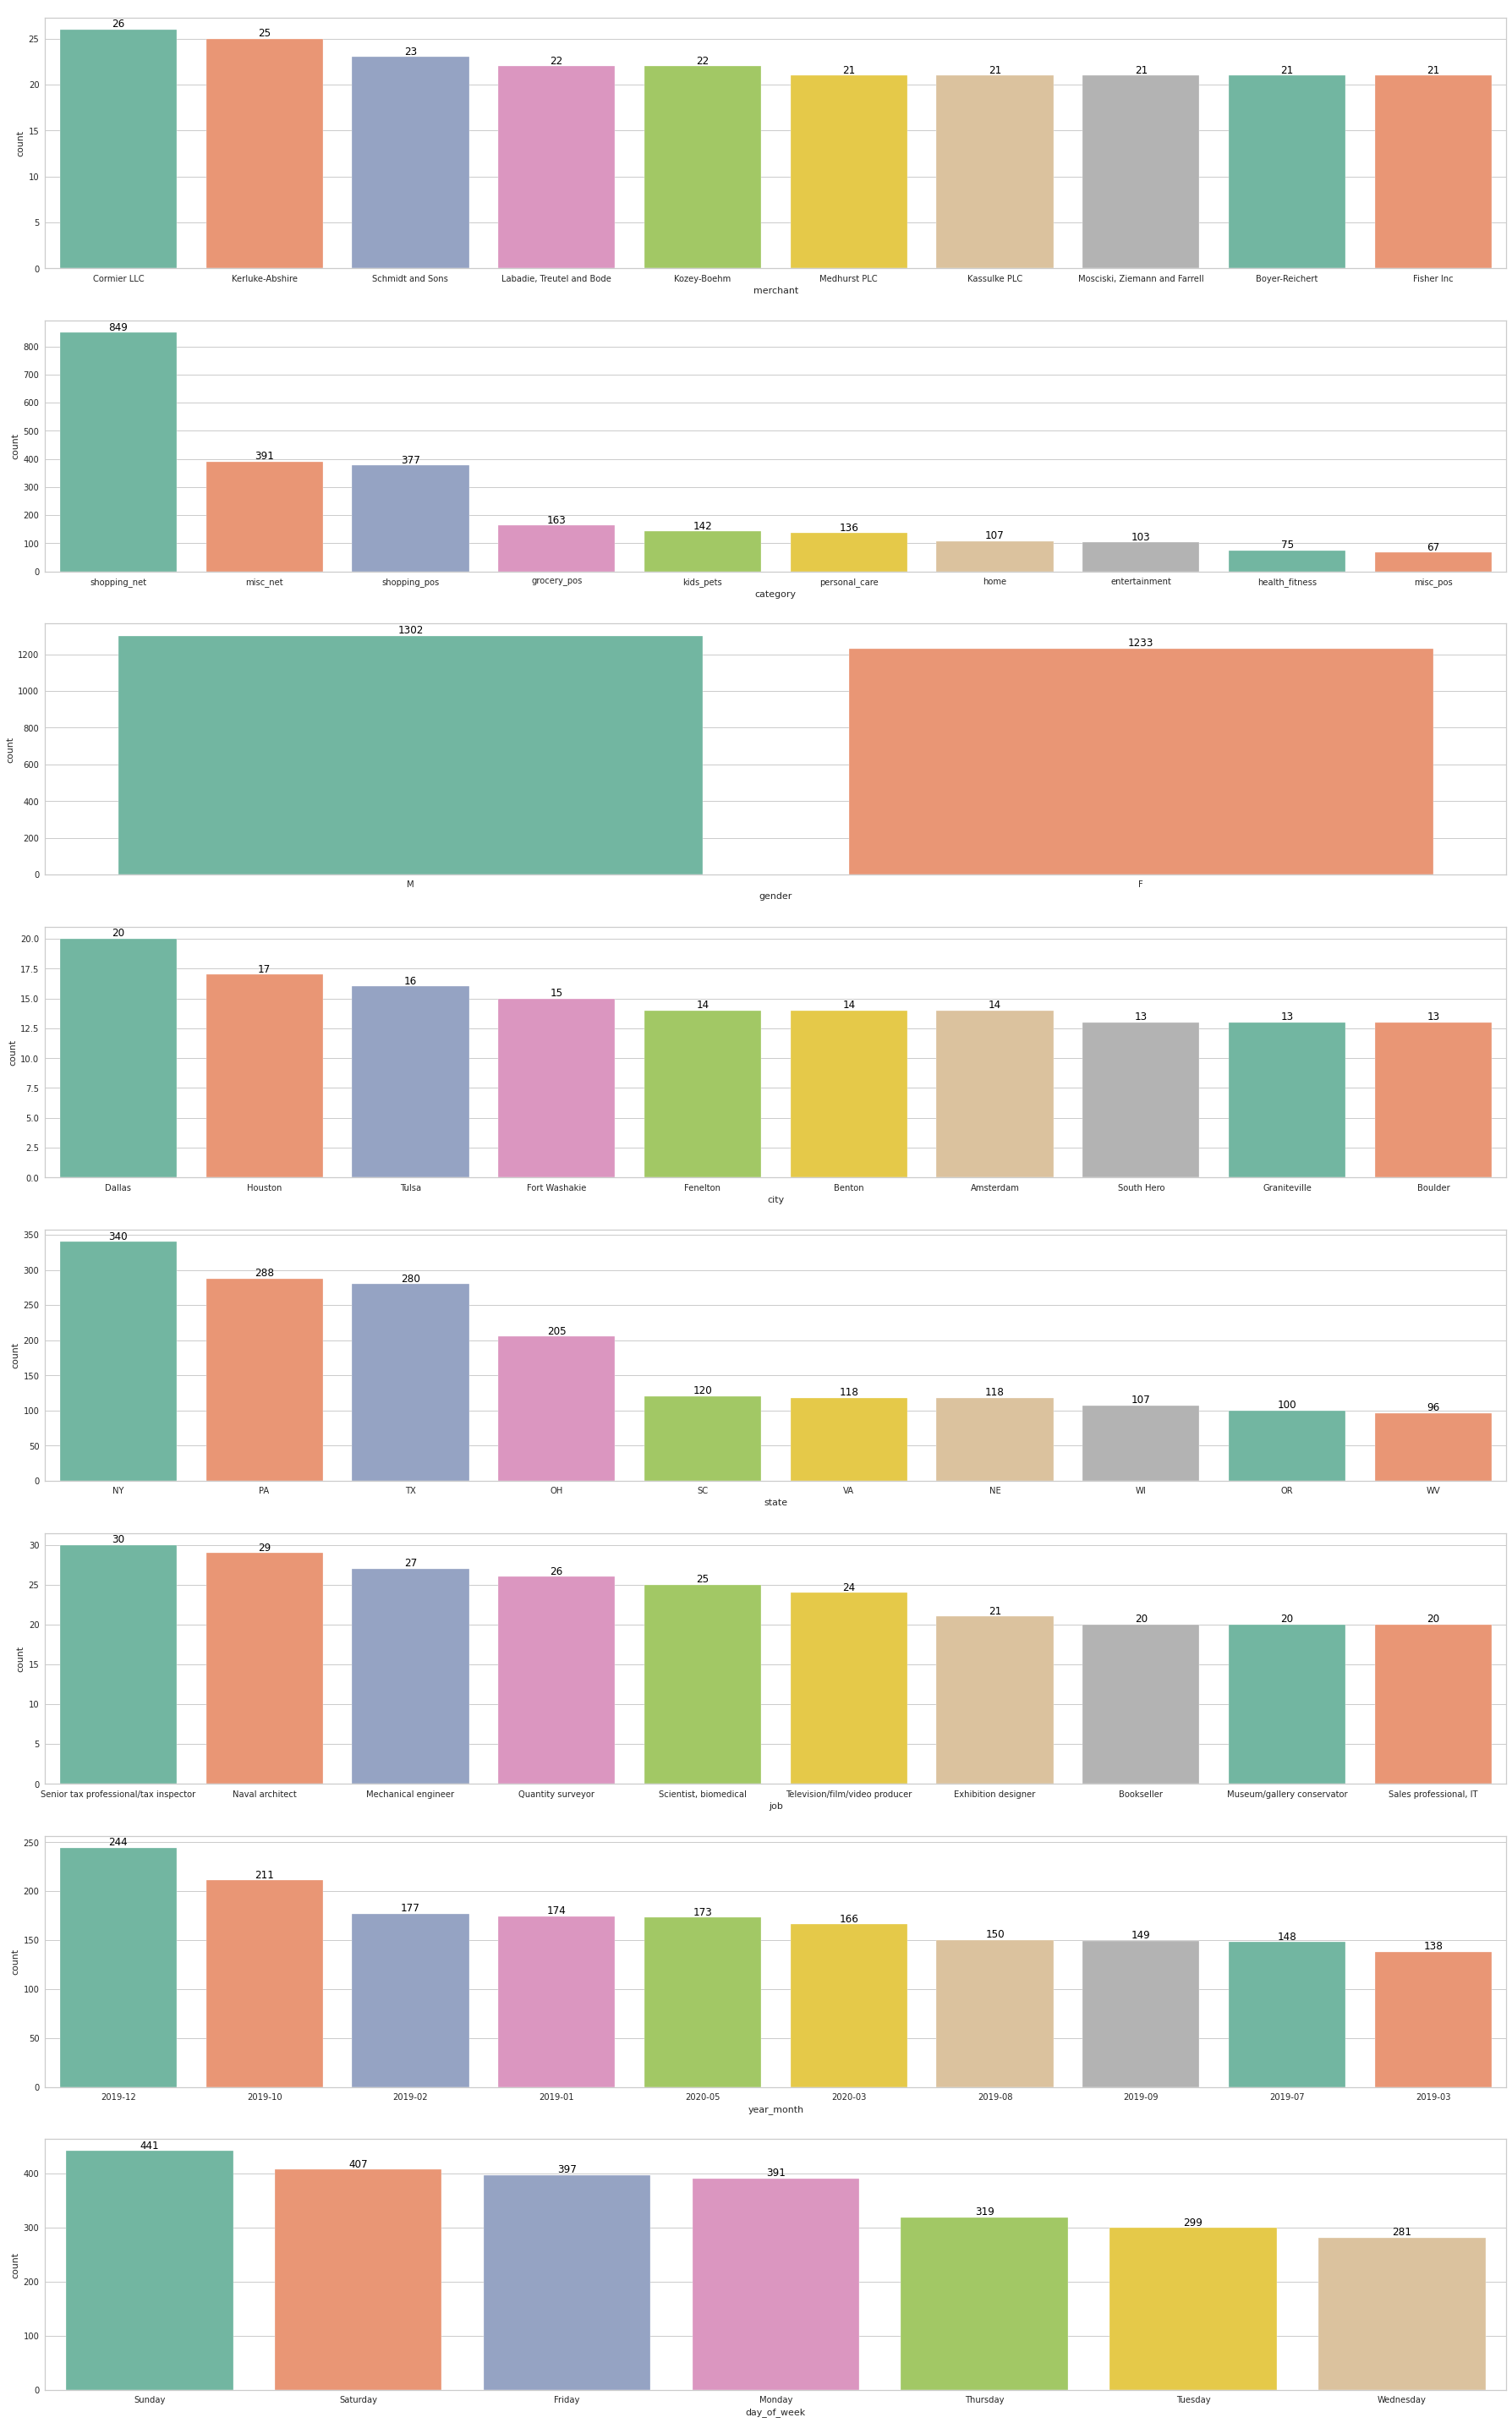

In [104]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] == 3]  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

In [105]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns  if col not in ['cluster']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] ==  3]  # Lọc dữ liệu cho cụm hiện tại
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

## Nhóm giao dịch gian lận (Cluster 4) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại "shopping_net".
- **Giới tính:** Nam chiếm tỉ lệ cao hơn Nữ trong giao dịch gian lận, với 1302 giao dịch so với 1233 giao dịch của Nữ.
- **Thành phố gian lận cao nhất:** Dallas được xác định là thành phố với lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:** NY, PA và TX là top 3 bang có lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:** Senior tax professional/tax inspector, Naval architect, Materials engineer.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào các năm như 2019 - 12, 2019 - 05, 2019 - 02.
- **Ngày gian lận:** Phân phối tập trung vào Chủ Nhật, Thứ 7 và Thứ 6

### Nhận xét
- **Số tiền giao dịch gian lận thường tập trung ở mức thấp và cao với phân bố tập trung ở giao dịch nhỏ 0-50 và giao dịch lớn 900-950.** 
  - Avg: 647.61
  - Median: 809.64
  - Min: 1.18
  - Max: 1371.81
  - Q1 (25th percentile): 269.44
  - Q3 (75th percentile): 962.23
  - 5th percentile: 11.53
  - 95th percentile: 1116.65
  - Upper Threshold: 2001.43

- **Dân số thành phố (city_pop) thường ở mức trung bình đến cao.**
  - Avg: 89846.79
  - Median: 2208.00
  - Min: 23.00
  - Max: 2906700.00
  - Q1 (25th percentile): 686.00
  - Q3 (75th percentile): 13717.00
  - 5th percentile: 121.00
  - 95th percentile: 413574.00
  - Lower Threshold: -18860.50
  - Upper Threshold: 33263.50

- **Giờ giao dịch chủ yếu từ nửa đêm tập trung 22 giờ và 23 giờ.**
  - Avg: 21.54
  - Median: 22.00
  - Min: 11.00
  - Max: 23.00
  - Q1 (25th percentile): 22.00
  - Q3 (75th percentile): 23.00
  - 5th percentile: 15.00
  - 95th percentile: 23.00
  - Lower Threshold: 20.50
  - Upper Threshold: 24.50

- **Phần lớn người thực hiện giao dịch gian lận có độ tuổi rời rạc từ 20 đến 90 tập trung cao 33-63 tuổi, với đỉnh cao tập trung xung quanh ở khoảng 30 tuổi và 55 tuổi. Nhóm có độ tuổi đa dạng**
  - Avg: 50.22
  - Median: 49.00
  - Min: 14.00
  - Max: 93.00
  - Q1 (25th percentile): 33.00
  - Q3 (75th percentile): 63.00
  - 5th percentile: 21.00
  - 95th percentile: 84.00
  - Upper Threshold: 108.00

- **Khoảng cách giữa khách hàng và người bán hàng tương đối, mật độ cao ở 85 Km phân bố chủ yếu 80-90 Km.**
  - Avg: 77.37
  - Median: 79.86
  - Min: 0.74
  - Max: 142.64
  - Q1 (25th percentile): 57.55
  - Q3 (75th percentile): 99.52
  - 5th percentile: 26.13
  - 95th percentile: 121.11
  - Lower Threshold: -5.40
  - Upper Threshold: 162.47


In [106]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi số tiền từ amt_a đến amt_b
amt_a = 269.44  # Số tiền amt_a
amt_b = 962.23  # Số tiền amt_b
amt_range, percentages_amt_range = amount_percentage_amt_range(merged_data2, amt_a, amt_b)

# In ra tổng số tiền và phần trăm số tiền cho từng nhóm trong phạm vi số tiền từ amt_a đến amt_b
print(f"Tổng số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(amt_range)

print(f"\nPhần trăm số tiền từ {amt_a} đến {amt_b} cho từng nhóm:")
print(percentages_amt_range)

Tổng số tiền từ 269.44 đến 962.23 cho từng nhóm:
cluster2
0.1   389720.110
0.2    57917.090
1     765600.410
2.1   329327.960
2.2    48561.570
3     933337.130
Name: amt, dtype: float64

Phần trăm số tiền từ 269.44 đến 962.23 cho từng nhóm:
cluster2
0.1   96.100
0.2   42.010
1     57.269
2.1   96.111
2.2   39.323
3     56.852
Name: amt, dtype: float64


In [107]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi dân số từ city_pop_a đến city_pop_b
city_pop_a = 686  # Dân số city_pop_a
city_pop_b = 13717  # Dân số city_pop_b
pop_range, percentages_pop_range = population_percentage_range(merged_data2, city_pop_a, city_pop_b)

# In ra tổng dân số và phần trăm dân số cho từng nhóm trong phạm vi dân số từ city_pop_a đến city_pop_b
print(f"Tổng dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(pop_range)

print(f"\nPhần trăm dân số từ {city_pop_a} đến {city_pop_b} cho từng nhóm:")
print(percentages_pop_range)

Tổng dân số từ 686 đến 13717 cho từng nhóm:
cluster2
0.1     700
0.2      53
1       927
2.1     537
2.2      65
3      1277
dtype: int64

Phần trăm dân số từ 686 đến 13717 cho từng nhóm:
cluster2
0.1   49.192
0.2   38.129
1     45.175
2.1   43.588
2.2   52.000
3     50.375
dtype: float64


In [108]:
# Sử dụng hàm với DataFrame 'merged_data2' và phạm vi tuổi từ a đến b
age_a = 33  # Tuổi a
age_b = 63  # Tuổi b
transactions, percentages = transactions_percentage_age_range(merged_data2, age_a, age_b)

# In ra số lượng giao dịch và phần trăm cho từng nhóm trong phạm vi tuổi từ a đến b
print(f"Số lượng giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(transactions)

print(f"\nPhần trăm giao dịch từ {age_a} đến {age_b} tuổi cho từng nhóm:")
print(percentages)

Số lượng giao dịch từ 33 đến 63 tuổi cho từng nhóm:
cluster2
0.1     742
0.2      75
1      1201
2.1     687
2.2      80
3      1307
dtype: int64

Phần trăm giao dịch từ 33 đến 63 tuổi cho từng nhóm:
cluster2
0.1   52.143
0.2   53.957
1     58.528
2.1   55.763
2.2   64.000
3     51.558
dtype: float64


## Bảng

<table cellspacing="0" style="border-collapse: collapse;">
  <tbody>
    <tr>
      <td class="" style="width: 5.3696%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Cluster</td>
      <td class="" style="width: 11.2971%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Amt</td>
      <td class="" style="width: 9.20502%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">City_pop</td>
      <td class="" style="width: 10.251%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Hour</td>
      <td class="" style="width: 9.41423%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Age</td>
      <td class="" style="width: 11.2971%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">distance</td>
      <td class="" style="width: 8.22873%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Category</td>
      <td class="" style="width: 7.94979%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Gender</td>
      <td class="" style="width: 5.5788%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">City</td>
      <td class="" style="width: 2.64993%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">State</td>
      <td class="" style="width: 9.62343%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Job</td>
      <td class="" style="width: 9.13529%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Time</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">0.1</td>
      <td class="" style="width: 11.2971%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 284.99, 17.19 - 337.36: 193520.410 (47.72%),  <span style='color:red'>Under 100: 40199756(24.41%) ;100-200: 6521219(3.96%)</span></td>
      <td class="" style="width: 9.20502%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Median: 3285, Avg: 115754.18, 828-19803: 717(50.39%), <span style='color:red'>1M-2M: 40(2.81%)</span></td>
      <td class="" style="width: 10.251%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;"><span style='color:blue'>0-3: 1216(85.45%)</span>, <span style='color:red'>4-7: 108(7.59%), 8-11: 89(6.25%)</span></td>
      <td class="" style="width: 9.41423%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Agv: 46.28, 30-58: 750(52.706%), <span style='color:red'>15-24: 179(12.57%)</span>,  <span style='color:blue'>Under 15: 2(0.14%), 55-64: 189(13.28%)</span></td>
      <td class="" style="width: 11.2971%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 75.05, mật độ cao chủ yếu 80-90 , <span style='color:red'>0-50: 293(20.59%), 50-100: 839(58.96%)</span>, <span style='color:blue'>100+: 291(20.45%)</span></td>
      <td class="" style="width: 8.22873%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">"grocery_pos"</td>
      <td class="" style="width: 7.94979%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">F(748) &gt; M(675)</td>
      <td class="" style="width: 5.5788%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Houston</td>
      <td class="" style="width: 2.64993%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">NY, TX, PA</td>
      <td class="" style="width: 9.62343%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Exhibition designer, Copywriter advertising, Mechanical engineer.</td>
      <td class="" style="width: 9.13529%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">2020 - 5, 2019 - 01, 2019 - 12, Thứ 2, Chủ Nhật và Thứ 7.</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">0.2</td>
      <td class="" style="width: 11.2971%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 991.82, 925.72 - 1044.68: 401233.330(48.75%), <span style='color:red'>1K+: 7937106(30.28%)</span></td>
      <td class="" style="width: 9.20502%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Median: 1044.68, Avg: 188600.70, 498-18128: 72(51.8%), <span style='color:red'>2M+: 6(4.32%)</span> </td>
      <td class="" style="width: 10.251%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">0-3: 124(89.21%) </td>
      <td class="" style="width: 9.41423%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">28-45: 81(58.27%) , Agv: 35.27, <span style='color:red'>45-54: 38(27.34%)</span></td>
      <td class="" style="width: 11.2971%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 75.82, mật độ cao chủ yếu 70-80, <span style='color:blue'>0-50: 26(18.71%)</span></td>
      <td class="" style="width: 8.22873%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">F(128) &gt; M(13)</td>
      <td class="" style="width: 5.5788%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Shields và Housto</td>
      <td class="" style="width: 2.64993%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">TX, PA, NY</td>
      <td class="" style="width: 9.62343%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Film/video editor, Sales professional IT, Physiotherapist.</td>
      <td class="" style="width: 9.13529%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">2019 - 8, 2019 - 12, 2019 - 3,
Chủ Nhật.</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">1</td>
      <td class="" style="width: 11.2971%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 651.49, 286.23 - 963: 756374.320(56.58%) </td>
      <td class="" style="width: 9.20502%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Median: 2566, Avg: 82644.09, 660.50-31515: 1029(50.15%), <span style='color:blue'>1M-2M: 21(1.02%)</span></td>
      <td class="" style="width: 10.251%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;"><span style='color:blue'>22-23: 1699(82.79%)</span>, <span style='color:red'>12-15: 133(6.48%), 16-19: 149(7.26%), 20-21: 70(3.41%)</span></td>
      <td class="" style="width: 9.41423%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Agv: 50.40,  35-62: 1078(52.53%), <span style='color:blue'>25-34: 287(13.99%), 35-44: 281(13.69%)</span>, <span style='color:red'>55-64: 443(21.59%)</span></td>
      <td class="" style="width: 11.2971%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 75.94, mật độ cao chủ yếu 67.5-100</td>
      <td class="" style="width: 8.22873%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">F(916) &lt; M(1136)</td>
      <td class="" style="width: 5.5788%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Naples</td>
      <td class="" style="width: 2.64993%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">CA, FL, IL</td>
      <td class="" style="width: 9.62343%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Television production assistant, Audiological scientist, Materials engineer.</td>
      <td class="" style="width: 9.13529%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">2019 - 5, 2019 - 03, 2020 - 05, Thứ 7, Thứ 2 và Thứ 5</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">2.1</td>
      <td class="" style="width: 11.2971%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 278.13, 17.51 - 333.79: 161203.180(47.05%), <span style='color:red'>200-500: 78508076(61.61%)</span>, <span style='color:blue'>500-1000: 18166616(14.26%)</span></td>
      <td class="" style="width: 9.20502%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Median:  4198.00, Avg: 103433.85, 955-79159.25: 616(50%), <span style='color:blue'>Under 100k: 939(76.22%)</span>, <span style='color:red'>100k-500k :210(17.05%)</span>, <span style='color:blue'>2M+: 2(0.16%)</span></td>
      <td class="" style="width: 10.251%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">0-3: 1074(87.18%), <span style='color:blue'>4-7: 77(6.25%), 12-15: 7(0.57%)</span></td>
      <td class="" style="width: 9.41423%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Agv: 50.40;  32-58: 695(56.412%), <span style='color:blue'>45-54 :225(18.26%); 64+: 181(14.69%)</span></td>
      <td class="" style="width: 11.2971%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 75.86, mật độ cao chủ yếu 75-80</td>
      <td class="" style="width: 8.22873%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">"grocery_pos"</td>
      <td class="" style="width: 7.94979%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">F(588) &lt; M(634)</td>
      <td class="" style="width: 5.5788%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Topeka và Detroit</td>
      <td class="" style="width: 2.64993%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">CA, FL, MI</td>
      <td class="" style="width: 9.62343%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Trading standards officer, Energy engineer, Prison officer.</td>
      <td class="" style="width: 9.13529%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">2019 - 5, 2019 - 03, 2020 - 1, Thứ 7, Chủ Nhật và Thứ 6</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">2.2</td>
      <td class="" style="width: 11.2971%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 987.94, 919.58 - 1039.27: 61595.760(49.88%), <span style='color:red'>500-1000: 11816294(81.79%)</span>, <span style='color:blue'>1K+: 2631592(18.21%)</span></td>
      <td class="" style="width: 9.20502%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Median: 3458, Avg: 115583.09, 1201-79613: 65(52%), <span style='color:red'>500k-1M: 14(11.2%)</span></td>
      <td class="" style="color: rgb(255, 0, 0); width: 10.251%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">0-3: 113|90.4</td>
      <td class="" style="width: 9.41423%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Agv: 36.24,  31-43: 63(50.4%), <span style='color:blue'>15-24: 5(4%)</span>, <span style='color:red'>25-34: 59(47.2%), 35-44: 34(27.2%)</span></td>
      <td class="" style="width: 11.2971%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 77.47, mật độ cao chủ yếu 70-100, <span style='color:blue'>50-100: 68(54.4%)</span>, <span style='color:red'>100+:	32(25.6%)</span></td>
      <td class="" style="width: 8.22873%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">F(114) &gt; M(11) </td>
      <td class="" style="width: 5.5788%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Indianapolis và Dongola</td>
      <td class="" style="width: 2.64993%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">FL, IL, AL</td>
      <td class="" style="width: 9.62343%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Environmental consultant, Scientific laboratory technician, Tourism officer.</td>
      <td class="" style="width: 9.13529%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">2019 - 12, 2019 - 1, 2019 - 5, Chủ Nhật, Thứ 5 và Thứ 7.</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">3</td>
      <td class="" style="width: 11.2971%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 647.61, 269.44 - 962.23: 933337.130(56.85%), <span style='color:blue'>Under 100: 36473169(16.01%), 100-200: 2397411(1.05%), 200-500: 17788122(7.81%)</span></td>
      <td class="" style="width: 9.20502%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Median: 2208, Avg: 89846.79, 686-13717: 1277(50.38%), <span style='color:red'>Under 100k: 2245(88.56%)</span>, <span style='color:blue'>100k-500k: 172(6.79%)</span></td>
      <td class="" style="width: 10.251%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;"><span style='color:red'>22-23: 2136(84.26%)</span>, <span style='color:blue'>16-19: 167(6.59%), 20-21: 66(2.6%)</span></td>
      <td class="" style="width: 9.41423%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Agv: 50.22,  33-63: 1307(51.56%), <span style='color:red'>Under 15: 5(0.2%), 64: 608(23.98%)</span></td>
      <td class="" style="width: 11.2971%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Avg: 77.37, mật độ cao chủ yếu 80-90</td>
      <td class="" style="width: 8.22873%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">F(1233) &lt; M(1302)</td>
      <td class="" style="width: 5.5788%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Dallas</td>
      <td class="" style="width: 2.64993%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">NY, PA, TX</td>
      <td class="" style="width: 9.62343%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Senior tax professional/tax inspector, Naval architect, Materials engineer.</td>
      <td class="" style="width: 9.13529%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">2019 - 12, 2019 - 05, 2019 - 02 , Chủ Nhật, Thứ 7 và Thứ 6</td>
    </tr>
  </tbody>
</table>


<table cellspacing="0" style="border-collapse: collapse;">
  <tbody>
    <tr>
      <td class="" style="width: 5.3696%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Cluster</td>
      <td class="" style="width: 11.2971%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Amt</td>
      <td class="" style="width: 9.20502%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">City_pop</td>
      <td class="" style="width: 10.251%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Hour</td>
      <td class="" style="width: 9.41423%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Age</td>
      <td class="" style="width: 11.2971%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">distance</td>
      <td class="" style="width: 8.22873%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Category</td>
      <td class="" style="width: 7.94979%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Gender</td>
      <td class="" style="width: 5.5788%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">City</td>
      <td class="" style="width: 2.64993%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">State</td>
      <td class="" style="width: 9.62343%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Job</td>
      <td class="" style="width: 9.13529%; height: 1.80404%; font-size: 11px; text-align: left; vertical-align: top;">Time</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">0.1</td>
      <td class="" style="width: 11.2971%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Số tiền giao dịch nhỏ,  Tập trung nhiều chủ yếu dưới 200</td>
      <td class="" style="width: 9.20502%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Dân số cao và có tỉ lệ dân số cao tập trung 1M-2M</td>
      <td class="" style="width: 10.251%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung vào 0-3 giờ, Không xuất hiện 16-23</td>
      <td class="" style="width: 9.41423%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Dân số trẻ, có tỉ lệ tập trung cao ở người trẻ 15-24</td>
      <td class="" style="width: 11.2971%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Mật độ cao chủ yếu 80-90</td>
      <td class="" style="width: 8.22873%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">"grocery_pos"</td>
      <td class="" style="width: 7.94979%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Tương đối</td>
      <td class="" style="width: 5.5788%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Houston</td>
      <td class="" style="width: 2.64993%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">NY, TX, PA</td>
      <td class="" style="width: 9.62343%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;">Exhibition designer, Copywriter advertising, Mechanical engineer.</td>
      <td class="" style="width: 9.13529%; height: 13.0016%; font-size: 11px; text-align: left; vertical-align: top;"> Tập trung đầu, giữa và cả cuối năm. Chủ yếu đầu tuần và cuối tuần</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">0.2</td>
      <td class="" style="width: 11.2971%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Số tiền giao dịch lớn, Có trung bình cao nhất, Tập trung nhiều từ 1K trở lên</td>
      <td class="" style="width: 9.20502%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Đa số dân số thấp tuy nhiên là có tỉ lệ dân số cao từ 2M+ </td>
      <td class="" style="width: 10.251%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung vào 0-3 giờ, Không xuất hiện 12-23</td>
      <td class="" style="width: 9.41423%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Dân số trẻ, có một lượng tập trung 45-54</td>
      <td class="" style="width: 11.2971%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Mật độ cao chủ yếu 70-80</td>
      <td class="" style="width: 8.22873%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Chủ yếu Nữ</td>
      <td class="" style="width: 5.5788%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Shields và Housto</td>
      <td class="" style="width: 2.64993%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">TX, PA, NY</td>
      <td class="" style="width: 9.62343%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Film/video editor, Sales professional IT, Physiotherapist.</td>
      <td class="" style="width: 9.13529%; height: 16.0498%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung cuối năm thường là Chủ Nhật.</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">1</td>
      <td class="" style="width: 11.2971%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Số tiền giao dịch trung bình </td>
      <td class="" style="width: 9.20502%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;"> Dân số trung bình thấp ở 1M-2M</td>
      <td class="" style="width: 10.251%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung vào 22-23 giờ, Không xuất hiện 0-7 giờ</td>
      <td class="" style="width: 9.41423%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;"> Dân số già thấp ở 25-44 và cao từ 55-64</td>
      <td class="" style="width: 11.2971%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Mật độ cao chủ yếu 67.5-100</td>
      <td class="" style="width: 8.22873%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Tương đối</td>
      <td class="" style="width: 5.5788%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Naples</td>
      <td class="" style="width: 2.64993%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">CA, FL, IL</td>
      <td class="" style="width: 9.62343%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;">Television production assistant, Audiological scientist, Materials engineer.</td>
      <td class="" style="width: 9.13529%; height: 14.4946%; font-size: 11px; text-align: left; vertical-align: top;"> Tập trung cỡ đầu-giữa năm . Chủ yếu cuối và đầu tuần</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">2.1</td>
      <td class="" style="width: 11.2971%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Số tiền giao dịch nhỏ, Có trung bình nhỏ nhất do tập trung nhiều tại 200-500 và có lượng 500-1000 nhỏ</td>
      <td class="" style="width: 9.20502%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Có dân số cao, Tập trung chủ yếu ở 100k-500k thấp ở dưới 100k và 2M+</td>
      <td class="" style="width: 10.251%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung vào 0-3 giờ, Không xuất hiện 16-23</td>
      <td class="" style="width: 9.41423%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Dân số thường trẻ đến trung niên Thấp ở 45-54, 64+</td>
      <td class="" style="width: 11.2971%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Mật độ cao chủ yếu 75-80</td>
      <td class="" style="width: 8.22873%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">"grocery_pos"</td>
      <td class="" style="width: 7.94979%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Tương đối</td>
      <td class="" style="width: 5.5788%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Topeka và Detroit</td>
      <td class="" style="width: 2.64993%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">CA, FL, MI</td>
      <td class="" style="width: 9.62343%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Trading standards officer, Energy engineer, Prison officer.</td>
      <td class="" style="width: 9.13529%; height: 19.409%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung đầu và giữa năm, Chủ yếu cuối tuần</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">2.2</td>
      <td class="" style="width: 11.2971%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Số tiền giao dịch lớn, Tập trung nhiều từ 500-1K và ít từ 1K trở lên</td>
      <td class="" style="width: 9.20502%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Dân số cao tập trung 500k-1M</td>
      <td class="" style="width: 10.251%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung vào 0-3 giờ, Không xuất hiện 12-23</td>
      <td class="" style="width: 9.41423%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Có tỉ lệ thanh niên thấp, tập trung 25-44</td>
      <td class="" style="width: 11.2971%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Mật độ cao chủ yếu 70-100</td>
      <td class="" style="width: 8.22873%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Chủ yếu Nữ</td>
      <td class="" style="width: 5.5788%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Indianapolis và Dongola</td>
      <td class="" style="width: 2.64993%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">FL, IL, AL</td>
      <td class="" style="width: 9.62343%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Environmental consultant, Scientific laboratory technician, Tourism officer.</td>
      <td class="" style="width: 9.13529%; height: 14.8678%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung đầu, giữa và cả cuối năm. Chủ yếu đầu tuần và cuối tuần</td>
    </tr>
    <tr>
      <td class="" style="width: 5.3696%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">3</td>
      <td class="" style="width: 11.2971%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Số tiền giao dịch trung bình, Có số tiền tập trung ít ở từ 500 trở xuống</td>
      <td class="" style="width: 9.20502%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Dân số thấp dưới 100K và cao ở 100K-500K</td>
      <td class="" style="width: 10.251%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Tập trung vào 22-23 giờ, Không xuất hiện 0-7 giờ</td>
      <td class="" style="width: 9.41423%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Dân số già, có tỉ lệ dưới 15 thấp nhất</td>
      <td class="" style="width: 11.2971%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Mật độ cao chủ yếu 80-90</td>
      <td class="" style="width: 8.22873%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">"shopping_net"</td>
      <td class="" style="width: 7.94979%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Tương đối</td>
      <td class="" style="width: 5.5788%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Dallas</td>
      <td class="" style="width: 2.64993%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">NY, PA, TX</td>
      <td class="" style="width: 9.62343%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;">Senior tax professional/tax inspector, Naval architect, Materials engineer.</td>
      <td class="" style="width: 9.13529%; height: 20.3733%; font-size: 11px; text-align: left; vertical-align: top;"> Tập trung đầu, giữa và cả cuối năm. Chủ yếu cuối tuần</td>
    </tr>
  </tbody>
</table>


## Insights

Từ phân tích nhóm gian lận, có một số điểm chung quan trọng:

1. **Thời gian giao dịch:** Có sự tập trung vào các khung giờ đặc biệt, bao gồm buổi tối đến sáng sớm (từ nửa đêm đến 3 giờ), buổi tối muộn (22-23 giờ). Điều này có thể phản ánh hoạt động giao dịch trong thời gian ít người giám sát.

2. **Giá trị giao dịch:** Các nhóm có sự khác biệt trong giá trị giao dịch. Nữ thực hiện các giao dịch có giá trị cao - gian lận hơn Nam nhiều, và đa số các nhóm thường tập trung vào giao dịch ở mức thấp và giao dịch lớn để gian lận.

3. **Độ tuổi:** Độ tuổi thực hiện giao dịch cũng đa dạng, nhưng có xu hướng chủ yếu từ trung niên đến cao tuổi (20 - 70 tuổi).

4. **Dân số thành phố:** Có sự đa dạng trong dân số thành phố của các nhóm.

Về thông tin về loại giao dịch, nghề nghiệp, địa điểm và thời gian thực hiện gian lận:

1. **Loại giao dịch gian lận:** Có sự tập trung vào shopping_net và grocery_pos do đây là loại giao dịch phổ biến và thường xảy ra. Các loại giao dịch này có tính chất phổ quát, dễ thực hiện và dễ che giấu. Giao dịch này có thể được sử dụng để gian lận thông qua việc sửa đổi thông tin thanh toán, thực hiện giao dịch giả mạo hoặc thêm vào số tiền. 

- Các giao dịch gian lận thường có số tiền thấp khi thực hiện ở cửa hàng bán lẻ thực phẩm (grocery_pos), trong khi số tiền cao hơn thường xuất hiện ở các giao dịch mua sắm trực tuyến (shopping_net). Điều này có thể liên quan đến giá trị giao dịch nhỏ và dễ che giấu ở cửa hàng thực phẩm so với việc mua các sản phẩm đắt tiền và có tính chất lớn hơn khi mua sắm trực tuyến.


2. **Các nghề nghiệp chủ yếu:** Đa số là các nghề nghiệp liên quan đến bán hàng, khoa học, kỹ thuật, thiết kế, thương mại, thuế và kiến trúc do có khả năng truy cập thông tin tài chính, hệ thống thanh toán hoặc thông tin cá nhân của người khác. Các chuyên gia trong lĩnh vực này có kiến thức chuyên sâu và kỹ năng cần thiết để thực hiện gian lận.

3. **Địa điểm tập trung:** Thành phố thường là trung tâm kinh doanh lớn với mật độ dân số cao, do đó, có nhiều cơ hội cho gian lận. Những khu vực này cũng thường có hệ thống thanh toán phát triển và nền kinh tế mạnh mẽ, tạo điều kiện thuận lợi cho gian lận.

4. **Thời gian thực hiện gian lận:** Khoảng thời gian thường là giữa năm và cuối năm, có thể liên quan đến những kỳ nghỉ, mùa mua sắm sôi động, khi có nhiều giao dịch diễn ra và cơ hội để lẫn trong lượng giao dịch tăng lên. Những thời điểm này cũng có thể gây mơ hồ trong việc giám sát và kiểm soát.

5. **Thời gian trong tuần:** Chủ yếu là các ngày T2, T5, T6, T7 và CN có thể phản ánh mô hình mua sắm thông thường của người tiêu dùng. Các ngày cuối tuần và ngày giữa tuần thường có lượng giao dịch tăng cao, tạo điều kiện thuận lợi để thực hiện gian lận mà không bị phát hiện.



1. **Nhóm 1 (bao gồm 0.1 và 0.2):**
   - **Đặc điểm gian lận:** Tập trung vào giao dịch với số tiền nhỏ và lớn, thường diễn ra vào thời gian sớm, tập trung ở dân số trẻ đến trung niên (15-54 tuổi). Có khả năng là các giao dịch tập trung vào việc sử dụng số tiền nhỏ hoặc lớn vào các khoảng thời gian sớm, có thể để tránh sự chú ý của các hệ thống phát hiện gian lận.

2. **Nhóm 2:**
   - **Đặc điểm gian lận:** Có số tiền giao dịch trung bình, thường diễn ra vào khuya muộn, tập trung ở dân số già có độ tuổi từ 25-64 tuổi. Có thể có một số loại giao dịch trung bình vào các khung giờ muộn, có thể được sử dụng để tận dụng đối tượng dễ bị ảnh hưởng bởi các hành vi lừa đảo.

3. **Nhóm 3 (bao gồm 2.1 và 2.2):**
   - **Đặc điểm gian lận:** Tập trung vào giao dịch với số tiền nhỏ và lớn, thường diễn ra vào thời gian sớm, nhưng không chủ yếu tập trung ở nhóm tuổi thanh niên (25-44 tuổi). Có thể là nhóm có các giao dịch tập trung vào việc sử dụng số tiền nhỏ hoặc lớn vào các khoảng thời gian sớm, nhưng không tập trung ở nhóm tuổi thanh niên.

4. **Nhóm 4:**
   - **Đặc điểm gian lận:** Có số tiền giao dịch trung bình, thường diễn ra vào khuya muộn, tập trung ở dân số già. Có thể đây là loại giao dịch được tập trung vào các đối tượng dễ bị ảnh hưởng bởi hành vi gian lận, nhưng lại có số tiền giao dịch không cao.



Trong thế giới kỹ thuật số hiện đại, việc phân tích dữ liệu để phát hiện gian lận trong giao dịch là một thách thức quan trọng. Quá trình này không chỉ đòi hỏi sự thông minh trong việc xử lý dữ liệu mà còn đòi hỏi sự hiểu biết sâu rộng về thuật toán và kiến thức về ngành.

Bắt đầu từ việc xử lý dữ liệu, quy trình này đòi hỏi sự tinh tế và cẩn thận. Dữ liệu được làm sạch, điều chỉnh và chuẩn hóa để loại bỏ các giá trị nhiễu và chuẩn bị cho quá trình phân tích tiếp theo. Sau đó, việc trích xuất các thông tin quan trọng từ dữ liệu là bước cực kỳ quan trọng để xác định các yếu tố ảnh hưởng đến giao dịch.

Qua việc lựa chọn và áp dụng thuật toán phù hợp, dữ liệu được phân cụm thành 4 nhóm, mỗi nhóm đại diện cho một đặc điểm riêng biệt. Tuy nhiên, không phải tất cả các nhóm đều có thông tin cần thiết. Việc loại bỏ các nhóm có outlier giúp tập trung vào nhóm có khả năng chứa thông tin về giao dịch gian lận.

Sau khi loại bỏ outlier, sự chú ý được tập trung vào hai nhóm không chứa outlier. Quá trình này là cơ hội để hiểu rõ hơn về các đặc điểm của giao dịch gian lận trong từng nhóm này. Bằng việc áp dụng các phương pháp phân tích tiên tiến và mô hình hóa, chúng ta có thể phát hiện ra những hành vi lừa đảo tiềm ẩn trong dữ liệu.

Từ việc phân tích này, chúng ta có thể rút ra những thông tin quý giá để cải thiện hệ thống phòng ngừa gian lận trong tương lai. Việc nắm bắt các đặc điểm cụ thể của các loại gian lận giúp chúng ta xây dựng những cơ chế phát hiện gian lận thông minh và hiệu quả hơn. Đồng thời, việc này cũng đóng góp vào việc xây dựng một môi trường kinh doanh trực tuyến an toàn và minh bạch hơn.

Với sự phát triển không ngừng của công nghệ và sự tinh thần nghiên cứu, quá trình phân tích giao dịch gian lận từ dữ liệu không chỉ là một nhiệm vụ hiện nay mà còn là một hành trình không ngừng, hướng tới sự an toàn và tin cậy trong thương mại điện tử và các giao dịch kỹ thuật số.

Từ các thông tin đã thu thập, có một số điểm quan trọng để cải thiện hệ thống phòng ngừa gian lận trong tương lai:

### 1. Tăng cường Giám Sát và Kiểm Soát Thời Gian:
- **Tập trung vào các Khoảng Thời Gian Đặc Biệt:** Cần tăng cường giám sát trong các khoảng thời gian như buổi tối đến sáng sớm và buổi tối muộn khi giao dịch gian lận có thể tăng cao.
- **Thời Gian Tập Trung Giám Sát Mạnh:** Tăng cường kiểm soát vào các ngày cuối tuần và ngày giữa tuần, khi lượng giao dịch tăng lên và có thể dễ mất kiểm soát.

### 2. Phát Hiện Giao Dịch Gian Lận thông qua Đặc Điểm Giao Dịch:
- **Xác định Giao Dịch Bất Thường:** Tập trung vào giao dịch có số tiền lớn vào khoảng thời gian ít được giám sát để phát hiện các hành vi bất thường.
- **Kiểm Tra Giao Dịch Của Nam và Nữ:** Nhận biết sự chênh lệch giữa giá trị giao dịch của nam và nữ để xác định các hoạt động gian lận.

### 3. Nâng Cao Kiến Thức và Hệ Thống Theo Dõi:
- **Tăng Cường Kiểm Soát Thông Tin và Quyền Truy Cập:** Đối với ngành nghề liên quan đến thông tin tài chính, cần kiểm soát quyền truy cập thông tin cá nhân và tài chính của người khác.
- **Phân Loại Giao Dịch và Loại Hình Hoạt Động Lừa Đảo:** Tạo các mô hình học máy để phân loại các loại giao dịch phổ biến có thể dẫn đến gian lận.

### 4. Tăng Cường Theo Dõi Địa Điểm và Thời Gian Thực Hiện Giao Dịch:
- **Tập Trung Theo Dõi Thời Gian và Địa Điểm Giao Dịch:** Tăng cường kiểm soát trong các thành phố với mật độ dân số cao và vào các thời điểm có khả năng gian lận cao.
- **Theo Dõi Thời Gian Trong Năm:** Tăng cường kiểm soát vào các kỳ nghỉ, mùa mua sắm sôi động và các thời điểm giao dịch tăng mạnh.

### 5. Tăng Cường Công Nghệ Phòng Ngừa và Phát Hiện:
- **Áp Dụng Công Nghệ Phân Tích Dữ Liệu:** Sử dụng các công cụ phân tích dữ liệu tiên tiến để phát hiện và ngăn chặn gian lận.
- **Mở Rộng Mô Hình Máy Học:** Xây dựng mô hình máy học dự đoán để phân loại và phát hiện gian lận dựa trên các dữ liệu từ các giao dịch gian lận trước đó.



**"*Sau khi khám phá và hiểu rõ đặc điểm của gian lận trong giao dịch thông qua quá trình phân tích, bước tiếp theo của chúng ta là xây dựng một mô hình dự đoán. Việc này sẽ dựa trên những thông tin quý báu về cách mà gian lận diễn ra, từ đó tạo nên một công cụ linh hoạt và mạnh mẽ hơn để nhận diện và ngăn chặn các hành vi gian lận trong tương lai.***

***Bằng việc sử dụng dữ liệu đã được phân tích kỹ lưỡng và kiến thức sâu rộng từ quá trình phân tích, chúng ta sẽ tiến hành xây dựng một mô hình dự đoán chính xác và hiệu quả. Mô hình này sẽ là kết quả của việc kết hợp trí tuệ nhân tạo và các phương pháp học máy tiên tiến, nhằm tận dụng và hiểu rõ hơn về cách mà gian lận có thể tồn tại trong các giao dịch tương lai.***

***Chúng ta sẽ tiến hành xây dựng một mô hình dự đoán mạnh mẽ, đáng tin cậy và linh hoạt hơn để góp phần vào việc xây dựng một môi trường giao dịch kỹ thuật số an toàn và minh bạch hơn trong tương lai."***

<center>
    <img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1186%2Fs40537-022-00573-8/MediaObjects/40537_2022_573_Fig3_HTML.png" alt="image.png">
</center>

<center>
    <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExNnBoNjd2Y2pmc2sxeWQxajNkZ3ZqdDdzcGpyaDRsMXV2eXZqMWl3cSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/QK2v2t0nWsnRdeQjg8/giphy.gif" alt="image.png">
</center>